## Proyecto Integrador  
### *Expansión Estratégica de **BIOGENESYS*** 

Carga de librerias, previa instalación

In [1]:
# Carga de librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

-----------------------------------------------
## **Avance 1**

### Carga de archivo
Se implemento parquet para minimizar el peso

In [3]:
# leer el archivo
#data = pd.read_csv(r"C:\Users\ASUS\Downloads\data_latinoamerica.csv",sep = ',')

data = pd.read_parquet(r"C:\Users\ASUS\Downloads\data latinoamerica\data_latinoamerica.parquet")

### Limpieza de la data

Verificamos que la cantidad de la información de los datos sea la correcta 
* columnas a trabajar
* tipo de dato (si ay que cambiar el datatime)

In [4]:
# verificamos que este bien cargada la data
data.head()


location_key        date country_code country_name  new_confirmed  \
0           AR  2020-01-01           AR    Argentina            3.0   
1           AR  2020-01-02           AR    Argentina           14.0   
2           AR  2020-01-03           AR    Argentina            3.0   
3           AR  2020-01-04           AR    Argentina            7.0   
4           AR  2020-01-05           AR    Argentina            5.0   

   new_deceased  cumulative_confirmed  cumulative_deceased  \
0           0.0                   3.0                  0.0   
1           0.0                  17.0                  0.0   
2           0.0                  20.0                  0.0   
3           0.0                  27.0                  0.0   
4           0.0                  32.0                  0.0   

   cumulative_vaccine_doses_administered  population  ...  \
0                                    NaN  44938712.0  ...   
1                                    NaN  44938712.0  ...   
2                                    NaN  44938712.0  ...   
3                                    NaN  44938712.0  ...   
4                                    NaN  44938712.0  ...   

   population_largest_city  area_rural_sq_km  area_urban_sq_km  \
0               15057273.0         2690269.0           55032.0   
1               15057273.0         2690269.0           55032.0   
2               15057273.0         2690269.0           55032.0   
3               15057273.0         2690269.0           55032.0   
4               15057273.0         2690269.0           55032.0   

   life_expectancy  adult_male_mortality_rate  adult_female_mortality_rate  \
0            76.52                    147.086                       79.483   
1            76.52                    147.086                       79.483   
2            76.52                    147.086                       79.483   
3            76.52                    147.086                       79.483   
4            76.52                    147.086                       79.483   

   pollution_mortality_rate  comorbidity_mortality_rate  new_recovered  \
0                      26.6                        15.8            NaN   
1                      26.6                        15.8            NaN   
2                      26.6                        15.8            NaN   
3                      26.6                        15.8            NaN   
4                      26.6                        15.8            NaN   

   cumulative_recovered  
0                   NaN  
1                   NaN  
2                   NaN  
3                   NaN  
4                   NaN  

[5 rows x 50 columns]

In [5]:
#se confirma que este el data completo
data.shape

(12216057, 50)

In [6]:
#verificamos las columnas
data.columns

Index(['location_key', 'date', 'country_code', 'country_name', 'new_confirmed',
       'new_deceased', 'cumulative_confirmed', 'cumulative_deceased',
       'cumulative_vaccine_doses_administered', 'population',
       'population_male', 'population_female', 'population_rural',
       'population_urban', 'population_density', 'human_development_index',
       'population_age_00_09', 'population_age_10_19', 'population_age_20_29',
       'population_age_30_39', 'population_age_40_49', 'population_age_50_59',
       'population_age_60_69', 'population_age_70_79',
       'population_age_80_and_older', 'gdp_usd', 'gdp_per_capita_usd',
       'latitude', 'longitude', 'area_sq_km', 'smoking_prevalence',
       'diabetes_prevalence', 'infant_mortality_rate', 'nurses_per_1000',
       'physicians_per_1000', 'average_temperature_celsius',
       'minimum_temperature_celsius', 'maximum_temperature_celsius',
       'rainfall_mm', 'relative_humidity', 'population_largest_city',
       'area_rural_

In [122]:
type(data)

pandas.core.frame.DataFrame

In [7]:
#verificamos la información de la data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12216057 entries, 0 to 12216056
Data columns (total 50 columns):
 #   Column                                 Dtype  
---  ------                                 -----  
 0   location_key                           object 
 1   date                                   object 
 2   country_code                           object 
 3   country_name                           object 
 4   new_confirmed                          float64
 5   new_deceased                           float64
 6   cumulative_confirmed                   float64
 7   cumulative_deceased                    float64
 8   cumulative_vaccine_doses_administered  float64
 9   population                             float64
 10  population_male                        float64
 11  population_female                      float64
 12  population_rural                       float64
 13  population_urban                       float64
 14  population_density                     float64
 

In [8]:
# cambiamos el tipo de dato de la columna 'date' a datetime
#data['date'] = pd.to_datetime(data['date'])

#verificamos la información de la data
#data.info()
data['date'] = pd.to_datetime(data['date'])

data_latinoamerica_Fecha = data.set_index('date', inplace=False)

data_latinoamerica_Fecha

location_key country_code country_name  new_confirmed  \
date                                                               
2020-01-01           AR           AR    Argentina            3.0   
2020-01-02           AR           AR    Argentina           14.0   
2020-01-03           AR           AR    Argentina            3.0   
2020-01-04           AR           AR    Argentina            7.0   
2020-01-05           AR           AR    Argentina            5.0   
...                 ...          ...          ...            ...   
2022-09-13         VE_Z           VE    Venezuela            NaN   
2022-09-14         VE_Z           VE    Venezuela            NaN   
2022-09-15         VE_Z           VE    Venezuela            NaN   
2022-09-16         VE_Z           VE    Venezuela            NaN   
2022-09-17         VE_Z           VE    Venezuela            NaN   

            new_deceased  cumulative_confirmed  cumulative_deceased  \
date                                                                  
2020-01-01           0.0                   3.0                  0.0   
2020-01-02           0.0                  17.0                  0.0   
2020-01-03           0.0                  20.0                  0.0   
2020-01-04           0.0                  27.0                  0.0   
2020-01-05           0.0                  32.0                  0.0   
...                  ...                   ...                  ...   
2022-09-13           NaN                   NaN                  NaN   
2022-09-14           NaN                   NaN                  NaN   
2022-09-15           NaN                   NaN                  NaN   
2022-09-16           NaN                   NaN                  NaN   
2022-09-17           NaN                   NaN                  NaN   

            cumulative_vaccine_doses_administered  population  \
date                                                            
2020-01-01                                    NaN  44938712.0   
2020-01-02                                    NaN  44938712.0   
2020-01-03                                    NaN  44938712.0   
2020-01-04                                    NaN  44938712.0   
2020-01-05                                    NaN  44938712.0   
...                                           ...         ...   
2022-09-13                                    NaN   1422000.0   
2022-09-14                                    NaN   1422000.0   
2022-09-15                                    NaN   1422000.0   
2022-09-16                                    NaN   1422000.0   
2022-09-17                                    NaN   1422000.0   

            population_male  ...  population_largest_city  area_rural_sq_km  \
date                         ...                                              
2020-01-01       19523766.0  ...               15057273.0         2690269.0   
2020-01-02       19523766.0  ...               15057273.0         2690269.0   
2020-01-03       19523766.0  ...               15057273.0         2690269.0   
2020-01-04       19523766.0  ...               15057273.0         2690269.0   
2020-01-05       19523766.0  ...               15057273.0         2690269.0   
...                     ...  ...                      ...               ...   
2022-09-13          95915.0  ...                      NaN               NaN   
2022-09-14          95915.0  ...                      NaN               NaN   
2022-09-15          95915.0  ...                      NaN               NaN   
2022-09-16          95915.0  ...                      NaN               NaN   
2022-09-17          95915.0  ...                      NaN               NaN   

            area_urban_sq_km  life_expectancy  adult_male_mortality_rate  \
date                                                                       
2020-01-01           55032.0            76.52                    147.086   
2020-01-02           55032.0            76.52                    147.086   
2020-01-03           550

### Filtrado

El área de ingeniería de datos nos pide enfocarnos en 6 países para la expansión propuesta para el análisis.
- Argentina
- Chile
- Colombia
- Mexico
- Peru
- Brazil

Antes de proceder a filtrar verificamos como estan escritos los nombres de los paises a expandirse

In [9]:
data['country_name'].unique()

array(['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia',
       'Costa Rica', 'Cuba', 'Dominican Republic', 'Ecuador', 'Guatemala',
       'Honduras', 'Mexico', 'Nicaragua', 'Panama', 'Peru', 'Puerto Rico',
       'Paraguay', 'El Salvador', 'Uruguay', 'Venezuela'], dtype=object)

In [10]:
paises_seleccionados = ['Argentina','Chile','Colombia','Mexico','Peru','Brazil']

#creamos una base de datos que contenga solo la informacion de estos 6 paises 
data_latinoamerica = data[data['country_name'].isin(paises_seleccionados)]

In [11]:
# verificamos que la nueva data con el nombre data_latinoamerica este filtrada por los nombres y en cuanto se redujeron los datos
data_latinoamerica

location_key       date country_code country_name  new_confirmed  \
0                  AR 2020-01-01           AR    Argentina            3.0   
1                  AR 2020-01-02           AR    Argentina           14.0   
2                  AR 2020-01-03           AR    Argentina            3.0   
3                  AR 2020-01-04           AR    Argentina            7.0   
4                  AR 2020-01-05           AR    Argentina            5.0   
...               ...        ...          ...          ...            ...   
12136772  PE_UCA_0401 2022-09-13           PE         Peru            NaN   
12136773  PE_UCA_0401 2022-09-14           PE         Peru            NaN   
12136774  PE_UCA_0401 2022-09-15           PE         Peru            NaN   
12136775  PE_UCA_0401 2022-09-16           PE         Peru            NaN   
12136776  PE_UCA_0401 2022-09-17           PE         Peru            NaN   

          new_deceased  cumulative_confirmed  cumulative_deceased  \
0                  0.0                   3.0                  0.0   
1                  0.0                  17.0                  0.0   
2                  0.0                  20.0                  0.0   
3                  0.0                  27.0                  0.0   
4                  0.0                  32.0                  0.0   
...                ...                   ...                  ...   
12136772           NaN                   NaN                  NaN   
12136773           NaN                   NaN                  NaN   
12136774           NaN                   NaN                  NaN   
12136775           NaN                   NaN                  NaN   
12136776           NaN                   NaN                  NaN   

          cumulative_vaccine_doses_administered  population  ...  \
0                                           NaN  44938712.0  ...   
1                                           NaN  44938712.0  ...   
2                                           NaN  44938712.0  ...   
3                                           NaN  44938712.0  ...   
4                                           NaN  44938712.0  ...   
...                                         ...         ...  ...   
12136772                                    NaN      2860.0  ...   
12136773                                    NaN      2860.0  ...   
12136774                                    NaN      2860.0  ...   
12136775                                    NaN      2860.0  ...   
12136776                                    NaN      2860.0  ...   

          population_largest_city  area_rural_sq_km  area_urban_sq_km  \
0                      15057273.0         2690269.0           55032.0   
1                      15057273.0         2690269.0           55032.0   
2                      15057273.0         2690269.0           55032.0   
3                      15057273.0         2690269.0           55032.0   
4                      15057273.0         2690269.0           55032.0   
...                           ...               ...               ...   
12136772                      NaN               NaN               NaN   
12136773                      NaN               NaN               NaN   
12136774                      NaN               NaN               NaN   
12136775                      NaN               NaN               NaN   
12136776                      NaN               NaN               NaN   

          life_expectancy  adult_male_mortality_rate  \
0                   76.52                    147.086   
1                   76.52                    147.086   
2                   76.52                    147.086   
3                   76.52                    147.086   
4                   76.52                    147.086   
...                   ...                        ...   
12136772              NaN                        NaN   
12136773              NaN                        NaN   
12136774              NaN                        NaN   
1

Podemos ver que la cantidad de datos se redujo de 12216057 a 11970289 conservando la 50 columnas 

In [12]:
np.shape(data_latinoamerica)


(11970289, 50)

Verificaremos la cantidad de datos faltantes por columna y si es necesario haremos una limpieza de los datos donde se presenten valores mayores a 6 millones de datos faltantes.

In [13]:
data_latinoamerica.isnull().sum()[data_latinoamerica.isnull().sum()>6000000]

cumulative_vaccine_doses_administered    11706131
population_rural                         11964343
population_urban                         11964343
population_density                       11964343
human_development_index                   6472221
gdp_usd                                  11963352
gdp_per_capita_usd                       11962361
smoking_prevalence                       11964343
diabetes_prevalence                      11964343
infant_mortality_rate                    11964343
nurses_per_1000                          11964343
physicians_per_1000                      11964343
population_largest_city                  11964343
area_rural_sq_km                         11964343
area_urban_sq_km                         11964343
life_expectancy                          11964343
adult_male_mortality_rate                11964343
adult_female_mortality_rate              11964343
pollution_mortality_rate                 11964343
comorbidity_mortality_rate               11964343


Despues de haber hecho un análisis de la calidad de los datos, podemos ver que tenemos datos faltantes en muchas columnas, por lo que despues realizaremos un nuevo filtro por la columna "Location_key"  pero solo vamos a ustilizar las instancias que correspondan a los países que hemos seleccionado y no a sus regiones o subregiones AR, CL, CO, MX, PE, BR.

In [14]:
data_latinoamerica.isnull()

location_key   date  country_code  country_name  new_confirmed  \
0                False  False         False         False          False   
1                False  False         False         False          False   
2                False  False         False         False          False   
3                False  False         False         False          False   
4                False  False         False         False          False   
...                ...    ...           ...           ...            ...   
12136772         False  False         False         False           True   
12136773         False  False         False         False           True   
12136774         False  False         False         False           True   
12136775         False  False         False         False           True   
12136776         False  False         False         False           True   

          new_deceased  cumulative_confirmed  cumulative_deceased  \
0                False                 False                False   
1                False                 False                False   
2                False                 False                False   
3                False                 False                False   
4                False                 False                False   
...                ...                   ...                  ...   
12136772          True                  True                 True   
12136773          True                  True                 True   
12136774          True                  True                 True   
12136775          True                  True                 True   
12136776          True                  True                 True   

          cumulative_vaccine_doses_administered  population  ...  \
0                                          True       False  ...   
1                                          True       False  ...   
2                                          True       False  ...   
3                                          True       False  ...   
4                                          True       False  ...   
...                                         ...         ...  ...   
12136772                                   True       False  ...   
12136773                                   True       False  ...   
12136774                                   True       False  ...   
12136775                                   True       False  ...   
12136776                                   True       False  ...   

          population_largest_city  area_rural_sq_km  area_urban_sq_km  \
0                           False             False             False   
1                           False             False             False   
2                           False             False             False   
3                           False             False             False   
4                           False             False             False   
...                           ...               ...               ...   
12136772                     True              True              True   
12136773                     True              True              True   
12136774                     True              True              True   
12136775                     True              True              True   
12136776                     True              True              True   

          life_expectancy  adult_male_mortality_rate  \
0                   False                      False   
1                   False                      False   
2                   False                      False   
3                   False                      False   
4                   False                      False   
...                   ...                        ...   
12136772             True                       True   
12136773             True                       True   
12136774             True                       True   
12136775      

In [15]:
data_latinoamerica_paises = data_latinoamerica[data_latinoamerica['location_key'].isin(['AR','CL','CO','MX','PE','BR'])]

In [16]:
data_latinoamerica_paises.shape

(5946, 50)

#### Filtra los datos en fechas mayores a 2021-01-01
Los datos relevantes para este analisis comprenden desde el año 2021


In [17]:
# Definimos nuestro rango de fechas
#  Filtrar las filas donde la fecha es mayor a '2021-01-01'
data_latinoamerica_paises_Fecha = data_latinoamerica_paises[data_latinoamerica_paises['date']>='2021-01-01']

In [18]:
# confirmamos la data completa despues del filtrado por fecha
data_latinoamerica_paises_Fecha.shape

(3750, 50)

### NaN
Con el nuevo filtro verificamos la cantidad de elementos vacios.

In [19]:
valores_nulos_fecha=data_latinoamerica_paises_Fecha.isnull().sum()[data_latinoamerica_paises_Fecha.isnull().sum()>0]
print(valores_nulos_fecha)
print(np.shape(data_latinoamerica_paises_Fecha))

new_confirmed                              21
new_deceased                               21
cumulative_confirmed                       21
cumulative_deceased                        21
cumulative_vaccine_doses_administered     589
average_temperature_celsius                42
minimum_temperature_celsius                41
maximum_temperature_celsius                41
rainfall_mm                                90
relative_humidity                          42
new_recovered                            2119
cumulative_recovered                     2740
dtype: int64
(3750, 50)


Completar NaN por la media excepto en la columna new_recovered,cumulative_recovered,cumulative_vaccine_doses_administered que se manejaran con el valor de cero

In [20]:
# usar un for para completar los valores nulos de las columnas de la media de cada país.
for pais in paises_seleccionados:
    data_latinoamerica_paises_Fecha['new_confirmed'] = data_latinoamerica_paises_Fecha['new_confirmed'].fillna(data_latinoamerica_paises_Fecha[data_latinoamerica_paises_Fecha['country_name']==pais]['new_confirmed'].mean())
    data_latinoamerica_paises_Fecha['new_deceased']=data_latinoamerica_paises_Fecha['new_deceased'].fillna(data_latinoamerica_paises_Fecha[data_latinoamerica_paises_Fecha['country_name']==pais]['new_deceased'].mean())
    #data_latinoamerica_paises_Fecha['new_recovered']=data_latinoamerica_paises_Fecha['new_recovered'].fillna(data_latinoamerica_paises_Fecha[data_latinoamerica_paises_Fecha['country_name']==pais]['new_recovered'].mean())
    data_latinoamerica_paises_Fecha['cumulative_confirmed']=data_latinoamerica_paises_Fecha['cumulative_confirmed'].fillna(data_latinoamerica_paises_Fecha[data_latinoamerica_paises_Fecha['country_name']==pais]['cumulative_confirmed'].mean())
    data_latinoamerica_paises_Fecha['cumulative_deceased']=data_latinoamerica_paises_Fecha['cumulative_deceased'].fillna(data_latinoamerica_paises_Fecha[data_latinoamerica_paises_Fecha['country_name']==pais]['cumulative_deceased'].mean())
    #data_latinoamerica_paises_Fecha['cumulative_recovered']=data_latinoamerica_paises_Fecha['cumulative_recovered'].fillna(data_latinoamerica_paises_Fecha[data_latinoamerica_paises_Fecha['country_name']==pais]['cumulative_recovered'].mean())
    data_latinoamerica_paises_Fecha['rainfall_mm']=data_latinoamerica_paises_Fecha['rainfall_mm'].fillna(data_latinoamerica_paises_Fecha[data_latinoamerica_paises_Fecha['country_name']==pais]['rainfall_mm'].mean())
    data_latinoamerica_paises_Fecha['relative_humidity']=data_latinoamerica_paises_Fecha['relative_humidity'].fillna(data_latinoamerica_paises_Fecha[data_latinoamerica_paises_Fecha['country_name']==pais]['relative_humidity'].mean())
    data_latinoamerica_paises_Fecha['average_temperature_celsius']=data_latinoamerica_paises_Fecha['average_temperature_celsius'].fillna(data_latinoamerica_paises_Fecha[data_latinoamerica_paises_Fecha['country_name']==pais]['average_temperature_celsius'].mean())
    data_latinoamerica_paises_Fecha['minimum_temperature_celsius']=data_latinoamerica_paises_Fecha['minimum_temperature_celsius'].fillna(data_latinoamerica_paises_Fecha[data_latinoamerica_paises_Fecha['country_name']==pais]['minimum_temperature_celsius'].mean())
    data_latinoamerica_paises_Fecha['maximum_temperature_celsius']=data_latinoamerica_paises_Fecha['maximum_temperature_celsius'].fillna(data_latinoamerica_paises_Fecha[data_latinoamerica_paises_Fecha['country_name']==pais]['maximum_temperature_celsius'].mean())

# Llenar Nan con el valore de 0 en la columna new_recovered,cumulative_recovered,cumulative_vaccine_doses_administered para hacer analisis de estos datos.
data_latinoamerica_paises_Fecha['new_recovered']=data_latinoamerica_paises_Fecha['new_recovered'].fillna(0)
data_latinoamerica_paises_Fecha['cumulative_recovered']=data_latinoamerica_paises_Fecha['cumulative_recovered'].fillna(0)
data_latinoamerica_paises_Fecha['cumulative_vaccine_doses_administered']=data_latinoamerica_paises_Fecha['cumulative_vaccine_doses_administered'].fillna(0)

# ffill y bfill

C:\Users\ASUS\AppData\Local\Temp\ipykernel_9888\3134813114.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_latinoamerica_paises_Fecha['new_confirmed'] = data_latinoamerica_paises_Fecha['new_confirmed'].fillna(data_latinoamerica_paises_Fecha[data_latinoamerica_paises_Fecha['country_name']==pais]['new_confirmed'].mean())
C:\Users\ASUS\AppData\Local\Temp\ipykernel_9888\3134813114.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_latinoamerica_paises_Fecha['new_deceased']=data_latinoamerica_pais

verificamos la cantidad de NaN y las dimensiones del nuevo dataset.

In [21]:
print(data_latinoamerica_paises_Fecha.isnull().sum()[data_latinoamerica_paises_Fecha.isnull().sum()>0])
print(np.shape(data_latinoamerica_paises_Fecha))

Series([], dtype: int64)
(3750, 50)


### Guardamos el dataset en un archivo CSV

Guardamos el dataset filtrado por fecha en un archivo csv para poderlo utilizar en el analisis y que no sea necesario cargar el archivo original, recordemos que ahora con las nuevas dimensiones del dataset, el archivo es más pequeño y mas fácil de manejar.

In [22]:
# index=False para no violver a generar el indice y quede doble
data_latinoamerica_paises_Fecha.to_csv("DatosFinalesFiltrado.csv",index=False)

In [23]:
# importamos el dataset limpio csv
data_latinoamerica_2 = pd.read_csv(r'C:\Users\ASUS\Documents\carrera_DATA_ ANALITY\M4 PYTHON\Proyecto_Integrador_M4\DatosFinalesFiltrado.csv', sep=',')

### Inspeción de la nueva data 

In [24]:
#inspeción preliminar de la data limpia
data_latinoamerica_2.head()

location_key        date country_code country_name  new_confirmed  \
0           AR  2021-01-01           AR    Argentina         2685.0   
1           AR  2021-01-02           AR    Argentina         7767.0   
2           AR  2021-01-03           AR    Argentina         4934.0   
3           AR  2021-01-04           AR    Argentina        13953.0   
4           AR  2021-01-05           AR    Argentina        14085.0   

   new_deceased  cumulative_confirmed  cumulative_deceased  \
0         140.0             1662867.0              46522.0   
1         166.0             1670634.0              46688.0   
2         157.0             1675568.0              46845.0   
3         157.0             1689521.0              47002.0   
4         160.0             1703606.0              47162.0   

   cumulative_vaccine_doses_administered  population  ...  \
0                                18849.0  44938712.0  ...   
1                                20334.0  44938712.0  ...   
2                                20529.0  44938712.0  ...   
3                                25164.0  44938712.0  ...   
4                                29852.0  44938712.0  ...   

   population_largest_city  area_rural_sq_km  area_urban_sq_km  \
0               15057273.0         2690269.0           55032.0   
1               15057273.0         2690269.0           55032.0   
2               15057273.0         2690269.0           55032.0   
3               15057273.0         2690269.0           55032.0   
4               15057273.0         2690269.0           55032.0   

   life_expectancy  adult_male_mortality_rate  adult_female_mortality_rate  \
0            76.52                    147.086                       79.483   
1            76.52                    147.086                       79.483   
2            76.52                    147.086                       79.483   
3            76.52                    147.086                       79.483   
4            76.52                    147.086                       79.483   

   pollution_mortality_rate  comorbidity_mortality_rate  new_recovered  \
0                      26.6                        15.8            0.0   
1                      26.6                        15.8            0.0   
2                      26.6                        15.8            0.0   
3                      26.6                        15.8            0.0   
4                      26.6                        15.8            0.0   

   cumulative_recovered  
0                   0.0  
1                   0.0  
2                   0.0  
3                   0.0  
4                   0.0  

[5 rows x 50 columns]

In [4]:
data_latinoamerica_2.shape

(3750, 50)

In [25]:
data_latinoamerica_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3750 entries, 0 to 3749
Data columns (total 50 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   location_key                           3750 non-null   object 
 1   date                                   3750 non-null   object 
 2   country_code                           3750 non-null   object 
 3   country_name                           3750 non-null   object 
 4   new_confirmed                          3750 non-null   float64
 5   new_deceased                           3750 non-null   float64
 6   cumulative_confirmed                   3750 non-null   float64
 7   cumulative_deceased                    3750 non-null   float64
 8   cumulative_vaccine_doses_administered  3750 non-null   float64
 9   population                             3750 non-null   float64
 10  population_male                        3750 non-null   float64
 11  popu

In [26]:
data_latinoamerica_2.country_name.value_counts()

country_name
Argentina    625
Brazil       625
Chile        625
Colombia     625
Mexico       625
Peru         625
Name: count, dtype: int64

### Describimos la data con estadistica descripiva
Nos brinda información relevante de una forma resumida y estendible

In [27]:
for i in data_latinoamerica_2.columns:
    print(i)
    print(data_latinoamerica_2[i].describe())
    print('---------------------------------')

location_key
count     3750
unique       6
top         AR
freq       625
Name: location_key, dtype: object
---------------------------------
date
count           3750
unique           625
top       2022-09-17
freq               6
Name: date, dtype: object
---------------------------------
country_code
count     3750
unique       6
top         AR
freq       625
Name: country_code, dtype: object
---------------------------------
country_name
count          3750
unique            6
top       Argentina
freq            625
Name: country_name, dtype: object
---------------------------------
new_confirmed
count      3750.000000
mean      13918.832073
std       24190.096117
min        -573.000000
25%        1538.250000
50%        5221.500000
75%       14802.500000
max      298408.000000
Name: new_confirmed, dtype: float64
---------------------------------
new_deceased
count     3750.000000
mean       276.500573
std        506.893826
min          0.000000
25%         26.000000
50%        102.00

Se crea una función que nos entregue valores que el metodo describe no nos entrega, como la moda, mediana, el Rango, la varianza.

In [28]:
# crea un funcion  que solo muestre los valores numericos y no los valores categoricos, ademas solo da la media,median y la desviacion estandar.
def describir_datos(data):
    for i in data.columns:
        if data[i].dtype=='float64' or data[i].dtype=='int64':
            print(i)
            print('Mediana:',data[i].median())
            print('varianza:',data[i].var())
            print('Rango', data[i].max()-data[i].min())
            print("Moda",data[i].mode())
            print('---------------------------------')

describir_datos(data_latinoamerica_2)

new_confirmed
Mediana: 5221.5
varianza: 585160750.1670985
Rango 298981.0
Moda 0    0.0
Name: new_confirmed, dtype: float64
---------------------------------
new_deceased
Mediana: 102.0
varianza: 256941.35128844946
Rango 11447.0
Moda 0    0.0
Name: new_deceased, dtype: float64
---------------------------------
cumulative_confirmed
Mediana: 3643908.5
varianza: 63576315001157.555
Rango 34567862.0
Moda 0    6.072466e+06
Name: cumulative_confirmed, dtype: float64
---------------------------------
cumulative_deceased
Mediana: 139478.0
varianza: 33320973738.922688
Rango 685202.0
Moda 0    105620.798712
Name: cumulative_deceased, dtype: float64
---------------------------------
cumulative_vaccine_doses_administered
Mediana: 32384815.0
varianza: 8545114516992615.0
Rango 347868481.0
Moda 0    0.0
Name: cumulative_vaccine_doses_administered, dtype: float64
---------------------------------
population
Mediana: 47910798.0
varianza: 4507476512829145.0
Rango 194985406.0
Moda 0     17574003.0
1     29

-----------------------------------------------
## **Avance 2**

### Acercamiento a las estadísticas básicas de los datos. 
Usamos un ciclo for para recorrer las columnas y obtener la media, mediana, desviación estandar, mínimo y máximo de cada columna.

In [29]:
for i in data_latinoamerica_2.columns:
    print(i)
    print(data_latinoamerica_2[i].describe())
    print('---------------------------------')

location_key
count     3750
unique       6
top         AR
freq       625
Name: location_key, dtype: object
---------------------------------
date
count           3750
unique           625
top       2022-09-17
freq               6
Name: date, dtype: object
---------------------------------
country_code
count     3750
unique       6
top         AR
freq       625
Name: country_code, dtype: object
---------------------------------
country_name
count          3750
unique            6
top       Argentina
freq            625
Name: country_name, dtype: object
---------------------------------
new_confirmed
count      3750.000000
mean      13918.832073
std       24190.096117
min        -573.000000
25%        1538.250000
50%        5221.500000
75%       14802.500000
max      298408.000000
Name: new_confirmed, dtype: float64
---------------------------------
new_deceased
count     3750.000000
mean       276.500573
std        506.893826
min          0.000000
25%         26.000000
50%        102.00

In [30]:
paises_seleccionados=['Argentina','Chile','Colombia','Mexico','Peru','Brazil']

### Analisis a lo largo del tiempo


In [31]:
# verificamos la informacion del dataset
data_latinoamerica_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3750 entries, 0 to 3749
Data columns (total 50 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   location_key                           3750 non-null   object 
 1   date                                   3750 non-null   object 
 2   country_code                           3750 non-null   object 
 3   country_name                           3750 non-null   object 
 4   new_confirmed                          3750 non-null   float64
 5   new_deceased                           3750 non-null   float64
 6   cumulative_confirmed                   3750 non-null   float64
 7   cumulative_deceased                    3750 non-null   float64
 8   cumulative_vaccine_doses_administered  3750 non-null   float64
 9   population                             3750 non-null   float64
 10  population_male                        3750 non-null   float64
 11  popu

* Cambiamos el tipo de dato de "date" de object a datetime
* Ponemos como indice la columna "Date" para poder hacer un análisis de los datos a lo largo del tiempo.

In [32]:
data_latinoamerica_2['date'] = pd.to_datetime(data_latinoamerica_2['date'])

data_latinoamerica_fecha2 = data_latinoamerica_2.set_index('date', inplace=False)

data_latinoamerica_fecha2


location_key country_code country_name  new_confirmed  \
date                                                               
2021-01-01           AR           AR    Argentina    2685.000000   
2021-01-02           AR           AR    Argentina    7767.000000   
2021-01-03           AR           AR    Argentina    4934.000000   
2021-01-04           AR           AR    Argentina   13953.000000   
2021-01-05           AR           AR    Argentina   14085.000000   
...                 ...          ...          ...            ...   
2022-09-13           PE           PE         Peru    1150.000000   
2022-09-14           PE           PE         Peru   12894.917874   
2022-09-15           PE           PE         Peru   12894.917874   
2022-09-16           PE           PE         Peru   12894.917874   
2022-09-17           PE           PE         Peru   12894.917874   

            new_deceased  cumulative_confirmed  cumulative_deceased  \
date                                                                  
2021-01-01    140.000000          1.662867e+06         46522.000000   
2021-01-02    166.000000          1.670634e+06         46688.000000   
2021-01-03    157.000000          1.675568e+06         46845.000000   
2021-01-04    157.000000          1.689521e+06         47002.000000   
2021-01-05    160.000000          1.703606e+06         47162.000000   
...                  ...                   ...                  ...   
2022-09-13     22.000000          4.127612e+06        216173.000000   
2022-09-14    134.388084          6.072466e+06        105620.798712   
2022-09-15    134.388084          6.072466e+06        105620.798712   
2022-09-16    134.388084          6.072466e+06        105620.798712   
2022-09-17    134.388084          6.072466e+06        105620.798712   

            cumulative_vaccine_doses_administered  population  \
date                                                            
2021-01-01                                18849.0  44938712.0   
2021-01-02                                20334.0  44938712.0   
2021-01-03                                20529.0  44938712.0   
2021-01-04                                25164.0  44938712.0   
2021-01-05                                29852.0  44938712.0   
...                                           ...         ...   
2022-09-13                                    0.0  29381884.0   
2022-09-14                                    0.0  29381884.0   
2022-09-15                                    0.0  29381884.0   
2022-09-16                                    0.0  29381884.0   
2022-09-17                                    0.0  29381884.0   

            population_male  ...  population_largest_city  area_rural_sq_km  \
date                         ...                                              
2021-01-01       19523766.0  ...               15057273.0         2690269.0   
2021-01-02       19523766.0  ...               15057273.0         2690269.0   
2021-01-03       19523766.0  ...               15057273.0         2690269.0   
2021-01-04       19523766.0  ...               15057273.0         2690269.0   
2021-01-05       19523766.0  ...               15057273.0         2690269.0   
...                     ...  ...                      ...               ...   
2022-09-13       14450757.0  ...               10554712.0         1256339.0   
2022-09-14       14450757.0  ...               10554712.0         1256339.0   
2022-09-15       14450757.0  ...               10554712.0         1256339.0   
2022-09-16       14450757.0  ...               10554712.0         1256339.0   
2022-09-17       14450757.0  ...               10554712.0         1256339.0   

            area_urban_sq_km  life_expectancy  adult_male_mortality_rate  \
date                                                                       
2021-01-01           55032.0           76.520                    147.086   
2021-01-02           55032.0           76.520                    147.086   
2021-01-03           550

In [33]:
data_latinoamerica_2.shape

(3750, 50)

In [34]:
# Inspección preliminbar de los datos
data_latinoamerica_2.head()

location_key       date country_code country_name  new_confirmed  \
0           AR 2021-01-01           AR    Argentina         2685.0   
1           AR 2021-01-02           AR    Argentina         7767.0   
2           AR 2021-01-03           AR    Argentina         4934.0   
3           AR 2021-01-04           AR    Argentina        13953.0   
4           AR 2021-01-05           AR    Argentina        14085.0   

   new_deceased  cumulative_confirmed  cumulative_deceased  \
0         140.0             1662867.0              46522.0   
1         166.0             1670634.0              46688.0   
2         157.0             1675568.0              46845.0   
3         157.0             1689521.0              47002.0   
4         160.0             1703606.0              47162.0   

   cumulative_vaccine_doses_administered  population  ...  \
0                                18849.0  44938712.0  ...   
1                                20334.0  44938712.0  ...   
2                                20529.0  44938712.0  ...   
3                                25164.0  44938712.0  ...   
4                                29852.0  44938712.0  ...   

   population_largest_city  area_rural_sq_km  area_urban_sq_km  \
0               15057273.0         2690269.0           55032.0   
1               15057273.0         2690269.0           55032.0   
2               15057273.0         2690269.0           55032.0   
3               15057273.0         2690269.0           55032.0   
4               15057273.0         2690269.0           55032.0   

   life_expectancy  adult_male_mortality_rate  adult_female_mortality_rate  \
0            76.52                    147.086                       79.483   
1            76.52                    147.086                       79.483   
2            76.52                    147.086                       79.483   
3            76.52                    147.086                       79.483   
4            76.52                    147.086                       79.483   

   pollution_mortality_rate  comorbidity_mortality_rate  new_recovered  \
0                      26.6                        15.8            0.0   
1                      26.6                        15.8            0.0   
2                      26.6                        15.8            0.0   
3                      26.6                        15.8            0.0   
4                      26.6                        15.8            0.0   

   cumulative_recovered  
0                   0.0  
1                   0.0  
2                   0.0  
3                   0.0  
4                   0.0  

[5 rows x 50 columns]

In [35]:
# Verificamos la información de la data
data_latinoamerica_fecha2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3750 entries, 2021-01-01 to 2022-09-17
Data columns (total 49 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   location_key                           3750 non-null   object 
 1   country_code                           3750 non-null   object 
 2   country_name                           3750 non-null   object 
 3   new_confirmed                          3750 non-null   float64
 4   new_deceased                           3750 non-null   float64
 5   cumulative_confirmed                   3750 non-null   float64
 6   cumulative_deceased                    3750 non-null   float64
 7   cumulative_vaccine_doses_administered  3750 non-null   float64
 8   population                             3750 non-null   float64
 9   population_male                        3750 non-null   float64
 10  population_female                      3750 non-null  

### Analisis de la relación entre las variables
Realizamos una matriz de correlación para ver si existe alguna relación entre las variables para tener en cuenta para un análisis posterior.

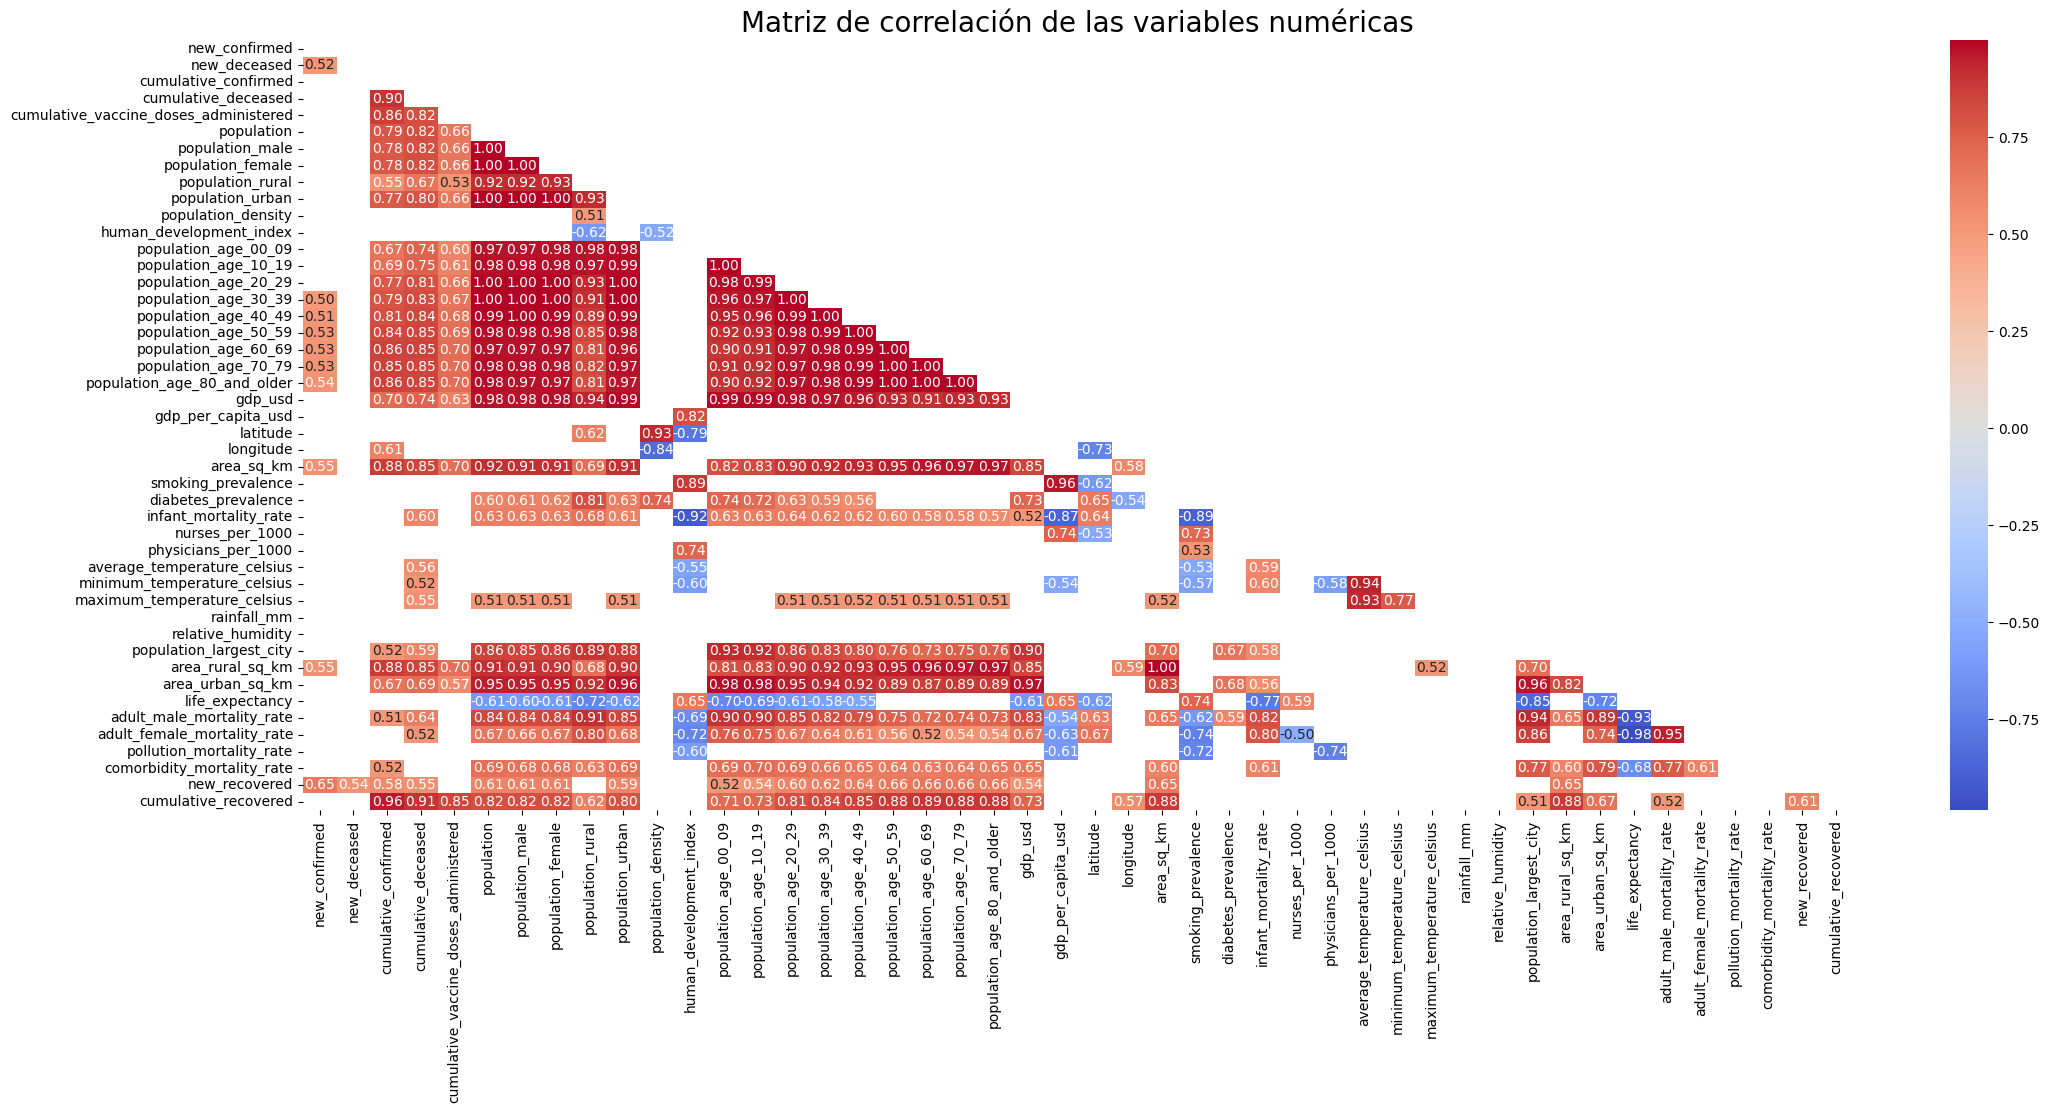

In [36]:
#Se crea la matriz de correlación de las variables numéricas
numeric_columns = data_latinoamerica_2.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = data_latinoamerica_2[numeric_columns].corr()
#Aquí se crea máscara para el triángulo superior
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
# Vamos a mostrar valores superiores a 0.5 es decur donde hay una correlación fuerte sin embargo tambien se puede mostrar valores negativos.
correlation_matrix = correlation_matrix[abs(correlation_matrix) > abs(0.5)]

# Se crea la gráfica
plt.figure(figsize=(25, 10))
heatmap = sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación de las variables numéricas', fontsize=20)
plt.show()

1. la matriz de correlación evidencia las variables con mayor correlación, para identificarlas más rápido, se definió un umbral cuyo valor absoluto sea mayor a 0.5 y se graficaron en un heatmap.
2. establecidad las variables que tienen mayor correlación, nos ayuda en el análisis detallado posterior para  lograr una decisiones acertadas para la creación de un modelo ML.
3. Sin embargo podemos proceder a realizar una rápida revisión gráfica de la gran mayoría de las columnas para ver como se comportan los datos, para esta primera aproximación vamos a utilizar barplots utilizando un ciclo for y la librería seaborn.

### Paleta de colores acorde a la empresa

In [37]:
custom_palette=['#284269', '#70b4b0', '#b85a90', '#708eb5', '#70b599', '#9770b5']
sns.set_palette(custom_palette)

### Analisis Univariable

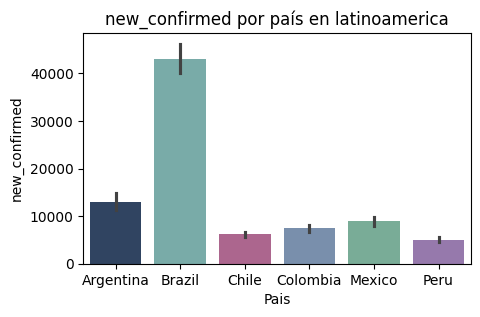

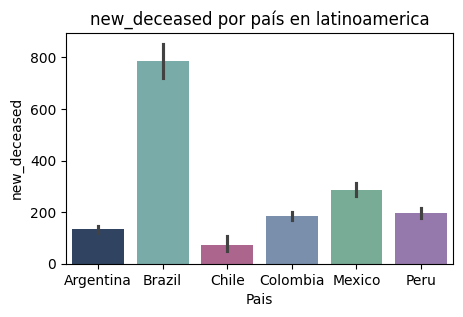

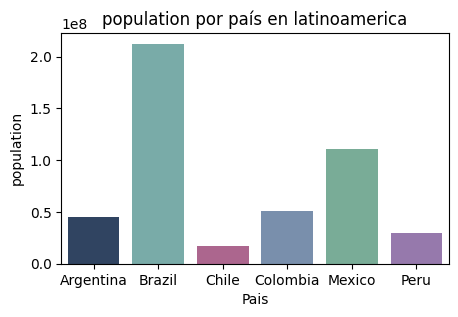

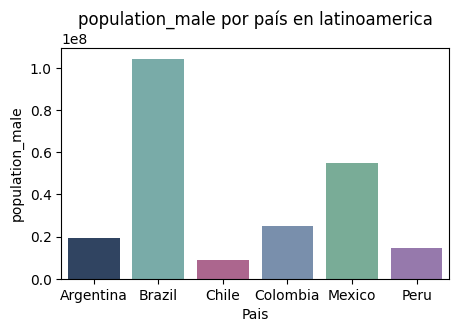

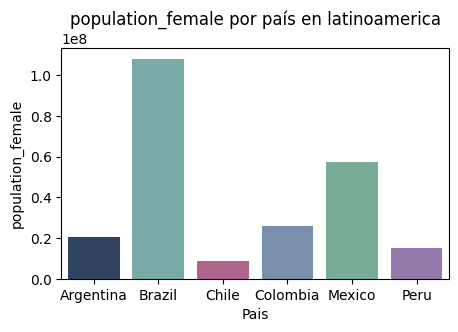

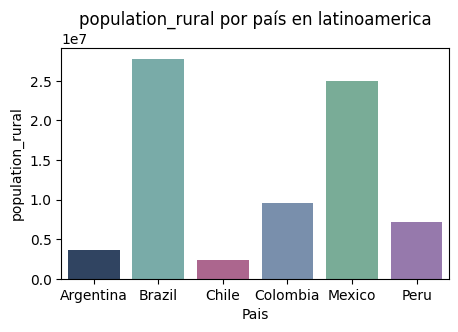

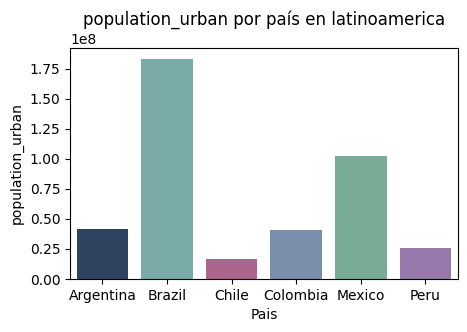

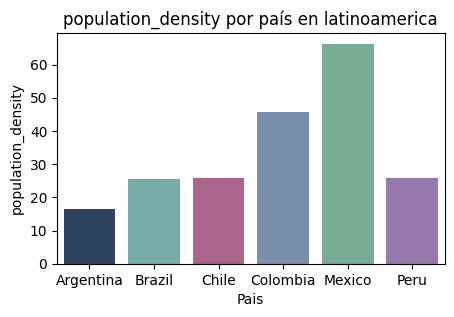

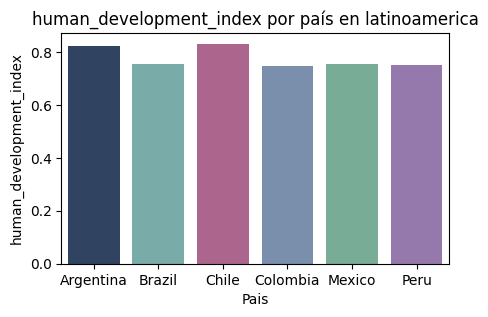

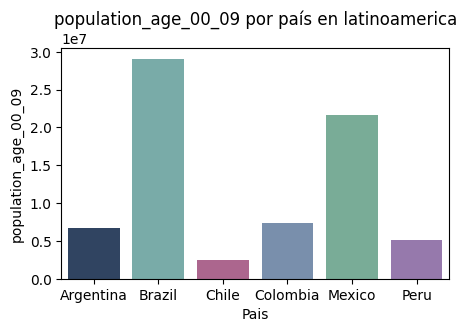

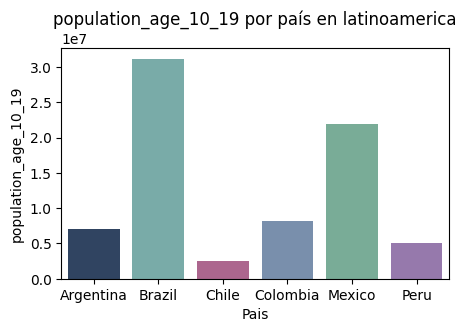

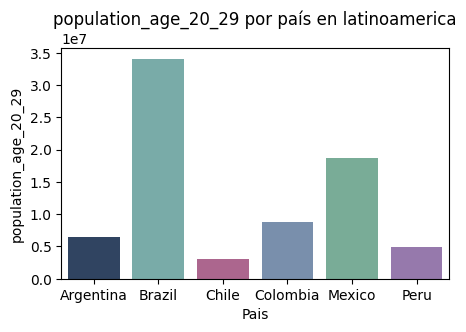

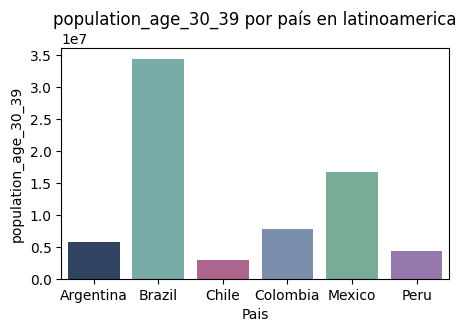

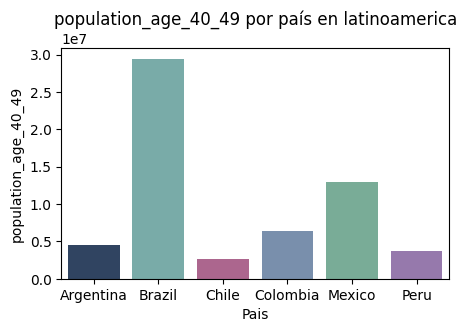

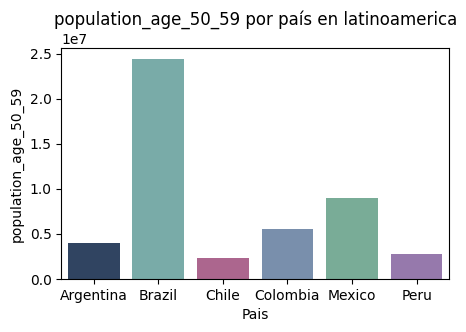

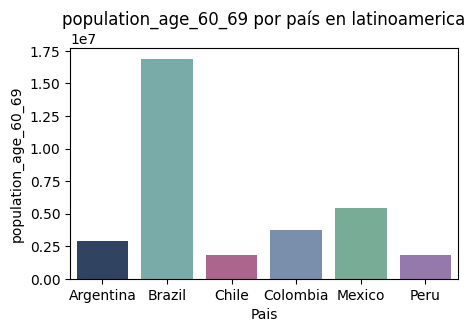

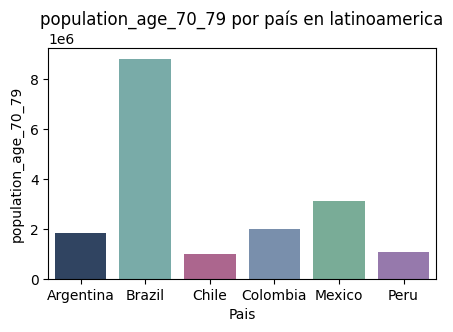

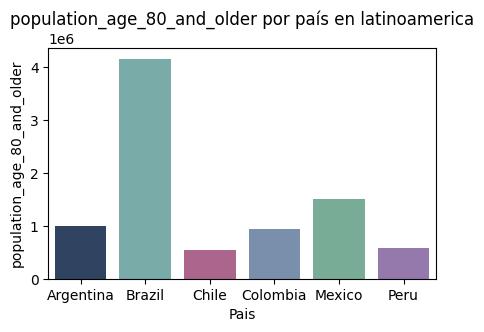

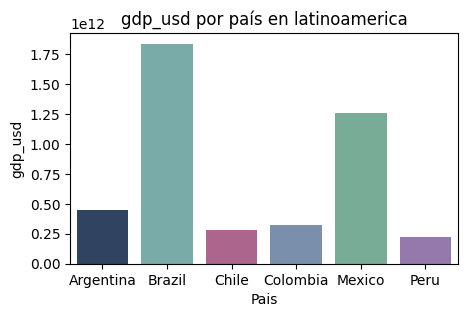

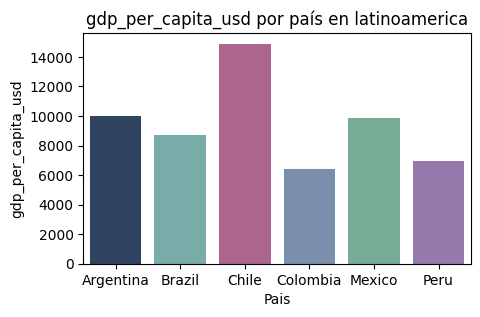

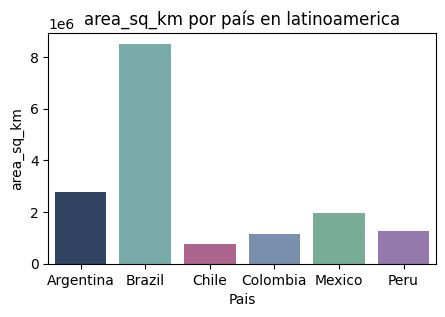

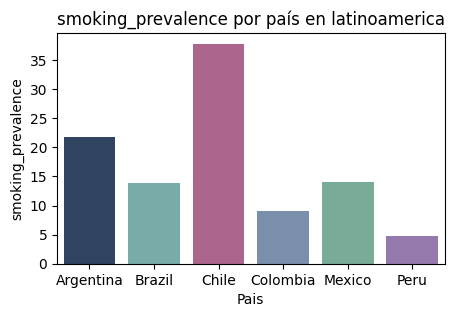

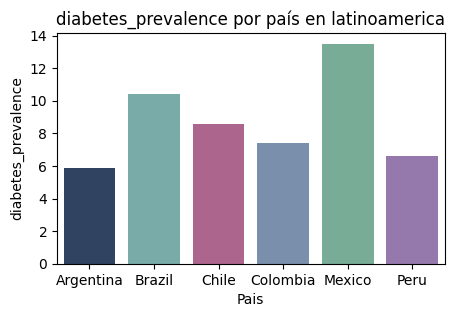

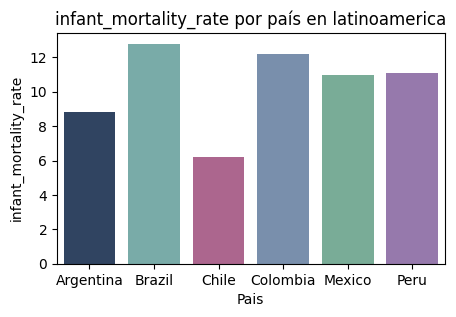

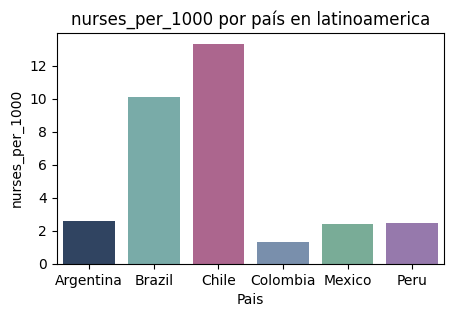

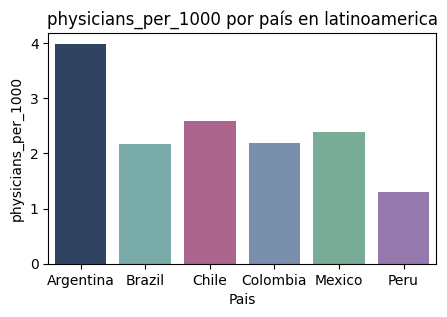

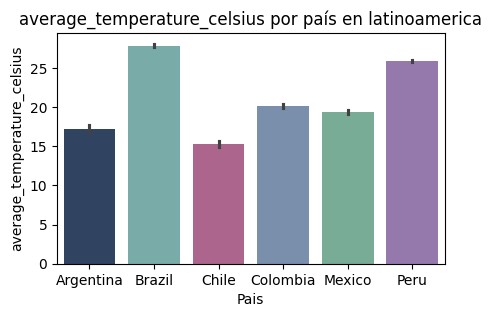

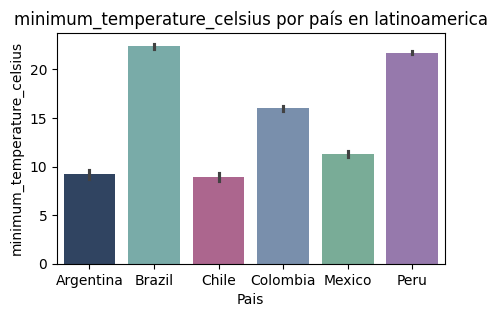

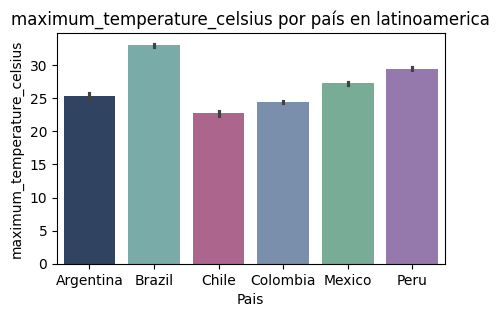

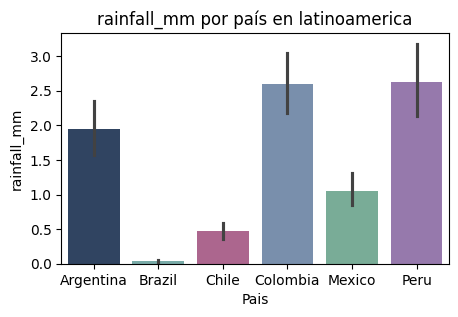

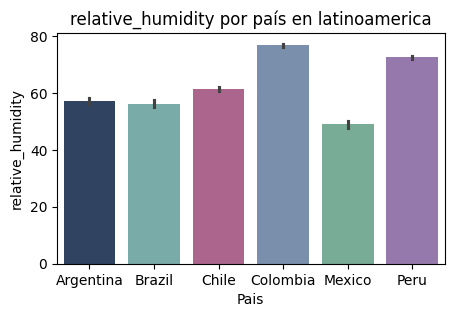

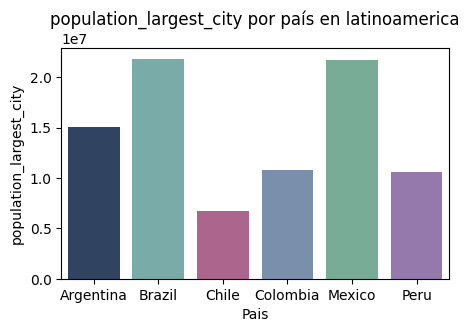

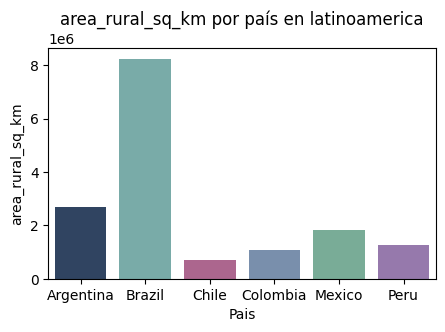

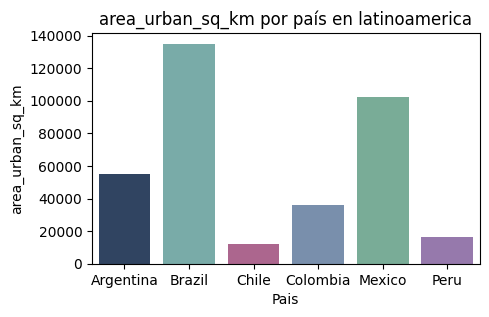

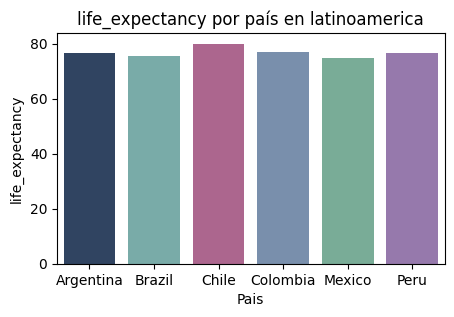

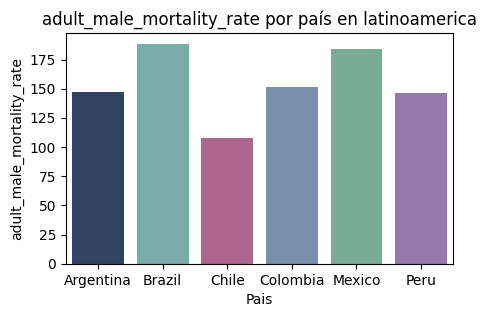

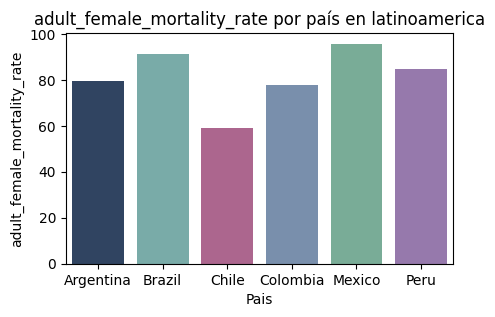

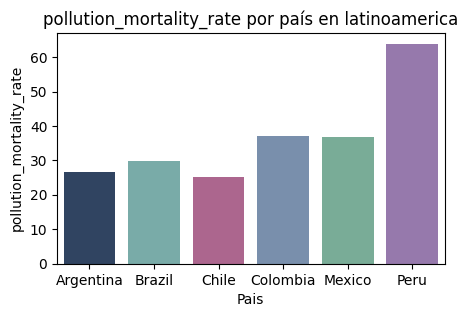

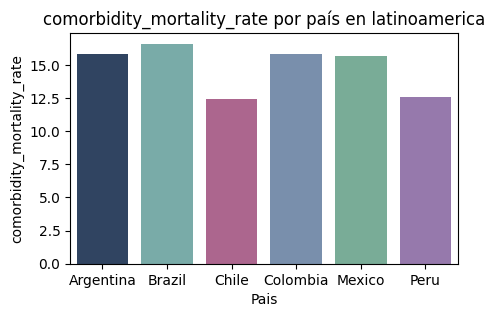

In [38]:
# diagrams bar for evere country in data_latinoamerica_paises with 6 columns 
for i in data_latinoamerica_2.columns:
    if i not in ['location_key','date','country_code','country_name','latitude','longitude','cumulative_confirmed', 'cumulative_deceased',
       'cumulative_recovered', 'cumulative_vaccine_doses_administered','new_recovered']:
        fig, ax = plt.subplots(figsize=(5, 3))
        sns.barplot(x='country_name', y=i, data=data_latinoamerica_2, ax=ax,hue='country_name')
        plt.title(f'{i} por país en latinoamerica')
        plt.xlabel('Pais')
        plt.show()

Se repite el proceso con un ciclo for para poder evidenciar la distribución de algunos de los datos.

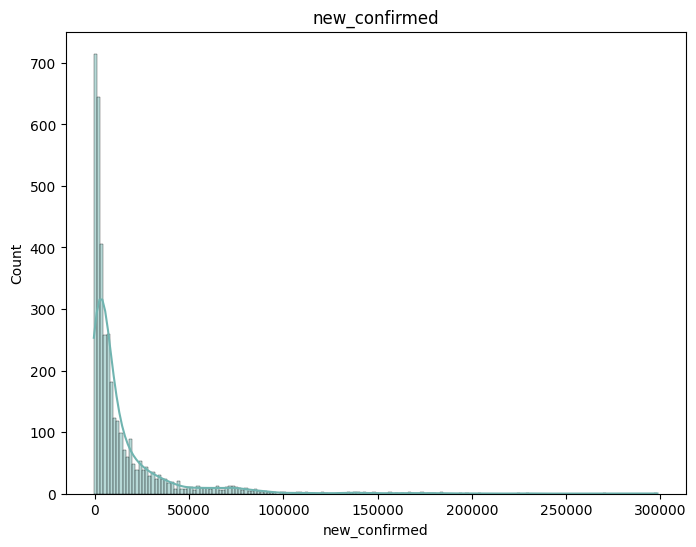

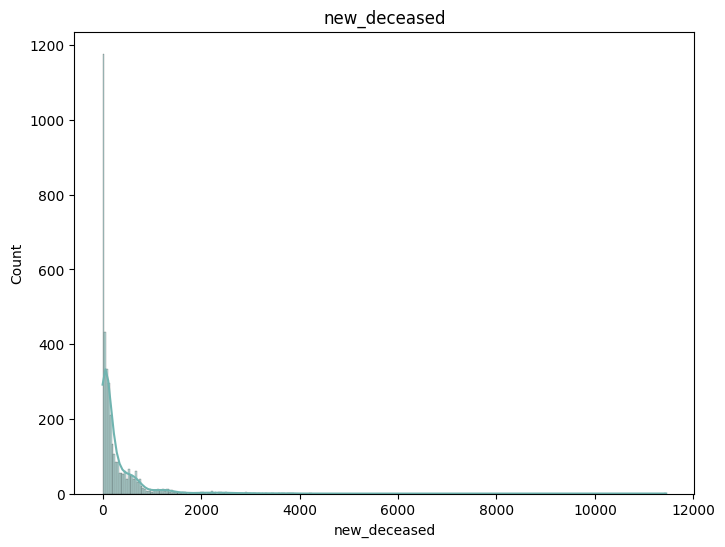

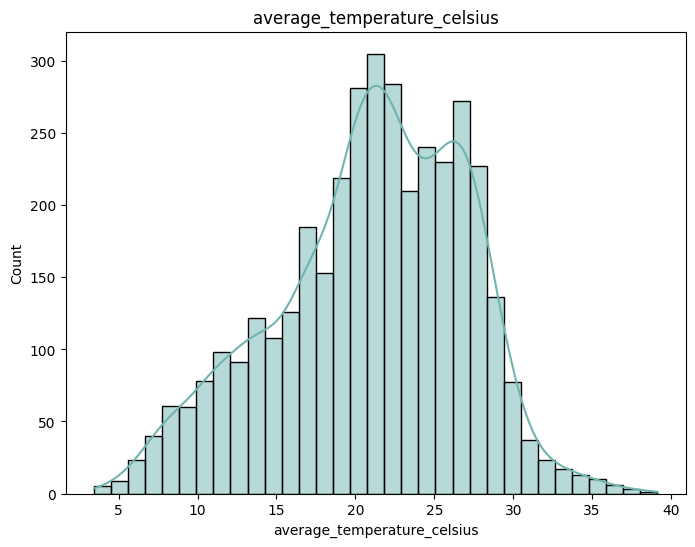

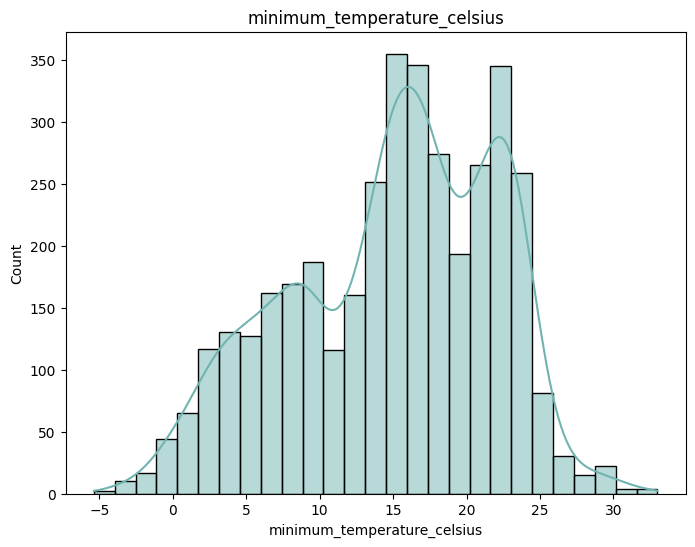

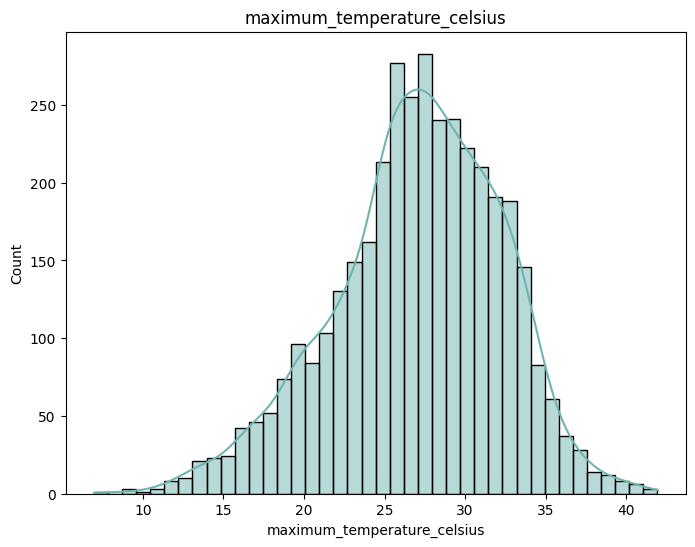

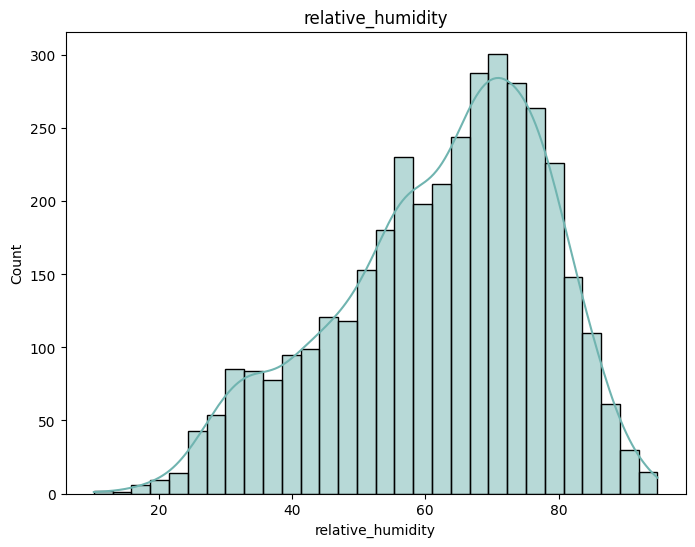

In [39]:
lista_columnas=["new_confirmed","new_deceased","cumulative_confirmed","cumulative_deceased", 
                  "cumulative_vaccine_doses_administered","average_temperature_celsius","minimum_temperature_celsius",
                  "maximum_temperature_celsius","relative_humidity"]
# Crear histogramas de las variables numéricas
for i in data_latinoamerica_2[lista_columnas]:
    if i not in ['location_key','date','country_code','country_name','latitude','longitude','cumulative_confirmed', 'cumulative_deceased',
       'cumulative_recovered', 'cumulative_vaccine_doses_administered']:
        fig, ax = plt.subplots(figsize=(8,6))
        sns.histplot(data=data_latinoamerica_2[i], kde=True, color='#70b4b0', line_kws={'color':'#b85a90'})
        plt.title(i)
        plt.show()

### Analisis Bivariable
En esta parte nos enfocaremos en algunas variables especficicas con las que podamos esbablecer algun tipo de relación directa

En este caso vamos a analizar la variable average_temperature y la variable new_confirmed, con el objetivo de entender los nuevos confirmados respecto a la temperatura.

In [40]:
data_latinoamerica_2.columns

Index(['location_key', 'date', 'country_code', 'country_name', 'new_confirmed',
       'new_deceased', 'cumulative_confirmed', 'cumulative_deceased',
       'cumulative_vaccine_doses_administered', 'population',
       'population_male', 'population_female', 'population_rural',
       'population_urban', 'population_density', 'human_development_index',
       'population_age_00_09', 'population_age_10_19', 'population_age_20_29',
       'population_age_30_39', 'population_age_40_49', 'population_age_50_59',
       'population_age_60_69', 'population_age_70_79',
       'population_age_80_and_older', 'gdp_usd', 'gdp_per_capita_usd',
       'latitude', 'longitude', 'area_sq_km', 'smoking_prevalence',
       'diabetes_prevalence', 'infant_mortality_rate', 'nurses_per_1000',
       'physicians_per_1000', 'average_temperature_celsius',
       'minimum_temperature_celsius', 'maximum_temperature_celsius',
       'rainfall_mm', 'relative_humidity', 'population_largest_city',
       'area_rural_

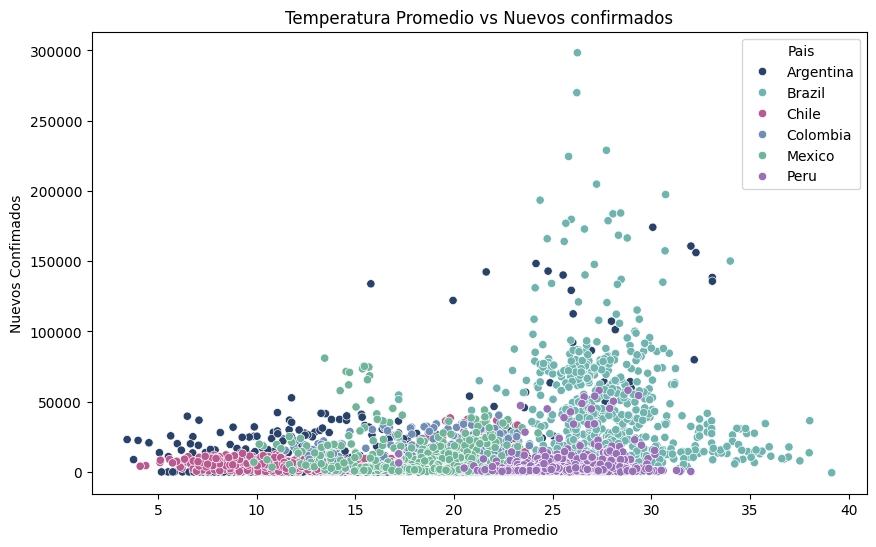

In [41]:
# Grafica de average_temperature_celsius vs new_confirmed
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x='average_temperature_celsius', y='new_confirmed', data=data_latinoamerica_2, hue='country_name')
plt.title('Temperatura Promedio vs Nuevos confirmados')
plt.xlabel('Temperatura Promedio')
plt.ylabel('Nuevos Confimados')
plt.legend(title='Pais')
plt.show()

Se evidencia que en algunos paises la temperatura no influye en la cantidad de casos confirmados, sin embargo en otros paises si se puede observar una relación entre la temperatura y la cantidad de casos confirmados.

Ahora realizaremos un análisis de la temperatura promedio con la cantidad de muertes.

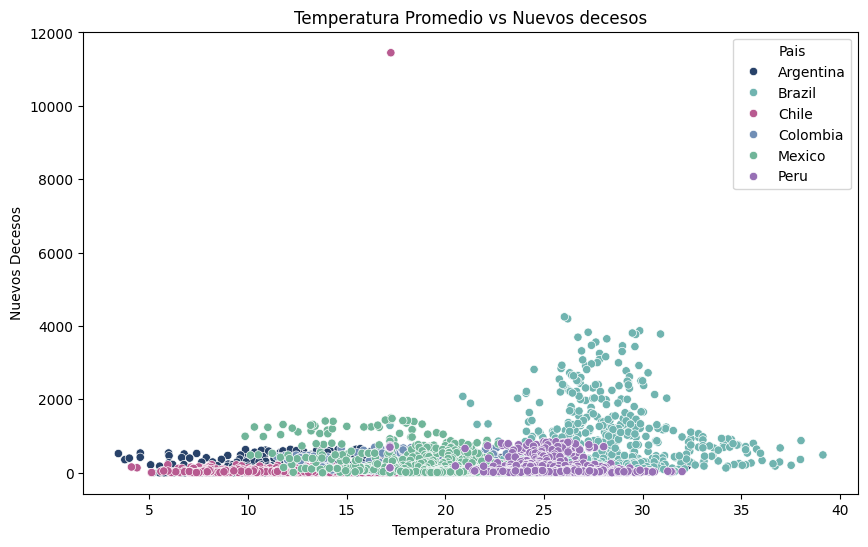

In [42]:
# Grafica de average_temperature_celsius vs new_deceased
fig, ax = plt.subplots(figsize=(10, 6))

sns.scatterplot(x='average_temperature_celsius', y='new_deceased', data=data_latinoamerica_2, hue='country_name')
plt.title('Temperatura Promedio vs Nuevos decesos')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Temperatura Promedio')
plt.ylabel('Nuevos Decesos')
plt.legend(title='Pais')
plt.show()

La grafica anterior nos muesta que en algunos paises la temperatura no influye en la cantidad de muertes, sin embargo en otros paises si se puede observar una relación entre la temperatura y la cantidad de muertes.

Procedemos a crear una matriz de correlacion de las dos columans anterioes para ver mas a detalle su relacion 

                             average_temperature_celsius  new_deceased
average_temperature_celsius                     1.000000      0.222613
new_deceased                                    0.222613      1.000000


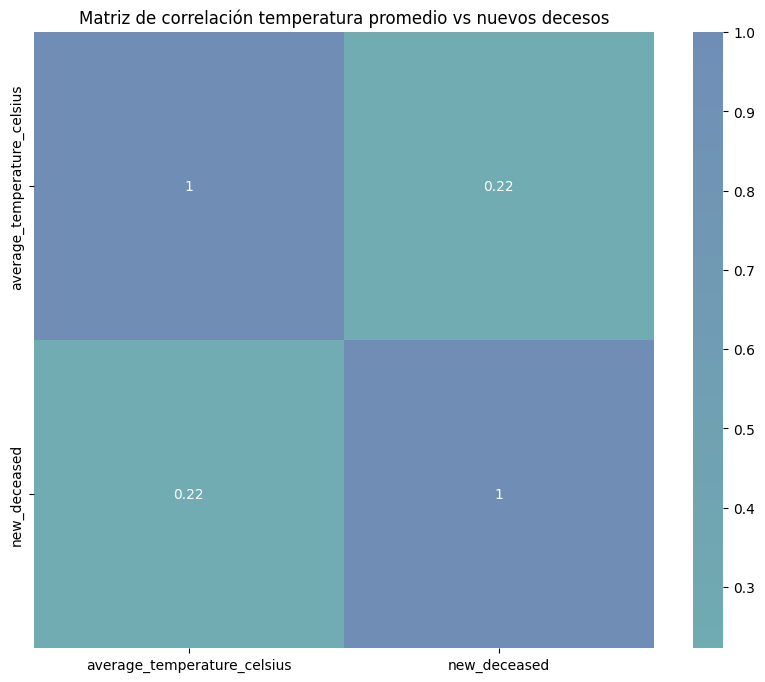

In [43]:
from matplotlib.colors import LinearSegmentedColormap
colors = ['#284269', '#70b4b0', '#708eb5']  
custom_cmap = LinearSegmentedColormap.from_list('custom_cmap', colors)
# visualizamos la matrix de correlacion con un heatmap
correlation_matrix= data_latinoamerica_2[['average_temperature_celsius','new_deceased']].corr()
print(correlation_matrix)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap=custom_cmap, center=0)
plt.title("Matriz de correlación temperatura promedio vs nuevos decesos")
plt.show()

### Estudio longitudinal
Comportamiento de las variables a lo largo del tiempo.



In [44]:
data_latinoamerica_fecha2.head()

location_key country_code country_name  new_confirmed  \
date                                                               
2021-01-01           AR           AR    Argentina         2685.0   
2021-01-02           AR           AR    Argentina         7767.0   
2021-01-03           AR           AR    Argentina         4934.0   
2021-01-04           AR           AR    Argentina        13953.0   
2021-01-05           AR           AR    Argentina        14085.0   

            new_deceased  cumulative_confirmed  cumulative_deceased  \
date                                                                  
2021-01-01         140.0             1662867.0              46522.0   
2021-01-02         166.0             1670634.0              46688.0   
2021-01-03         157.0             1675568.0              46845.0   
2021-01-04         157.0             1689521.0              47002.0   
2021-01-05         160.0             1703606.0              47162.0   

            cumulative_vaccine_doses_administered  population  \
date                                                            
2021-01-01                                18849.0  44938712.0   
2021-01-02                                20334.0  44938712.0   
2021-01-03                                20529.0  44938712.0   
2021-01-04                                25164.0  44938712.0   
2021-01-05                                29852.0  44938712.0   

            population_male  ...  population_largest_city  area_rural_sq_km  \
date                         ...                                              
2021-01-01       19523766.0  ...               15057273.0         2690269.0   
2021-01-02       19523766.0  ...               15057273.0         2690269.0   
2021-01-03       19523766.0  ...               15057273.0         2690269.0   
2021-01-04       19523766.0  ...               15057273.0         2690269.0   
2021-01-05       19523766.0  ...               15057273.0         2690269.0   

            area_urban_sq_km  life_expectancy  adult_male_mortality_rate  \
date                                                                       
2021-01-01           55032.0            76.52                    147.086   
2021-01-02           55032.0            76.52                    147.086   
2021-01-03           55032.0            76.52                    147.086   
2021-01-04           55032.0            76.52                    147.086   
2021-01-05           55032.0            76.52                    147.086   

            adult_female_mortality_rate  pollution_mortality_rate  \
date                                                                
2021-01-01                       79.483                      26.6   
2021-01-02                       79.483                      26.6   
2021-01-03                       79.483                      26.6   
2021-01-04                       79.483                      26.6   
2021-01-05                       79.483                      26.6   

            comorbidity_mortality_rate  new_recovered  cumulative_recovered  
date                                                                         
2021-01-01                        15.8            0.0                   0.0  
2021-01-02                        15.8            0.0                   0.0  
2021-01-03                        15.8            0.0                   0.0  
2021-01-04                        15.8            0.0                   0.0  
2021-01-05                        15.8            0.0                   0.0  

[5 rows x 49 columns]

In [107]:
data_latinoamerica_2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3750 entries, 2021-01-01 to 2022-09-17
Data columns (total 57 columns):
 #   Column                                 Non-Null Count  Dtype    
---  ------                                 --------------  -----    
 0   location_key                           3750 non-null   object   
 1   country_code                           3750 non-null   object   
 2   country_name                           3750 non-null   object   
 3   new_confirmed                          3750 non-null   float64  
 4   new_deceased                           3750 non-null   float64  
 5   cumulative_confirmed                   3750 non-null   float64  
 6   cumulative_deceased                    3750 non-null   float64  
 7   cumulative_vaccine_doses_administered  3750 non-null   float64  
 8   population                             3750 non-null   float64  
 9   population_male                        3750 non-null   float64  
 10  population_female             

Cambiamos la frecuencia temporal del DataFram y procedemos a calcular la media de los datos en cada nuevo intervalo muestreado.

#numeric_only=True asegura que solo se consideren columnas numéricas para calcular la media, ignorando cualquier columna no numérica.

### Promedio mensual

In [45]:
# Promedio mensual
data_latinoamerica_fecha2.resample('ME').mean(numeric_only=True)

new_confirmed  new_deceased  cumulative_confirmed  \
date                                                            
2021-01-31   15831.134409    534.962366          2.614697e+06   
2021-02-28   12728.630952    507.077381          3.042476e+06   
2021-03-31   17107.741935    603.747312          3.472768e+06   
2021-04-30   19941.361111    773.422222          4.050930e+06   
2021-05-31   19784.618280    624.543011          4.646975e+06   
2021-06-30   21695.538889    581.738889          5.300832e+06   
2021-07-31   14900.451613    414.483871          5.856033e+06   
2021-08-31    9518.865591    320.370968          6.233508e+06   
2021-09-30    5923.405556    211.938889          6.457789e+06   
2021-10-31    3490.387097    123.268817          6.598336e+06   
2021-11-30    3205.833333     85.283333          6.698484e+06   
2021-12-31    5109.123656     71.478495          6.799537e+06   
2022-01-31   50383.005376    173.446237          6.953678e+06   
2022-02-28   31165.321429    283.017857          8.337133e+06   
2022-03-31    9242.849462    157.241935          8.841952e+06   
2022-04-30    3605.444444     33.138889          9.022397e+06   
2022-05-31    4882.575269     23.268817          9.139375e+06   
2022-06-30   11905.250000     35.272222          9.391838e+06   
2022-07-31   16274.564516     65.779570          9.868660e+06   
2022-08-31    7444.043011     54.532258          1.023768e+07   
2022-09-30    5228.483092     52.089704          9.875261e+06   

            cumulative_deceased  cumulative_vaccine_doses_administered  \
date                                                                     
2021-01-31         99896.908602                           1.608014e+05   
2021-02-28        116099.863095                           1.573438e+06   
2021-03-31        131622.349462                           5.023919e+06   
2021-04-30        153347.483333                           1.125972e+07   
2021-05-31        174895.962366                           1.811394e+07   
2021-06-30        193308.688889                           2.823911e+07   
2021-07-31        208445.774194                           3.913308e+07   
2021-08-31        219601.688172                           5.482309e+07   
2021-09-30        227685.666667                           6.687715e+07   
2021-10-31        232696.311828                           7.649006e+07   
2021-11-30        235707.933333                           8.667306e+07   
2021-12-31        238158.467742                           8.801146e+07   
2022-01-31        189419.397849                           1.029258e+08   
2022-02-28        194474.577381                           1.094921e+08   
2022-03-31        200309.198925                           1.073283e+08   
2022-04-30        203270.333333                           9.524389e+07   
2022-05-31        204057.231183                           9.280921e+07   
2022-06-30        204878.405556                           1.030435e+08   
2022-07-31        206483.930108                           1.022060e+08   
2022-08-31        208492.790323                           1.047682e+08   
2022-09-30        195576.566401                           8.482232e+07   

              population  population_male  population_female  \
date                                                           
2021-01-31  7.772147e+07       37870352.5         39271616.5   
2021-02-28  7.772147e+07       37870352.5         39271616.5   
2021-03-31  7.772147e+07       37870352.5         39271616.5   
2021-04-30  7.772147e+07       37870352.5         39271616.5   
2021-05-31  7.772147e+07       37870352.5         39271616.5   
2021-06-30  7.772147e+07       37870352.5         39271616.5   
2021-07-31  7.772147e+07       37870352.5         39271616.5   
2021-08-31  7.772147e+07       37870352.5         39271616.5   
2021-09-30  7.772147e+07       37870352.5         39271616.5   
2021-10-31  7.772147e+07       37870352.5         39271616.5   
2021-11-30  7.772147e+07       37870352.5    

### Promedio Semanal

In [46]:
# Promedio semanal
data_latinoamerica_fecha2.resample('W').max(numeric_only=True)

new_confirmed  new_deceased  cumulative_confirmed  \
date                                                            
2021-01-03        24605.0   1037.000000             7733746.0   
2021-01-10        87843.0   1524.000000             8105790.0   
2021-01-17        69198.0   1402.000000             8488099.0   
2021-01-24        64385.0   1495.000000             8844577.0   
2021-01-31        63520.0   1478.000000             9204731.0   
...                   ...           ...                   ...   
2022-08-21        24659.0    247.000000            34284864.0   
2022-08-28        21039.0    203.000000            34384747.0   
2022-09-04        16806.0    229.000000            34470776.0   
2022-09-11        13392.0    155.000000            34528625.0   
2022-09-18        14525.0    134.388084            34568833.0   

            cumulative_deceased  cumulative_vaccine_doses_administered  \
date                                                                     
2021-01-03             196018.0                                20529.0   
2021-01-10             203100.0                                81300.0   
2021-01-17             209847.0                               472142.0   
2021-01-24             217037.0                               787792.0   
2021-01-31             224504.0                              2378836.0   
...                         ...                                    ...   
2022-08-21             682549.0                            346652369.0   
2022-08-28             683494.0                            347015897.0   
2022-09-04             684369.0                            347500537.0   
2022-09-11             684860.0                            347688025.0   
2022-09-18             685203.0                            347868481.0   

             population  population_male  population_female  population_rural  \
date                                                                            
2021-01-03  212559409.0      104435783.0        108123626.0        27807886.0   
2021-01-10  212559409.0      104435783.0        108123626.0        27807886.0   
2021-01-17  212559409.0      104435783.0        108123626.0        27807886.0   
2021-01-24  212559409.0      104435783.0        108123626.0        27807886.0   
2021-01-31  212559409.0      104435783.0        108123626.0        27807886.0   
...                 ...              ...                ...               ...   
2022-08-21  212559409.0      104435783.0        108123626.0        27807886.0   
2022-08-28  212559409.0      104435783.0        108123626.0        27807886.0   
2022-09-04  212559409.0      104435783.0        108123626.0        27807886.0   
2022-09-11  212559409.0      104435783.0        108123626.0        27807886.0   
2022-09-18  212559409.0      104435783.0        108123626.0        27807886.0   

            population_urban  ...  population_largest_city  area_rural_sq_km  \
date                          ...                                              
2021-01-03       183241641.0  ...               21846507.0         8241430.0   
2021-01-10       183241641.0  ...               21846507.0         8241430.0   
2021-01-17       183241641.0  ...               21846507.0         8241430.0   
2021-01-24       183241641.0  ...               21846507.0         8241430.0   
2021-01-31       183241641.0  ...               21846507.0         8241430.0   
...                      ...  ...                      ...               ...   
2022-08-21       183241641.0  ...               21846507.0         8241430.0   
2022-08-28       183241641.0  ...               21846507.0         8241430.0   
2022-09-04       183241641.0  ...               21846507.0         8241430.0   
2022-09-11       183241641.0  ...               21846507.0         8241430.0   
2022-09-18       183241641.0  ...               21846507.0         8241430.0   

            area_urban_sq_km  life_expectancy  adult_male_mortality_rate  \
date                            

In [108]:
data_latinoamerica_fecha2.resample('SME').mean(numeric_only=True)

new_confirmed  new_deceased  cumulative_confirmed  \
date                                                            
2020-12-31   15611.535714    471.559524          2.469488e+06   
2021-01-15   16502.062500    592.885417          2.726612e+06   
2021-01-31   12350.444444    533.488889          2.949193e+06   
2021-02-15   13182.538462    484.474359          3.122693e+06   
2021-02-28   15005.288889    519.233333          3.320708e+06   
2021-03-15   18108.270833    651.760417          3.582184e+06   
2021-03-31   20194.788889    777.200000          3.878056e+06   
2021-04-15   19840.555556    778.744444          4.183907e+06   
2021-04-30   18958.422222    666.822222          4.465594e+06   
2021-05-15   20757.072917    603.364583          4.778688e+06   
2021-05-31   21452.611111    586.333333          5.113862e+06   
2021-06-15   21981.933333    568.877778          5.444419e+06   
2021-06-30   16227.211111    462.811111          5.723244e+06   
2021-07-15   14069.958333    384.010417          5.951653e+06   
2021-07-31   11048.888889    345.722222          6.145516e+06   
2021-08-15    8254.583333    299.197917          6.297558e+06   
2021-08-31    5759.511111    234.922222          6.406188e+06   
2021-09-15    6191.211111    196.988889          6.497546e+06   
2021-09-30    3849.611111    140.944444          6.567476e+06   
2021-10-15    3436.395833    114.083333          6.620521e+06   
2021-10-31    3201.500000     86.155556          6.671007e+06   
2021-11-15    3113.266667     82.533333          6.719563e+06   
2021-11-30    2934.233333     78.344444          6.766679e+06   
2021-12-15    6447.302083     67.656250          6.820452e+06   
2021-12-31   41036.811111     79.477778          6.506700e+06   
2022-01-15   57698.687500    249.093750          7.317116e+06   
2022-01-31   39467.000000    322.000000          8.104913e+06   
2022-02-15   23875.833333    247.948718          8.537482e+06   
2022-02-28   10993.733333    125.366667          8.755232e+06   
2022-03-15    7676.302083    190.468750          8.905114e+06   
2022-03-31    4498.977778     42.422222          8.992472e+06   
2022-04-15    2950.233333     27.077778          9.045019e+06   
2022-04-30    3967.288889     22.766667          9.096458e+06   
2022-05-15    5362.968750     23.010417          9.169978e+06   
2022-05-31    9344.388889     26.855556          9.293511e+06   
2022-06-15   13539.500000     41.066667          9.465720e+06   
2022-06-30   18211.188889     62.922222          9.712124e+06   
2022-07-15   15469.187500     70.927083          9.983772e+06   
2022-07-31    9443.333333     63.077778          1.016983e+07   
2022-08-15    5744.833333     47.052083          1.028679e+07   
2022-08-31    3659.196350     34.439470          1.034951e+07   
2022-09-15   12730.255770    131.477635          7.655598e+06   

            cumulative_deceased  cumulative_vaccine_doses_administered  \
date                                                                     
2020-12-31         95202.488095                           2.263321e+04   
2021-01-15        103467.083333                           2.575067e+05   
2021-01-31        112327.500000                           9.726375e+05   
2021-02-15        119360.423077                           2.108505e+06   
2021-02-28        126317.377778                           3.557351e+06   
2021-03-15        135426.000000                           6.072286e+06   
2021-03-31        146664.277778                           9.213536e+06   
2021-04-15        158483.844444                           1.281368e+07   
2021-04-30        169265.477778                           1.589885e+07   
2021-05-15        178964.489583                           1.969460e+07   
2021-05-31        188243.588889                           2.503502e+07   
2021-06-15        197210.311111                           3.069443e+07   
2021-06-30        204753.622222                           3.557079e+07   
2021-07-15        211104.104167          

### Nuevas columnas de Tiempo
#### Columna dia semana

In [47]:
# Crear columna nueva de semana a partir del df que tiene RangeIndex
data_latinoamerica_2['dia_semana'] = data_latinoamerica_2['date'].dt.day_of_week
data_latinoamerica_2

location_key       date country_code country_name  new_confirmed  \
0              AR 2021-01-01           AR    Argentina    2685.000000   
1              AR 2021-01-02           AR    Argentina    7767.000000   
2              AR 2021-01-03           AR    Argentina    4934.000000   
3              AR 2021-01-04           AR    Argentina   13953.000000   
4              AR 2021-01-05           AR    Argentina   14085.000000   
...           ...        ...          ...          ...            ...   
3745           PE 2022-09-13           PE         Peru    1150.000000   
3746           PE 2022-09-14           PE         Peru   12894.917874   
3747           PE 2022-09-15           PE         Peru   12894.917874   
3748           PE 2022-09-16           PE         Peru   12894.917874   
3749           PE 2022-09-17           PE         Peru   12894.917874   

      new_deceased  cumulative_confirmed  cumulative_deceased  \
0       140.000000          1.662867e+06         46522.000000   
1       166.000000          1.670634e+06         46688.000000   
2       157.000000          1.675568e+06         46845.000000   
3       157.000000          1.689521e+06         47002.000000   
4       160.000000          1.703606e+06         47162.000000   
...            ...                   ...                  ...   
3745     22.000000          4.127612e+06        216173.000000   
3746    134.388084          6.072466e+06        105620.798712   
3747    134.388084          6.072466e+06        105620.798712   
3748    134.388084          6.072466e+06        105620.798712   
3749    134.388084          6.072466e+06        105620.798712   

      cumulative_vaccine_doses_administered  population  ...  \
0                                   18849.0  44938712.0  ...   
1                                   20334.0  44938712.0  ...   
2                                   20529.0  44938712.0  ...   
3                                   25164.0  44938712.0  ...   
4                                   29852.0  44938712.0  ...   
...                                     ...         ...  ...   
3745                                    0.0  29381884.0  ...   
3746                                    0.0  29381884.0  ...   
3747                                    0.0  29381884.0  ...   
3748                                    0.0  29381884.0  ...   
3749                                    0.0  29381884.0  ...   

      area_rural_sq_km  area_urban_sq_km  life_expectancy  \
0            2690269.0           55032.0           76.520   
1            2690269.0           55032.0           76.520   
2            2690269.0           55032.0           76.520   
3            2690269.0           55032.0           76.520   
4            2690269.0           55032.0           76.520   
...                ...               ...              ...   
3745         1256339.0           16425.0           76.516   
3746         1256339.0           16425.0           76.516   
3747         1256339.0           16425.0           76.516   
3748         1256339.0           16425.0           76.516   
3749         1256339.0           16425.0           76.516   

      adult_male_mortality_rate  adult_female_mortality_rate  \
0                       147.086                       79.483   
1                       147.086                       79.483   
2                       147.086                       79.483   
3                       147.086                       79.483   
4                       147.086                       79.483   
...                         ...                          ...   
3745                    146.370                       84.815   
3746                    146.370                       84.815   
3747                    146.370                       84.815   
3748                    146.370                       84.815   
3749                    146.370                       84.815   

      pollution_mortality_rate  comorbidity_mortality_rate  new_recovered  \

In [48]:
# uana vez creada la columna dia semana agrupamos por el promedio de los dias de la semana
data_latinoamerica_2.groupby('dia_semana').mean(numeric_only=True)

new_confirmed  new_deceased  cumulative_confirmed  \
dia_semana                                                      
0            11257.346442    233.395131          6.768948e+06   
1            15465.921348    302.290262          6.784451e+06   
2            16632.763430    305.017888          6.800252e+06   
3            16995.991740    313.104757          6.822969e+06   
4            16816.900939    297.858016          6.737408e+06   
5            12671.832421    276.295053          6.742438e+06   
6             7572.516854    207.305243          6.757644e+06   

            cumulative_deceased  cumulative_vaccine_doses_administered  \
dia_semana                                                               
0                 192647.481273                           6.633748e+07   
1                 192949.771536                           6.401891e+07   
2                 193017.734447                           6.578885e+07   
3                 193482.456917                           6.489247e+07   
4                 191576.962578                           6.873454e+07   
5                 191288.301467                           6.117795e+07   
6                 192458.149813                           6.643863e+07   

              population  population_male  population_female  \
dia_semana                                                     
0           7.772147e+07       37870352.5         39271616.5   
1           7.772147e+07       37870352.5         39271616.5   
2           7.772147e+07       37870352.5         39271616.5   
3           7.772147e+07       37870352.5         39271616.5   
4           7.772147e+07       37870352.5         39271616.5   
5           7.772147e+07       37870352.5         39271616.5   
6           7.772147e+07       37870352.5         39271616.5   

            population_rural  population_urban  ...  population_largest_city  \
dia_semana                                      ...                            
0               1.255498e+07      6.833931e+07  ...               14438882.0   
1               1.255498e+07      6.833931e+07  ...               14438882.0   
2               1.255498e+07      6.833931e+07  ...               14438882.0   
3               1.255498e+07      6.833931e+07  ...               14438882.0   
4               1.255498e+07      6.833931e+07  ...               14438882.0   
5               1.255498e+07      6.833931e+07  ...               14438882.0   
6               1.255498e+07      6.833931e+07  ...               14438882.0   

            area_rural_sq_km  area_urban_sq_km  life_expectancy  \
dia_semana                                                        
0                  2636579.5           59502.5          76.8085   
1                  2636579.5           59502.5          76.8085   
2                  2636579.5           59502.5          76.8085   
3                  2636579.5           59502.5          76.8085   
4                  2636579.5           59502.5          76.8085   
5                  2636579.5           59502.5          76.8085   
6                  2636579.5           59502.5          76.8085   

            adult_male_mortality_rate  adult_female_mortality_rate  \
dia_semana                                                           
0                          154.274667                       81.428   
1                          154.274667                       81.428   
2                          154.274667                       81.428   
3                          154.274667                       81.428   
4                          154.274667                       81.428   
5                          154.274667                       81.428   
6                          154.274667                       81.428   

            pollution_mortality_rate  comorbidity_mortality_rate  \
dia_semana                                                         
0                          36.566667                   14.816667   
1                     

#### Columna dia mes

In [49]:
# Crear columna nueva numero mes a partir del df que tiene RangeIndex
data_latinoamerica_2['mes'] = data_latinoamerica_2['date'].dt.month
data_latinoamerica_2

location_key       date country_code country_name  new_confirmed  \
0              AR 2021-01-01           AR    Argentina    2685.000000   
1              AR 2021-01-02           AR    Argentina    7767.000000   
2              AR 2021-01-03           AR    Argentina    4934.000000   
3              AR 2021-01-04           AR    Argentina   13953.000000   
4              AR 2021-01-05           AR    Argentina   14085.000000   
...           ...        ...          ...          ...            ...   
3745           PE 2022-09-13           PE         Peru    1150.000000   
3746           PE 2022-09-14           PE         Peru   12894.917874   
3747           PE 2022-09-15           PE         Peru   12894.917874   
3748           PE 2022-09-16           PE         Peru   12894.917874   
3749           PE 2022-09-17           PE         Peru   12894.917874   

      new_deceased  cumulative_confirmed  cumulative_deceased  \
0       140.000000          1.662867e+06         46522.000000   
1       166.000000          1.670634e+06         46688.000000   
2       157.000000          1.675568e+06         46845.000000   
3       157.000000          1.689521e+06         47002.000000   
4       160.000000          1.703606e+06         47162.000000   
...            ...                   ...                  ...   
3745     22.000000          4.127612e+06        216173.000000   
3746    134.388084          6.072466e+06        105620.798712   
3747    134.388084          6.072466e+06        105620.798712   
3748    134.388084          6.072466e+06        105620.798712   
3749    134.388084          6.072466e+06        105620.798712   

      cumulative_vaccine_doses_administered  population  ...  \
0                                   18849.0  44938712.0  ...   
1                                   20334.0  44938712.0  ...   
2                                   20529.0  44938712.0  ...   
3                                   25164.0  44938712.0  ...   
4                                   29852.0  44938712.0  ...   
...                                     ...         ...  ...   
3745                                    0.0  29381884.0  ...   
3746                                    0.0  29381884.0  ...   
3747                                    0.0  29381884.0  ...   
3748                                    0.0  29381884.0  ...   
3749                                    0.0  29381884.0  ...   

      area_urban_sq_km  life_expectancy  adult_male_mortality_rate  \
0              55032.0           76.520                    147.086   
1              55032.0           76.520                    147.086   
2              55032.0           76.520                    147.086   
3              55032.0           76.520                    147.086   
4              55032.0           76.520                    147.086   
...                ...              ...                        ...   
3745           16425.0           76.516                    146.370   
3746           16425.0           76.516                    146.370   
3747           16425.0           76.516                    146.370   
3748           16425.0           76.516                    146.370   
3749           16425.0           76.516                    146.370   

      adult_female_mortality_rate  pollution_mortality_rate  \
0                          79.483                      26.6   
1                          79.483                      26.6   
2                          79.483                      26.6   
3                          79.483                      26.6   
4                          79.483                      26.6   
...                           ...                       ...   
3745                       84.815                      63.9   
3746                       84.815                      63.9   
3747                       84.815                      63.9   
3748                       84.815                      63.9   
3749                       84.815           

In [50]:
# uana vez creada la columna numero mes agrupamos por el promedio de los numeros del mes
data_latinoamerica_2.groupby('mes').mean(numeric_only=True)

new_confirmed  new_deceased  cumulative_confirmed  cumulative_deceased  \
mes                                                                           
1     33107.069892    354.204301          4.784188e+06        144658.153226   
2     21946.976190    395.047619          5.689804e+06        155287.220238   
3     13175.295699    380.494624          6.157360e+06        165965.774194   
4     11773.402778    403.280556          6.536663e+06        178308.908333   
5     12333.596774    323.905914          6.893175e+06        189476.596774   
6     16800.394444    308.505556          7.346335e+06        199093.547222   
7     15587.508065    240.131720          7.862346e+06        207464.852151   
8      8481.454301    187.451613          8.235592e+06        214047.239247   
9      5672.050622    154.121098          7.693896e+06        216071.736783   
10     3490.387097    123.268817          6.598336e+06        232696.311828   
11     3205.833333     85.283333          6.698484e+06        235707.933333   
12     5109.123656     71.478495          6.799537e+06        238158.467742   

     cumulative_vaccine_doses_administered    population  population_male  \
mes                                                                         
1                             5.154328e+07  7.772147e+07       37870352.5   
2                             5.553278e+07  7.772147e+07       37870352.5   
3                             5.617613e+07  7.772147e+07       37870352.5   
4                             5.325180e+07  7.772147e+07       37870352.5   
5                             5.546158e+07  7.772147e+07       37870352.5   
6                             6.564132e+07  7.772147e+07       37870352.5   
7                             7.066954e+07  7.772147e+07       37870352.5   
8                             7.979564e+07  7.772147e+07       37870352.5   
9                             7.336796e+07  7.772147e+07       37870352.5   
10                            7.649006e+07  7.772147e+07       37870352.5   
11                            8.667306e+07  7.772147e+07       37870352.5   
12                            8.801146e+07  7.772147e+07       37870352.5   

     population_female  population_rural  population_urban  ...  \
mes                                                         ...   
1           39271616.5      1.255498e+07      6.833931e+07  ...   
2           39271616.5      1.255498e+07      6.833931e+07  ...   
3           39271616.5      1.255498e+07      6.833931e+07  ...   
4           39271616.5      1.255498e+07      6.833931e+07  ...   
5           39271616.5      1.255498e+07      6.833931e+07  ...   
6           39271616.5      1.255498e+07      6.833931e+07  ...   
7           39271616.5      1.255498e+07      6.833931e+07  ...   
8           39271616.5      1.255498e+07      6.833931e+07  ...   
9           39271616.5      1.255498e+07      6.833931e+07  ...   
10          39271616.5      1.255498e+07      6.833931e+07  ...   
11          39271616.5      1.255498e+07      6.833931e+07  ...   
12          39271616.5      1.255498e+07      6.833931e+07  ...   

     area_rural_sq_km  area_urban_sq_km  life_expectancy  \
mes                                                        
1           2636579.5           59502.5          76.8085   
2           2636579.5           59502.5          76.8085   
3           2636579.5           59502.5          76.8085   
4           2636579.5           59502.5          76.8085   
5           2636579.5           59502.5          76.8085   
6           2636579.5           59502.5          76.8085   
7           2636579.5           59502.5          76.8085   
8           2636579.5           59502.5          76.8085   
9           2636579.5           59502.5          76.8085   
10          2636579.5           59502.5          76.8085   
11          2636579.5           59502.5          76.8085   
12          2636579.5           59502.5          76.8085   

     adult_male_mortality_rate  adult_f

#### Columna Año

In [51]:
# Crear columna nueva año partir del df que tiene RangeIndex
data_latinoamerica_2['Año'] = data_latinoamerica_2['date'].dt.year
data_latinoamerica_2

location_key       date country_code country_name  new_confirmed  \
0              AR 2021-01-01           AR    Argentina    2685.000000   
1              AR 2021-01-02           AR    Argentina    7767.000000   
2              AR 2021-01-03           AR    Argentina    4934.000000   
3              AR 2021-01-04           AR    Argentina   13953.000000   
4              AR 2021-01-05           AR    Argentina   14085.000000   
...           ...        ...          ...          ...            ...   
3745           PE 2022-09-13           PE         Peru    1150.000000   
3746           PE 2022-09-14           PE         Peru   12894.917874   
3747           PE 2022-09-15           PE         Peru   12894.917874   
3748           PE 2022-09-16           PE         Peru   12894.917874   
3749           PE 2022-09-17           PE         Peru   12894.917874   

      new_deceased  cumulative_confirmed  cumulative_deceased  \
0       140.000000          1.662867e+06         46522.000000   
1       166.000000          1.670634e+06         46688.000000   
2       157.000000          1.675568e+06         46845.000000   
3       157.000000          1.689521e+06         47002.000000   
4       160.000000          1.703606e+06         47162.000000   
...            ...                   ...                  ...   
3745     22.000000          4.127612e+06        216173.000000   
3746    134.388084          6.072466e+06        105620.798712   
3747    134.388084          6.072466e+06        105620.798712   
3748    134.388084          6.072466e+06        105620.798712   
3749    134.388084          6.072466e+06        105620.798712   

      cumulative_vaccine_doses_administered  population  ...  life_expectancy  \
0                                   18849.0  44938712.0  ...           76.520   
1                                   20334.0  44938712.0  ...           76.520   
2                                   20529.0  44938712.0  ...           76.520   
3                                   25164.0  44938712.0  ...           76.520   
4                                   29852.0  44938712.0  ...           76.520   
...                                     ...         ...  ...              ...   
3745                                    0.0  29381884.0  ...           76.516   
3746                                    0.0  29381884.0  ...           76.516   
3747                                    0.0  29381884.0  ...           76.516   
3748                                    0.0  29381884.0  ...           76.516   
3749                                    0.0  29381884.0  ...           76.516   

      adult_male_mortality_rate  adult_female_mortality_rate  \
0                       147.086                       79.483   
1                       147.086                       79.483   
2                       147.086                       79.483   
3                       147.086                       79.483   
4                       147.086                       79.483   
...                         ...                          ...   
3745                    146.370                       84.815   
3746                    146.370                       84.815   
3747                    146.370                       84.815   
3748                    146.370                       84.815   
3749                    146.370                       84.815   

      pollution_mortality_rate  comorbidity_mortality_rate  new_recovered  \
0                         26.6                        15.8            0.0   
1                         26.6                        15.8            0.0   
2                         26.6                        15.8            0.0   
3                         26.6                        15.8            0.0   
4                         26.6                        15.8            0.0   
...                        ...                         ...            ...   
3745                      63.9                        12.6        

In [109]:
# uana vez creada la columna año agrupamos por el promedio de los años
data_latinoamerica_2.groupby('Año').mean(numeric_only=True)

new_confirmed  new_deceased  cumulative_confirmed  cumulative_deceased  \
Año                                                                            
2021   12431.226941    403.419635          5.159748e+06        186348.303196   
2022   16007.200818     98.325737          9.038568e+06        201100.734470   

      cumulative_vaccine_doses_administered    population  population_male  \
Año                                                                          
2021                           3.991774e+07  7.772147e+07       37870352.5   
2022                           1.010290e+08  7.772147e+07       37870352.5   

      population_female  population_rural  population_urban  ...  \
Año                                                          ...   
2021         39271616.5      1.255498e+07      6.833931e+07  ...   
2022         39271616.5      1.255498e+07      6.833931e+07  ...   

      pollution_mortality_rate  comorbidity_mortality_rate  new_recovered  \
Año                                                                         
2021                 36.566667                   14.816667    8400.488584   
2022                 36.566667                   14.816667    8072.308333   

      cumulative_recovered  dia_semana  densidad_de_contagios  \
Año                                                             
2021          3.228928e+06    3.002740               0.000166   
2022          4.818898e+06    3.007692               0.000263   

      urban_population_percentage  case_fatality_rate  mortality_rate  \
Año                                                                     
2021                     0.886383            0.047079        0.047079   
2022                     0.886383            0.023988        0.023988   

      active_cases  
Año                 
2021  1.744471e+06  
2022  4.018570e+06  

[2 rows x 52 columns]

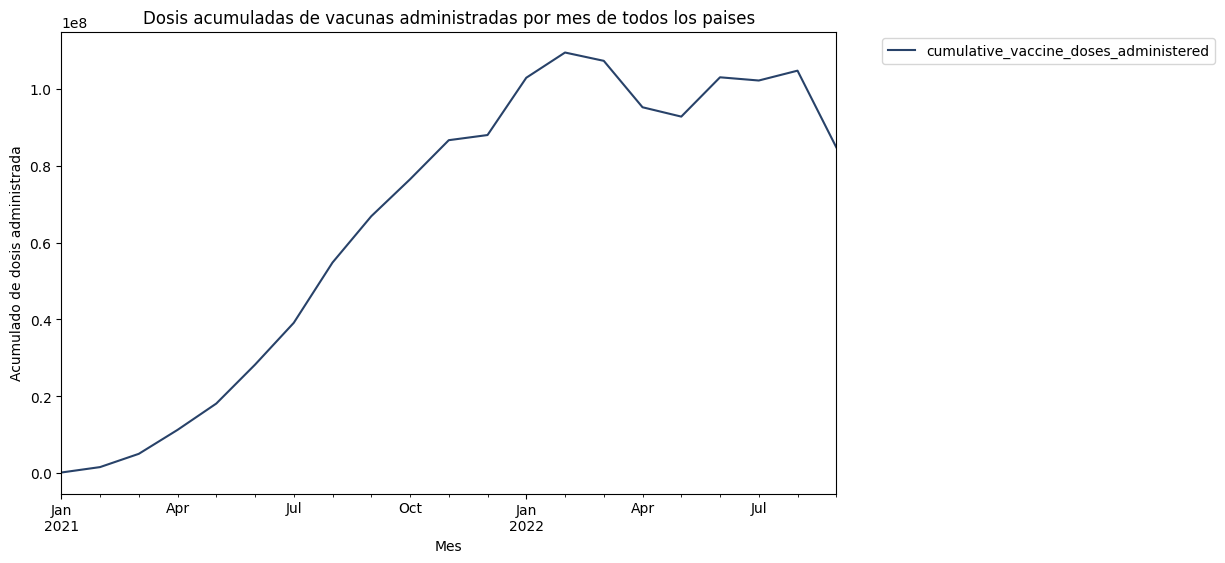

In [52]:
# Grafica de valores medios de todos los paises cumulative_vaccine_doses_administered
fig, ax = plt.subplots(figsize=(10, 6))
data_latinoamerica_fecha2.resample('ME').mean(numeric_only=True)['cumulative_vaccine_doses_administered'].plot()

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Dosis acumuladas de vacunas administradas por mes de todos los paises')
plt.xlabel('Mes')
plt.ylabel('Acumulado de dosis administrada')
plt.show()

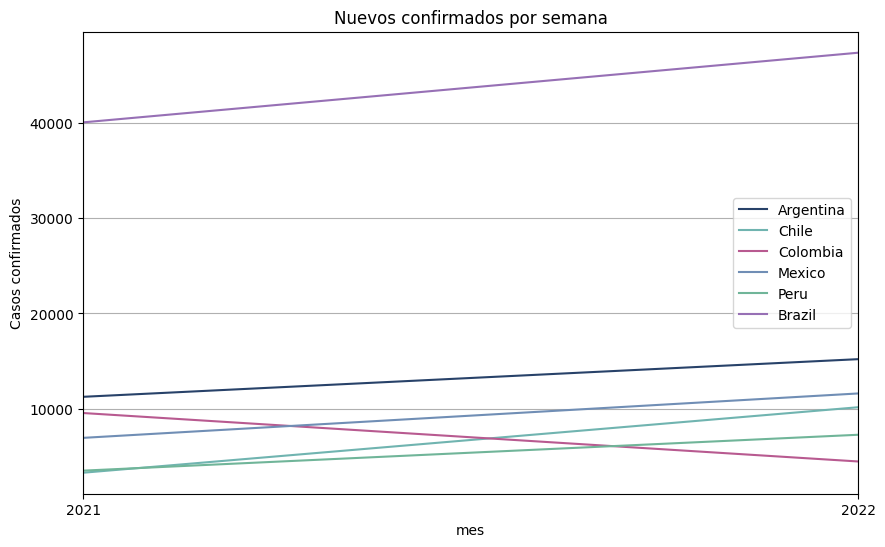

In [53]:
fig, ax = plt.subplots(figsize=(10, 6))
for i in paises_seleccionados:
    data_latinoamerica_fecha2[data_latinoamerica_fecha2['country_name']==i].resample('YE').mean(numeric_only=True)['new_confirmed'].plot()

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Nuevos confirmados por semana')
plt.grid()
plt.legend(paises_seleccionados)
plt.xlabel('mes')
plt.ylabel('Casos confirmados')
plt.show()

In [54]:
data_latinoamerica_2['densidad_de_contagios'] = data_latinoamerica_2['new_confirmed']/data_latinoamerica_2['population']
data_latinoamerica_2.head()

location_key       date country_code country_name  new_confirmed  \
0           AR 2021-01-01           AR    Argentina         2685.0   
1           AR 2021-01-02           AR    Argentina         7767.0   
2           AR 2021-01-03           AR    Argentina         4934.0   
3           AR 2021-01-04           AR    Argentina        13953.0   
4           AR 2021-01-05           AR    Argentina        14085.0   

   new_deceased  cumulative_confirmed  cumulative_deceased  \
0         140.0             1662867.0              46522.0   
1         166.0             1670634.0              46688.0   
2         157.0             1675568.0              46845.0   
3         157.0             1689521.0              47002.0   
4         160.0             1703606.0              47162.0   

   cumulative_vaccine_doses_administered  population  ...  \
0                                18849.0  44938712.0  ...   
1                                20334.0  44938712.0  ...   
2                                20529.0  44938712.0  ...   
3                                25164.0  44938712.0  ...   
4                                29852.0  44938712.0  ...   

   adult_male_mortality_rate  adult_female_mortality_rate  \
0                    147.086                       79.483   
1                    147.086                       79.483   
2                    147.086                       79.483   
3                    147.086                       79.483   
4                    147.086                       79.483   

   pollution_mortality_rate  comorbidity_mortality_rate  new_recovered  \
0                      26.6                        15.8            0.0   
1                      26.6                        15.8            0.0   
2                      26.6                        15.8            0.0   
3                      26.6                        15.8            0.0   
4                      26.6                        15.8            0.0   

   cumulative_recovered  dia_semana  mes   Año  densidad_de_contagios  
0                   0.0           4    1  2021               0.000060  
1                   0.0           5    1  2021               0.000173  
2                   0.0           6    1  2021               0.000110  
3                   0.0           0    1  2021               0.000310  
4                   0.0           1    1  2021               0.000313  

[5 rows x 54 columns]

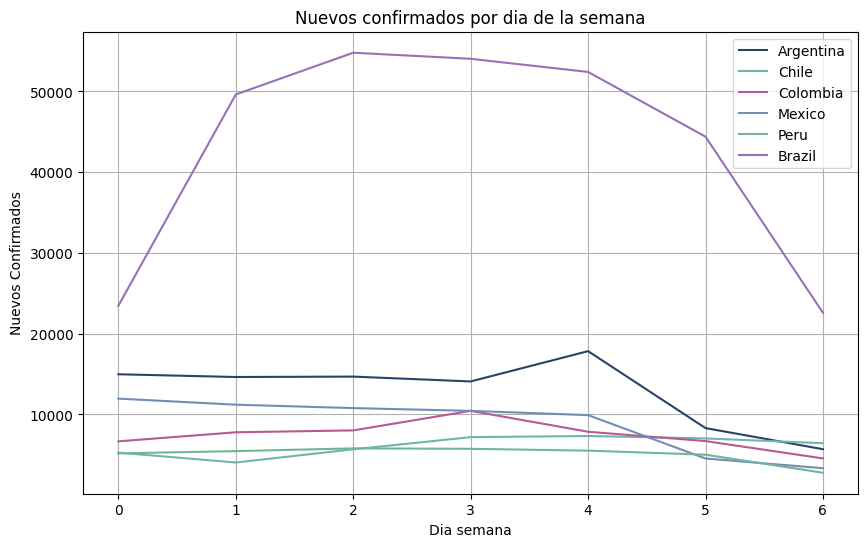

In [55]:
paises_seleccionados=['Argentina','Chile','Colombia','Mexico','Peru','Brazil']
fig, ax = plt.subplots(figsize=(10, 6))
for i in paises_seleccionados:
    
    sns.lineplot(data=data_latinoamerica_2[data_latinoamerica_2['country_name'] == i], x='dia_semana', y='new_confirmed', errorbar=None)

plt.legend(paises_seleccionados)
plt.title('Nuevos confirmados por dia de la semana')
plt.grid()
plt.xlabel('Dia semana')
plt.ylabel('Nuevos Confirmados')

plt.show()

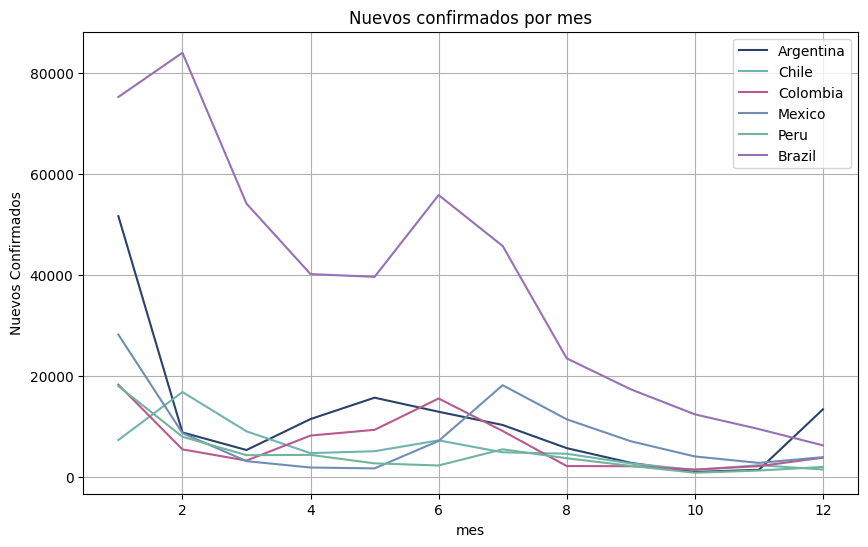

In [56]:
paises_seleccionados=['Argentina','Chile','Colombia','Mexico','Peru','Brazil']
fig, ax = plt.subplots(figsize=(10, 6))
for i in paises_seleccionados:
    
    sns.lineplot(data=data_latinoamerica_2[data_latinoamerica_2['country_name'] == i], x='mes', y='new_confirmed', errorbar=None)

plt.legend(paises_seleccionados)
plt.title('Nuevos confirmados por mes')
plt.grid()
plt.xlabel('mes')
plt.ylabel('Nuevos Confirmados')

plt.show()

In [57]:
data_latinoamerica_2['mes'] = data_latinoamerica_2['date'].dt.to_period('M')
data_acumulado = data_latinoamerica_2.groupby(['country_name', 'mes']).sum(numeric_only=True).reset_index()

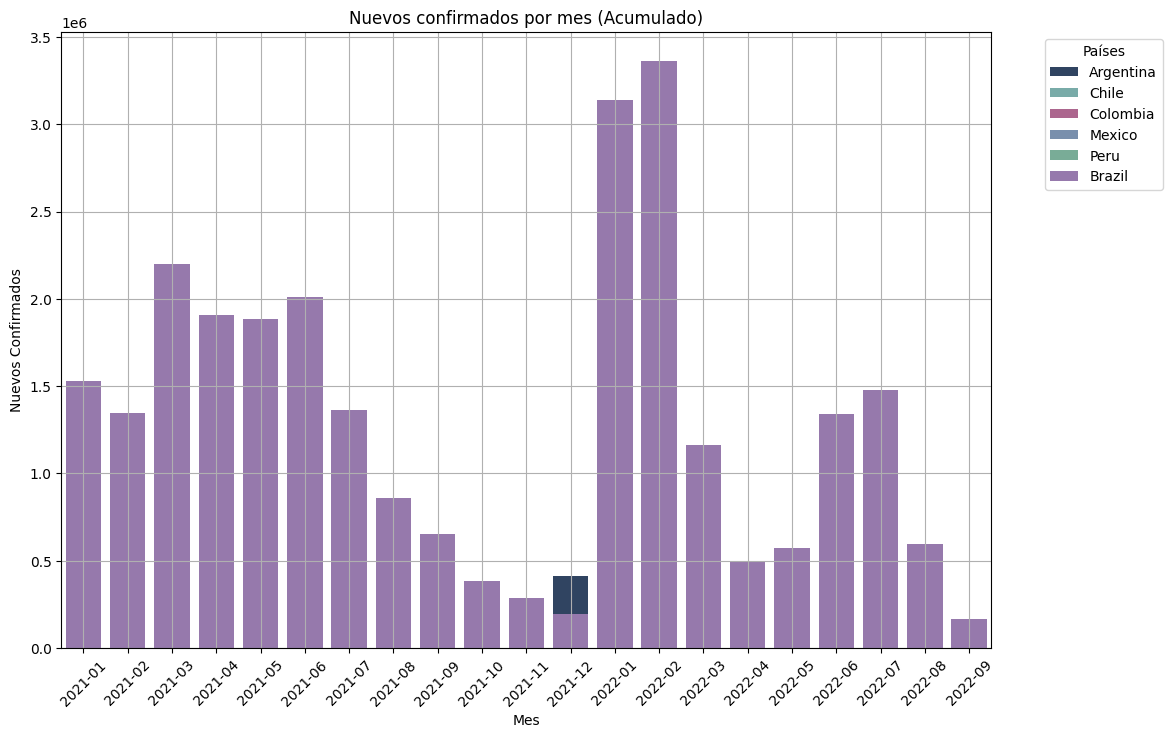

In [58]:
paises_seleccionados = ['Argentina', 'Chile', 'Colombia', 'Mexico', 'Peru', 'Brazil']

fig, ax = plt.subplots(figsize=(12, 8))
for i in paises_seleccionados:
    sns.barplot(data=data_acumulado[data_acumulado['country_name'] == i], x='mes', y='new_confirmed', label=i, ax=ax)

plt.legend(title='Países', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Nuevos confirmados por mes (Acumulado)')
plt.grid()
plt.xlabel('Mes')
plt.ylabel('Nuevos Confirmados')
plt.xticks(rotation=45)
plt.show()

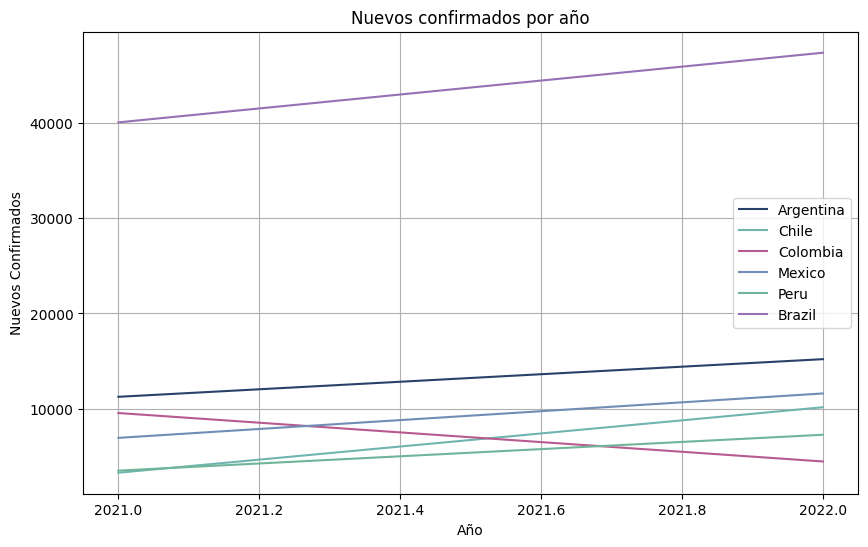

In [59]:
paises_seleccionados=['Argentina','Chile','Colombia','Mexico','Peru','Brazil']
fig, ax = plt.subplots(figsize=(10, 6))
for i in paises_seleccionados:
    
    sns.lineplot(data=data_latinoamerica_2[data_latinoamerica_2['country_name'] == i], x='Año', y='new_confirmed', errorbar=None)

plt.legend(paises_seleccionados)
plt.title('Nuevos confirmados por año')
plt.grid()
plt.xlabel('Año')
plt.ylabel('Nuevos Confirmados')

plt.show()

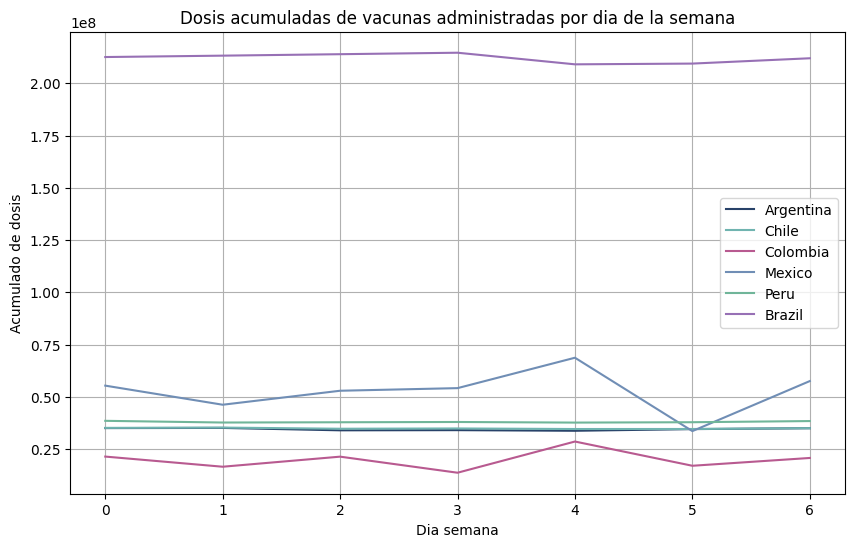

In [60]:
paises_seleccionados=['Argentina','Chile','Colombia','Mexico','Peru','Brazil']
fig, ax = plt.subplots(figsize=(10, 6))
for i in paises_seleccionados:
    
    sns.lineplot(data=data_latinoamerica_2[data_latinoamerica_2['country_name'] == i], x='dia_semana', y='cumulative_vaccine_doses_administered', errorbar=None)

plt.legend(paises_seleccionados)
plt.title('Dosis acumuladas de vacunas administradas por dia de la semana')
plt.grid()
plt.xlabel('Dia semana')
plt.ylabel('Acumulado de dosis')

plt.show()

Dosis acumuladas de vacunas administradas por año por columna 'Año' y por resample('YE').mean

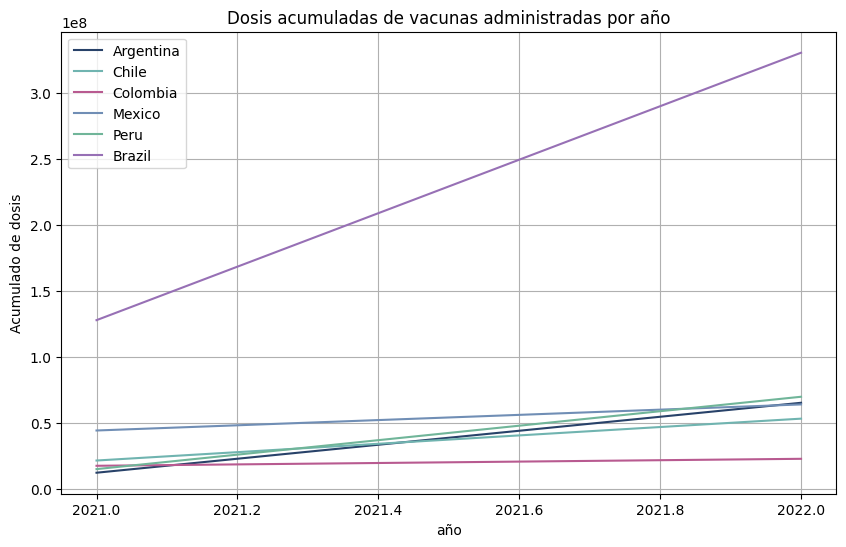

In [61]:
paises_seleccionados=['Argentina','Chile','Colombia','Mexico','Peru','Brazil']
fig, ax = plt.subplots(figsize=(10, 6))
for i in paises_seleccionados:
    
    sns.lineplot(data=data_latinoamerica_2[data_latinoamerica_2['country_name'] == i], x='Año', y='cumulative_vaccine_doses_administered', errorbar=None)

plt.legend(paises_seleccionados)
plt.title('Dosis acumuladas de vacunas administradas por año')
plt.grid()
plt.xlabel('año')
plt.ylabel('Acumulado de dosis')

plt.show()

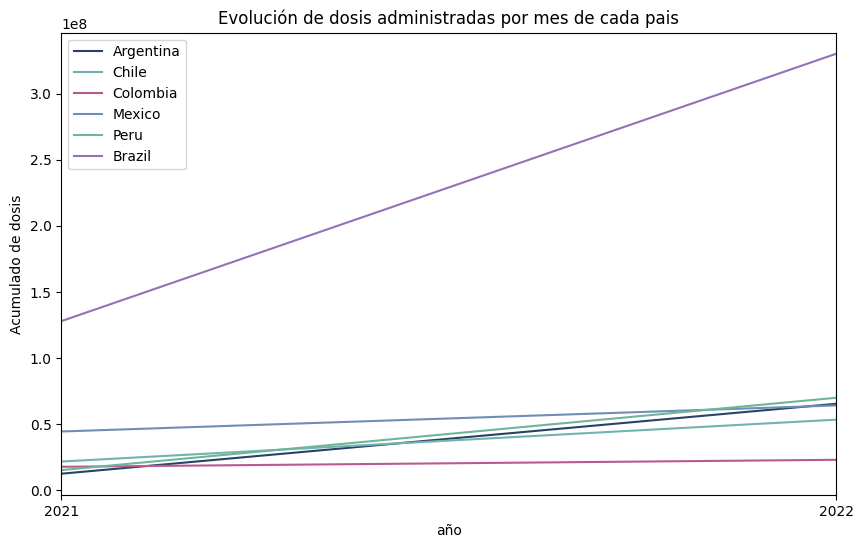

In [62]:
fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_seleccionados:
    data_latinoamerica_fecha2[data_latinoamerica_fecha2['country_name']==pais].resample('YE').mean(numeric_only=True)['cumulative_vaccine_doses_administered'].plot()
    
plt.title('Evolución de dosis administradas por mes de cada pais')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.xlabel('año')
plt.ylabel('Acumulado de dosis')
plt.show()

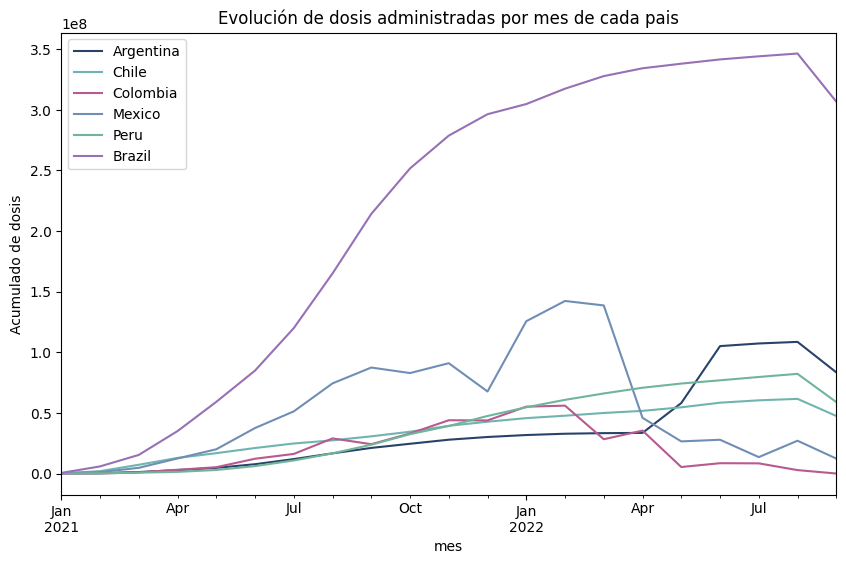

In [63]:
fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_seleccionados:
    data_latinoamerica_fecha2[data_latinoamerica_fecha2['country_name']==pais].resample('ME').mean(numeric_only=True)['cumulative_vaccine_doses_administered'].plot()
    
plt.title('Evolución de dosis administradas por mes de cada pais')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.xlabel('mes')
plt.ylabel('Acumulado de dosis')
plt.show()

In [64]:
data_latinoamerica_2.columns

Index(['location_key', 'date', 'country_code', 'country_name', 'new_confirmed',
       'new_deceased', 'cumulative_confirmed', 'cumulative_deceased',
       'cumulative_vaccine_doses_administered', 'population',
       'population_male', 'population_female', 'population_rural',
       'population_urban', 'population_density', 'human_development_index',
       'population_age_00_09', 'population_age_10_19', 'population_age_20_29',
       'population_age_30_39', 'population_age_40_49', 'population_age_50_59',
       'population_age_60_69', 'population_age_70_79',
       'population_age_80_and_older', 'gdp_usd', 'gdp_per_capita_usd',
       'latitude', 'longitude', 'area_sq_km', 'smoking_prevalence',
       'diabetes_prevalence', 'infant_mortality_rate', 'nurses_per_1000',
       'physicians_per_1000', 'average_temperature_celsius',
       'minimum_temperature_celsius', 'maximum_temperature_celsius',
       'rainfall_mm', 'relative_humidity', 'population_largest_city',
       'area_rural_

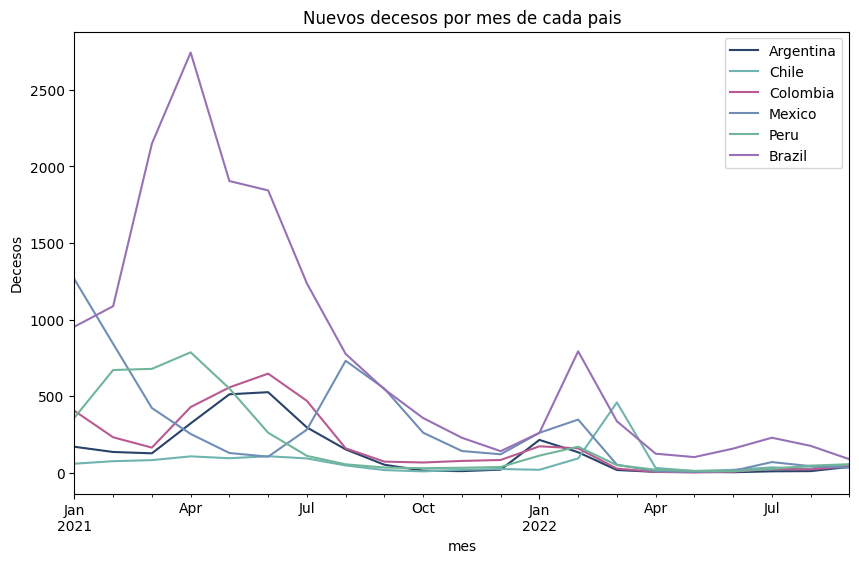

In [65]:
fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_seleccionados:
    data_latinoamerica_fecha2[data_latinoamerica_fecha2['country_name']==pais].resample('ME').mean(numeric_only=True)['new_deceased'].plot()
    
plt.title('Nuevos decesos por mes de cada pais')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.xlabel('mes')
plt.ylabel('Decesos')
plt.show()

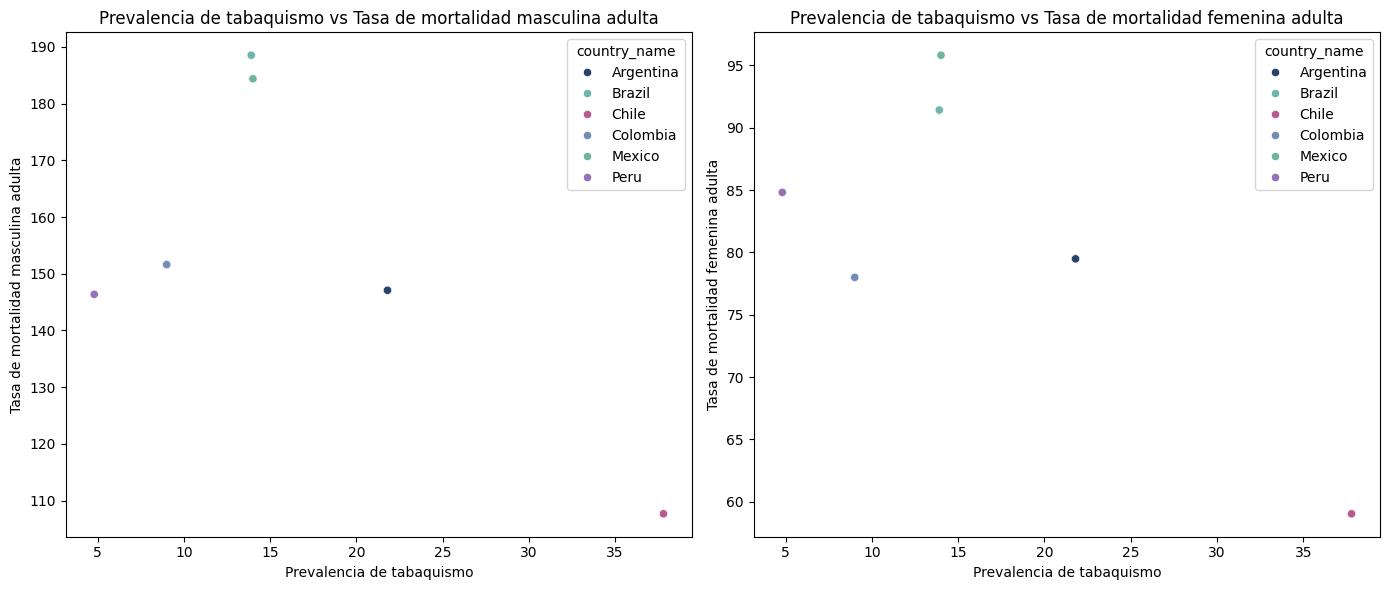

In [66]:
paises_seleccionados = ['Argentina', 'Chile', 'Colombia', 'Mexico', 'Peru', 'Brazil']
data_filtrada = data_latinoamerica_2[data_latinoamerica_2['country_name'].isin(paises_seleccionados)]
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
# 1 grfico (masculino)
sns.scatterplot(data=data_filtrada, x='smoking_prevalence', y='adult_male_mortality_rate', hue='country_name', ax=ax[0])
ax[0].set_title('Prevalencia de tabaquismo vs Tasa de mortalidad masculina adulta')
ax[0].set_xlabel('Prevalencia de tabaquismo')
ax[0].set_ylabel('Tasa de mortalidad masculina adulta')

plt.tight_layout()
# 2 grfico (femenino)
sns.scatterplot(data=data_filtrada, x='smoking_prevalence', y='adult_female_mortality_rate', hue='country_name', ax=ax[1])
ax[1].set_title('Prevalencia de tabaquismo vs Tasa de mortalidad femenina adulta')
ax[1].set_xlabel('Prevalencia de tabaquismo')
ax[1].set_ylabel('Tasa de mortalidad femenina adulta')

plt.tight_layout()

plt.show()

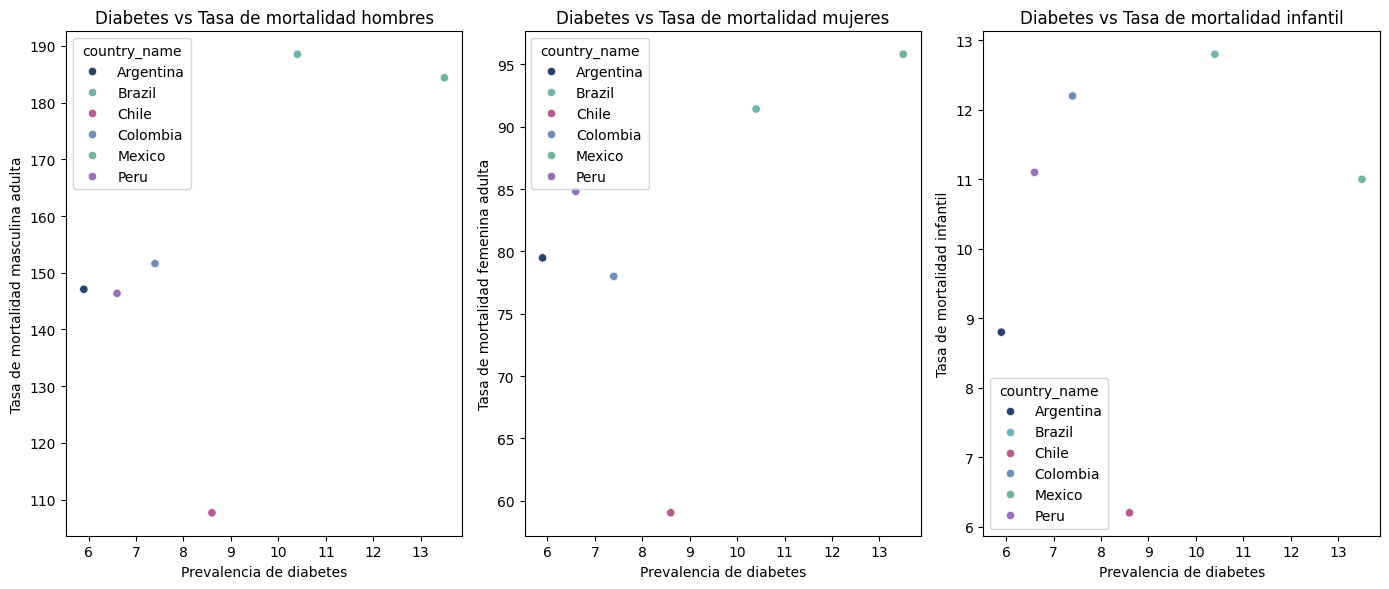

In [67]:
paises_seleccionados = ['Argentina', 'Chile', 'Colombia', 'Mexico', 'Peru', 'Brazil']
data_filtrada = data_latinoamerica_2[data_latinoamerica_2['country_name'].isin(paises_seleccionados)]
fig, ax = plt.subplots(1, 3, figsize=(14, 6))
# 1 grfico (masculino)
sns.scatterplot(data=data_filtrada, x='diabetes_prevalence', y='adult_male_mortality_rate', hue='country_name', ax=ax[0])
ax[0].set_title('Diabetes vs Tasa de mortalidad hombres')
ax[0].set_xlabel('Prevalencia de diabetes')
ax[0].set_ylabel('Tasa de mortalidad masculina adulta')
plt.tight_layout()
# 2 grfico (femenino)
sns.scatterplot(data=data_filtrada, x='diabetes_prevalence', y='adult_female_mortality_rate', hue='country_name', ax=ax[1])
ax[1].set_title('Diabetes vs Tasa de mortalidad mujeres')
ax[1].set_xlabel('Prevalencia de diabetes')
ax[1].set_ylabel('Tasa de mortalidad femenina adulta')
plt.tight_layout()
# 3 grfico (masculino)
sns.scatterplot(data=data_filtrada, x='diabetes_prevalence', y='infant_mortality_rate', hue='country_name', ax=ax[2])
ax[2].set_title('Diabetes vs Tasa de mortalidad infantil')
ax[2].set_xlabel('Prevalencia de diabetes')
ax[2].set_ylabel('Tasa de mortalidad infantil')
plt.tight_layout()

plt.show()

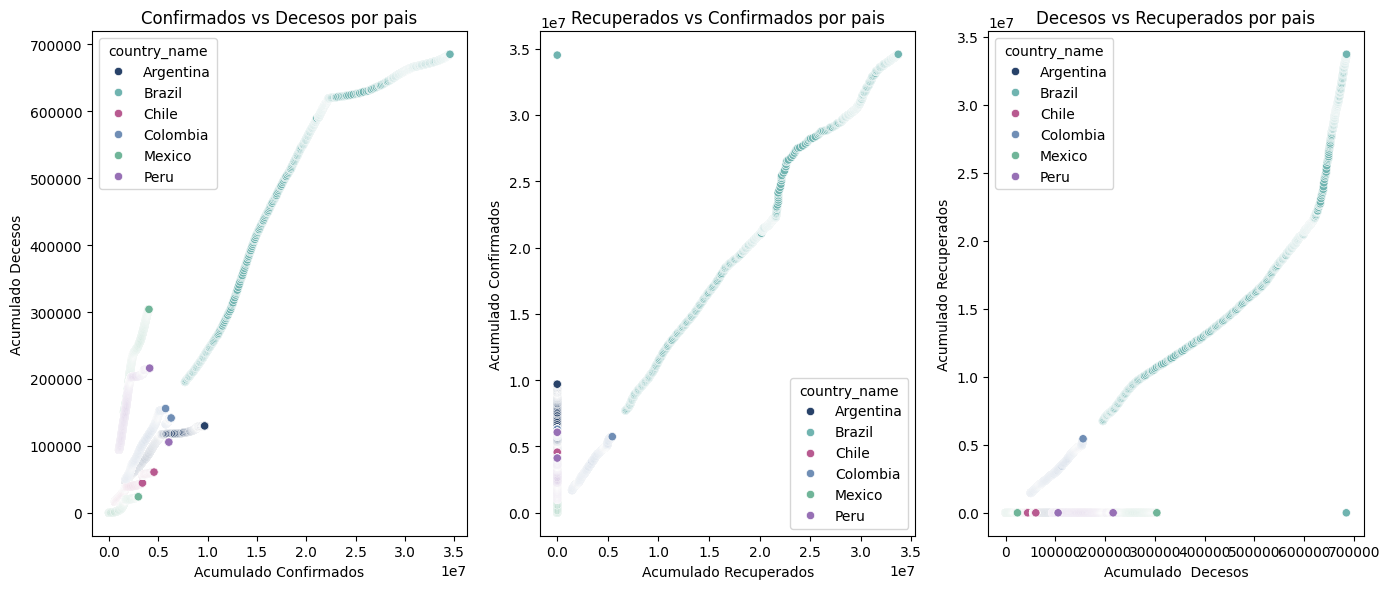

In [68]:
paises_seleccionados = ['Argentina', 'Chile', 'Colombia', 'Mexico', 'Peru', 'Brazil']
data_filtrada = data_latinoamerica_2[data_latinoamerica_2['country_name'].isin(paises_seleccionados)]
fig, ax = plt.subplots(1, 3, figsize=(14, 6))
# 1 grfico (masculino)
sns.scatterplot(data=data_filtrada, x='cumulative_confirmed', y='cumulative_deceased', hue='country_name', ax=ax[0])
ax[0].set_title('Confirmados vs Decesos por pais')
ax[0].set_xlabel('Acumulado Confirmados')
ax[0].set_ylabel('Acumulado Decesos')
plt.tight_layout()
# 2 grfico (femenino)
sns.scatterplot(data=data_filtrada, x='cumulative_recovered', y='cumulative_confirmed', hue='country_name', ax=ax[1])
ax[1].set_title('Recuperados vs Confirmados por pais')
ax[1].set_xlabel('Acumulado Recuperados')
ax[1].set_ylabel('Acumulado Confirmados')
plt.tight_layout()
# 3 grfico (masculino)
sns.scatterplot(data=data_filtrada, x='cumulative_deceased', y='cumulative_recovered', hue='country_name', ax=ax[2])
ax[2].set_title('Decesos vs Recuperados por pais')
ax[2].set_xlabel('Acumulado  Decesos')
ax[2].set_ylabel('Acumulado Recuperados')
plt.tight_layout()

plt.show()


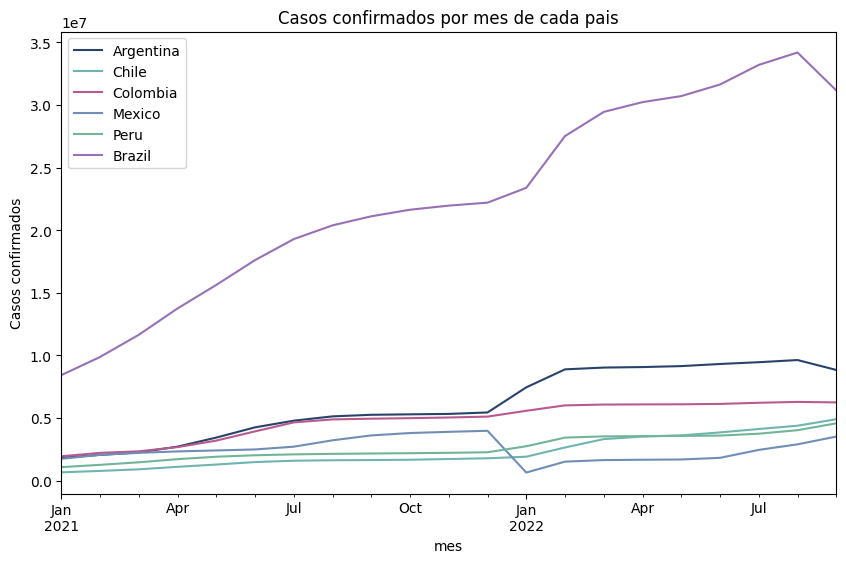

In [69]:
fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_seleccionados:
    data_latinoamerica_fecha2[data_latinoamerica_fecha2['country_name']==pais].resample('ME').mean(numeric_only=True)['cumulative_confirmed'].plot()
plt.title('Casos confirmados por mes de cada pais')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.xlabel('mes')
plt.ylabel('Casos confirmados')
plt.show()

El país que más casos confirmados ha tenido es Brasil, seguido de México, Argentina, Colombia, Chile y Perú. Esto no quiere decir que manejaran peor la pandemia, ya que hay que tener en cuenta la cantidad de habitantes de cada país además de otros factores y cantidad de datos que tenemos.

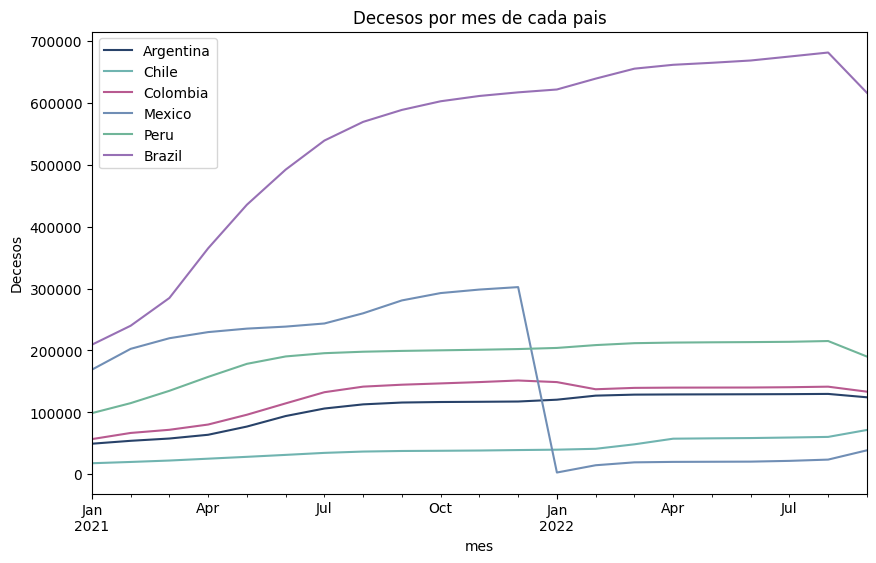

In [70]:
fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_seleccionados:
    data_latinoamerica_fecha2[data_latinoamerica_fecha2['country_name']==pais].resample('ME').mean(numeric_only=True)['cumulative_deceased'].plot()
plt.title('Decesos por mes de cada pais')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.xlabel('mes')
plt.ylabel('Decesos')
plt.show()

El pais que mas muertes ha tenido es Brasil, seguido de México, Colombia, Argentina, Perú y Chile. Sin embargo, esto no quiere decir que estos paises sean los que peor han manejado la pandemia, ya que hay que tener en cuenta la cantidad de habitantes de cada país además de otros factores y cantidad de datos que tenemos.

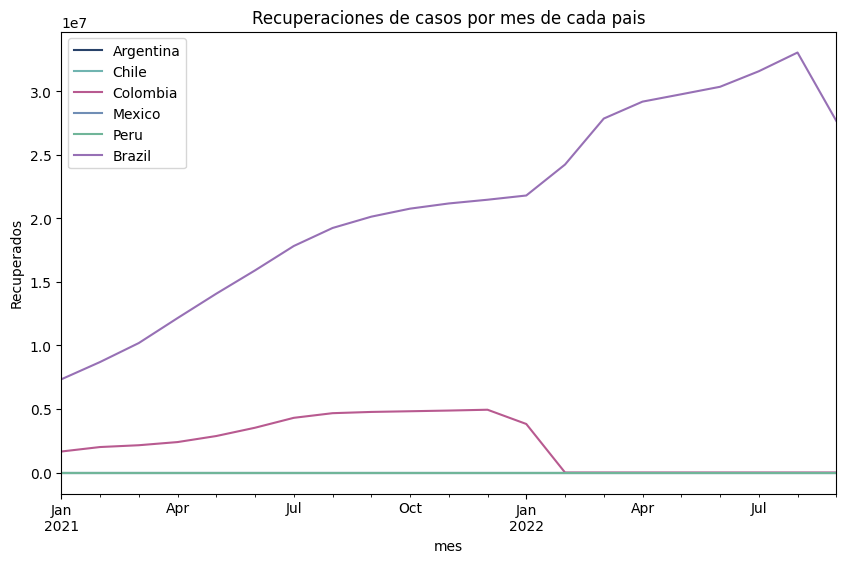

In [71]:
fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_seleccionados:
    data_latinoamerica_fecha2[data_latinoamerica_fecha2['country_name']==pais].resample('ME').mean(numeric_only=True)['cumulative_recovered'].plot()
plt.title('Recuperaciones de casos por mes de cada pais')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.legend(paises_seleccionados)
plt.xlabel('mes')
plt.ylabel('Recuperados')
plt.show()

El país queha tenido mas recuperados es Brasil, sin embargo esto como lo dijimos viene relacionado a la cantidad de personas y vacunas disponibles.

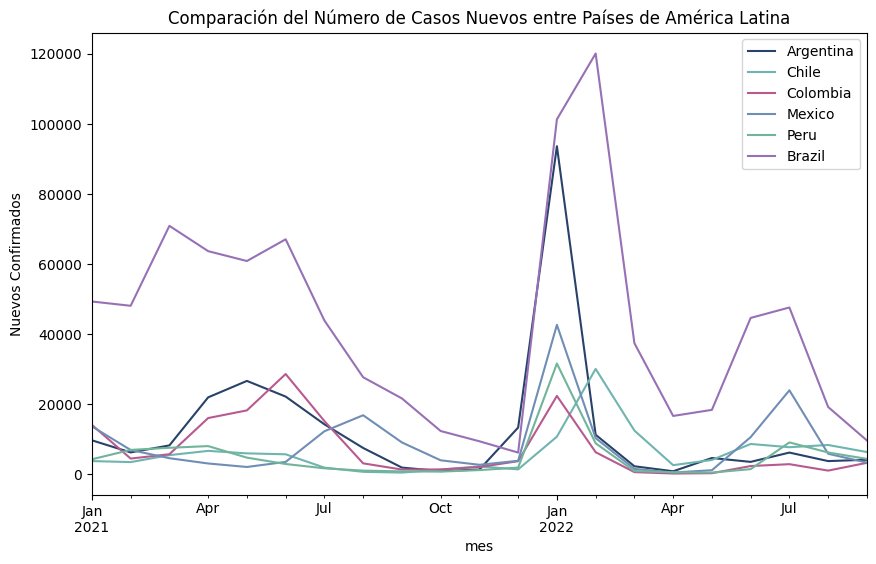

In [72]:
fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_seleccionados:
    data_latinoamerica_fecha2[data_latinoamerica_fecha2['country_name']==pais].resample('ME').mean(numeric_only=True)['new_confirmed'].plot()
plt.title('Comparación del Número de Casos Nuevos entre Países de América Latina')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.xlabel('mes')
plt.ylabel('Nuevos Confirmados')
plt.show()

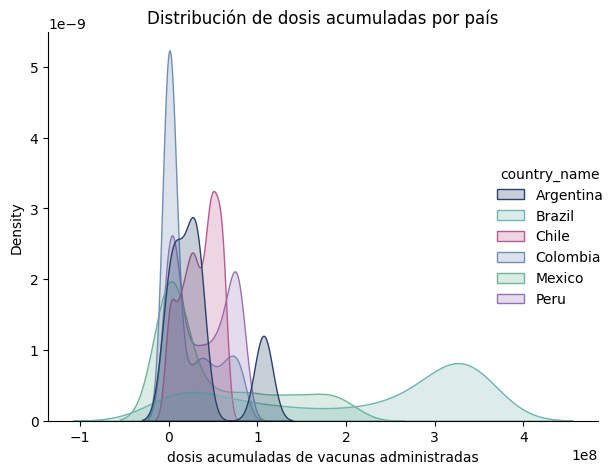

In [73]:
sns.displot(data_latinoamerica_2, x="cumulative_vaccine_doses_administered", hue="country_name", kind="kde", fill=True)
plt.title('Distribución de dosis acumuladas por país')
plt.xlabel('dosis acumuladas de vacunas administradas')
plt.tight_layout()


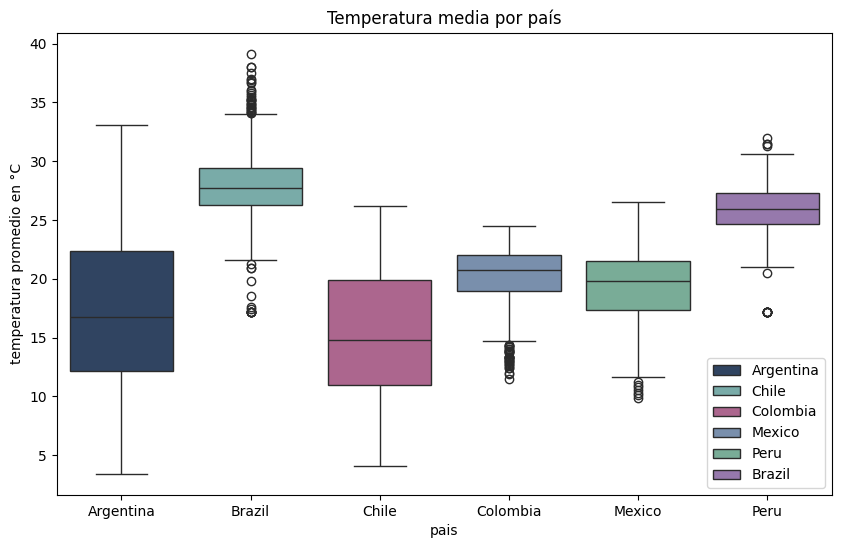

In [74]:
#average_temperature_celsius vs new_confirmed por pais boxplot
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x='country_name', y='average_temperature_celsius', data=data_latinoamerica_2, hue='country_name')
plt.title('Temperatura media por país')
plt.legend(paises_seleccionados)
plt.xlabel('pais')
plt.ylabel('temperatura promedio en °C')
plt.show()

Aunque chile tiene rangos diferentes de temperatura y eso podría haber afectado la cantidad de casos confirmados y muertes, se puede observar que chile ha manejado mejor la pandemia que los demás paises.

Esto poco a poco nos ha llevado a concluir que los paises donde se podría crear los nuevos centros serían donde hay mas casos confirmados y muertes, ya que es donde se necesita más ayuda.

Debemos realizar un analisis detallado de los datos y u estudio de datos antes de tomar decisiones presipitadas

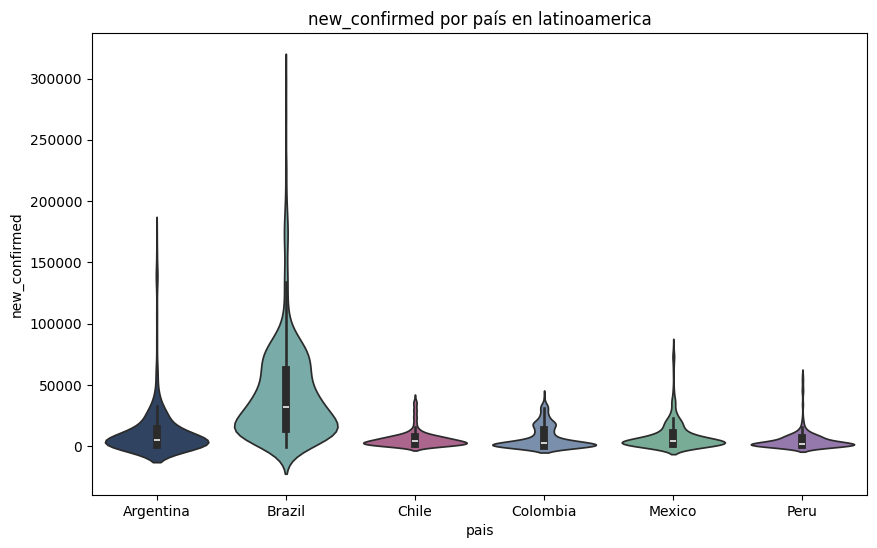

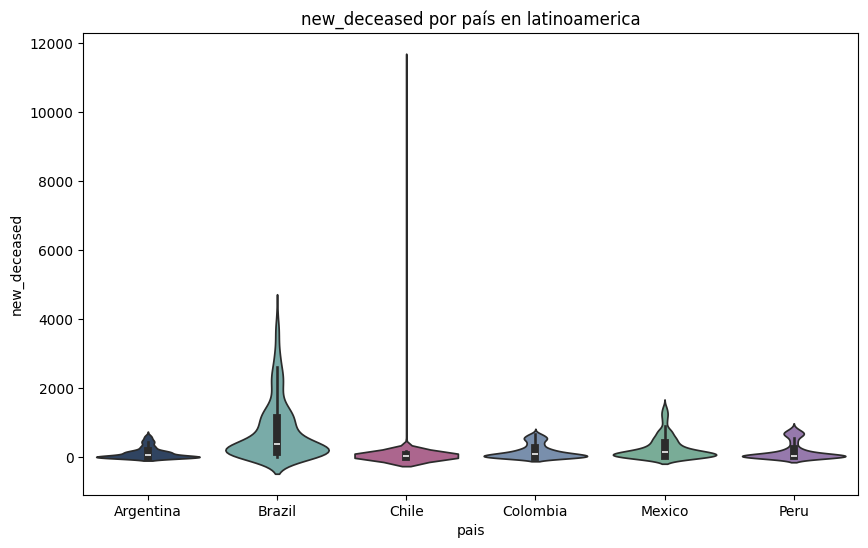

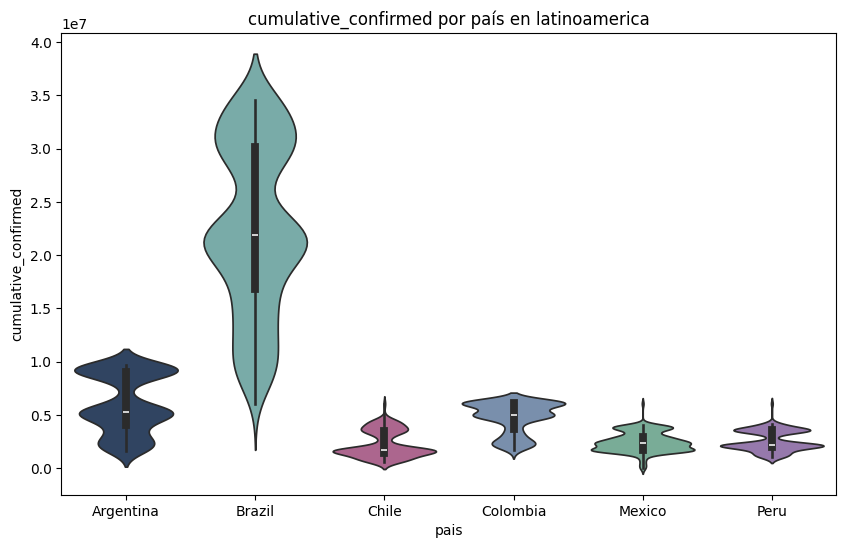

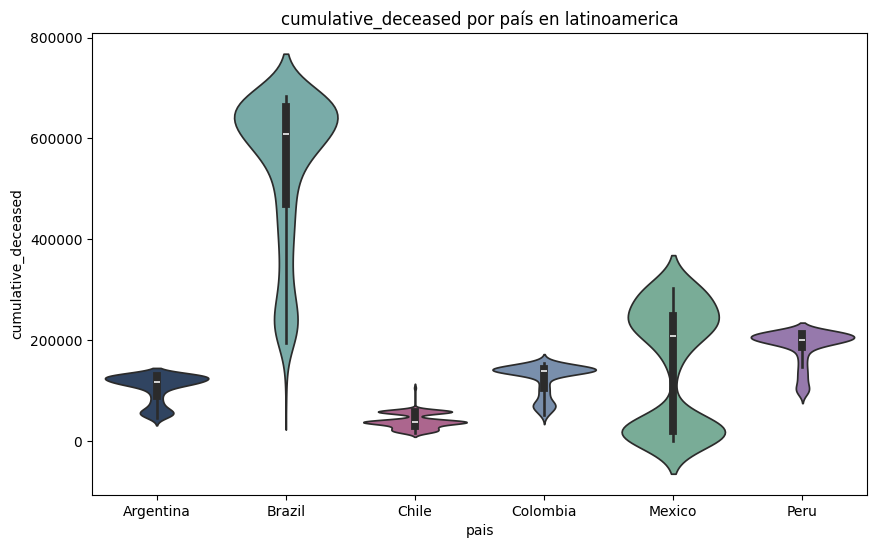

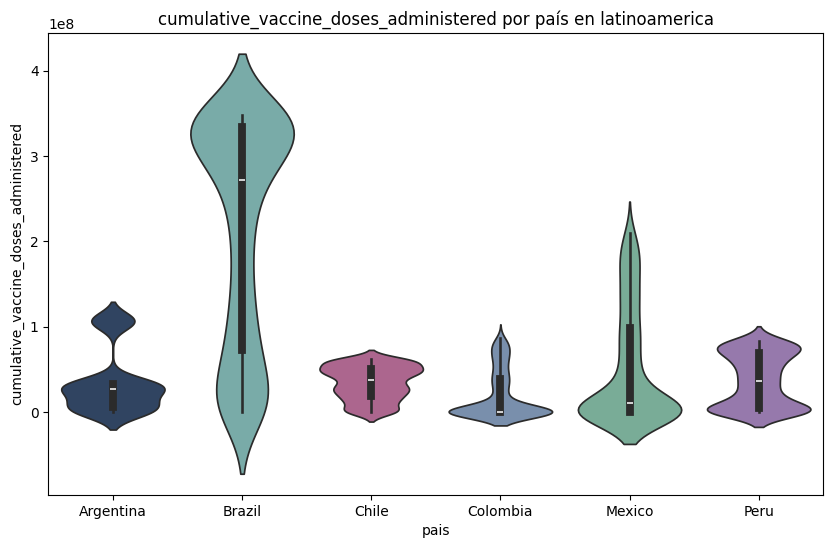

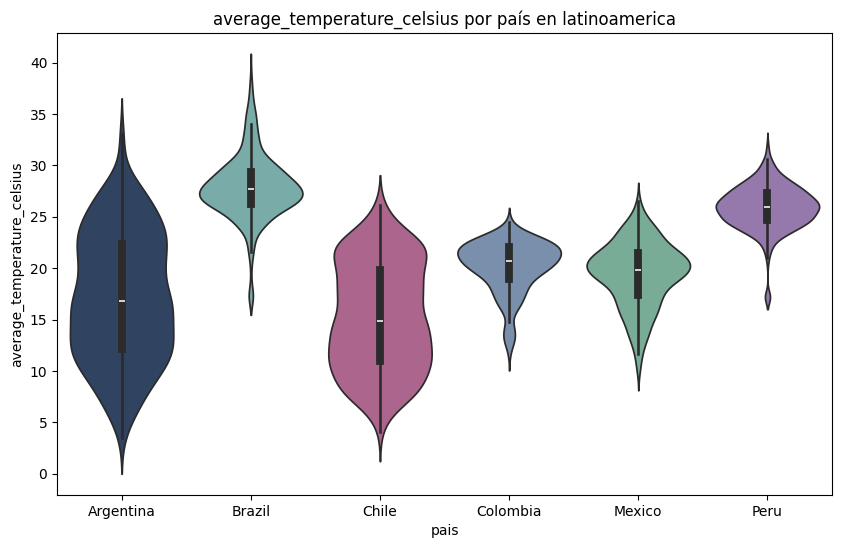

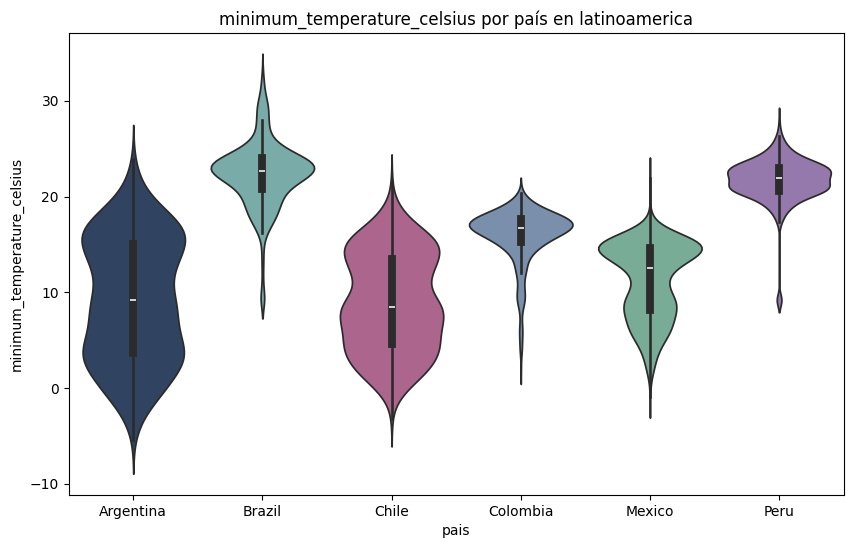

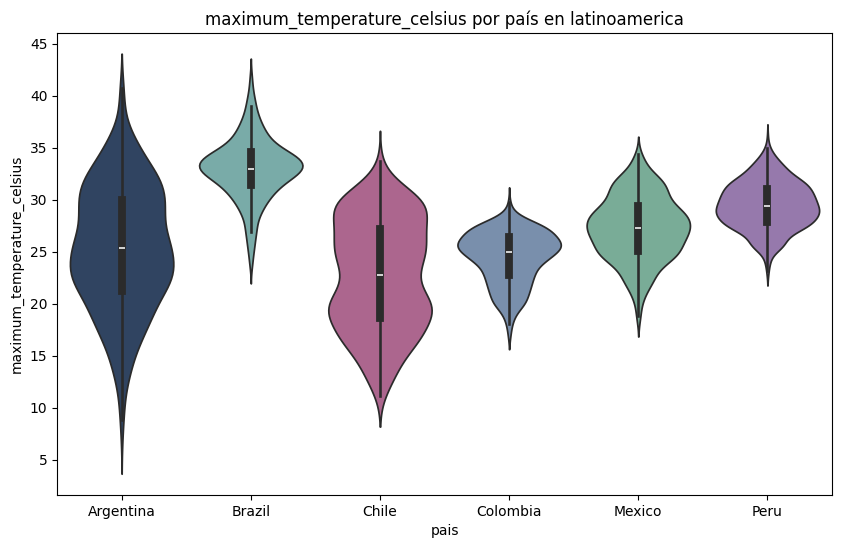

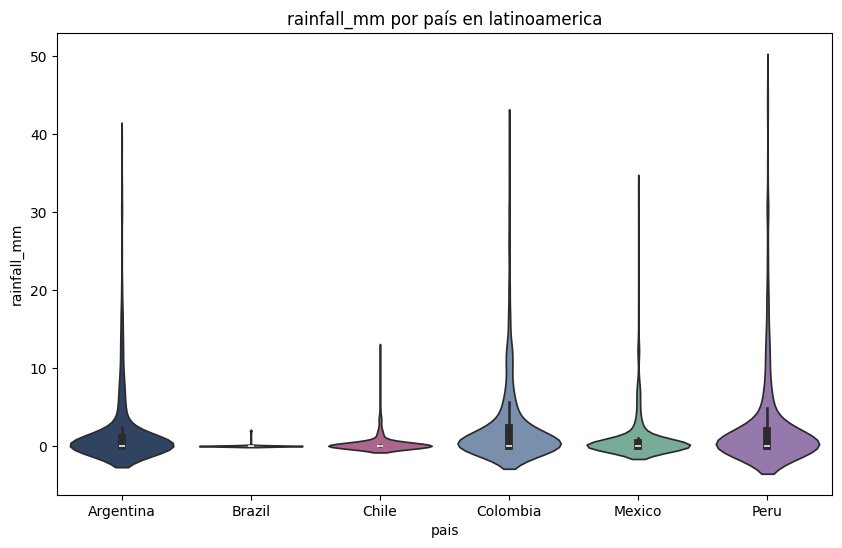

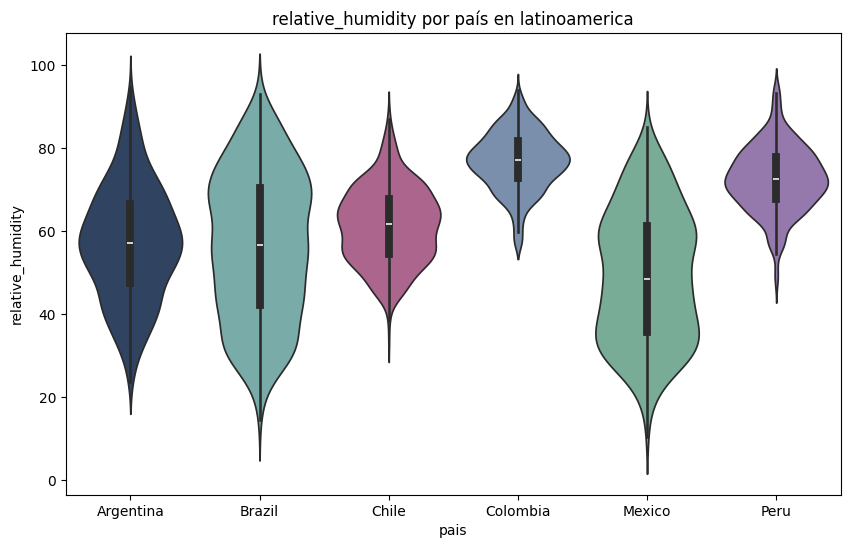

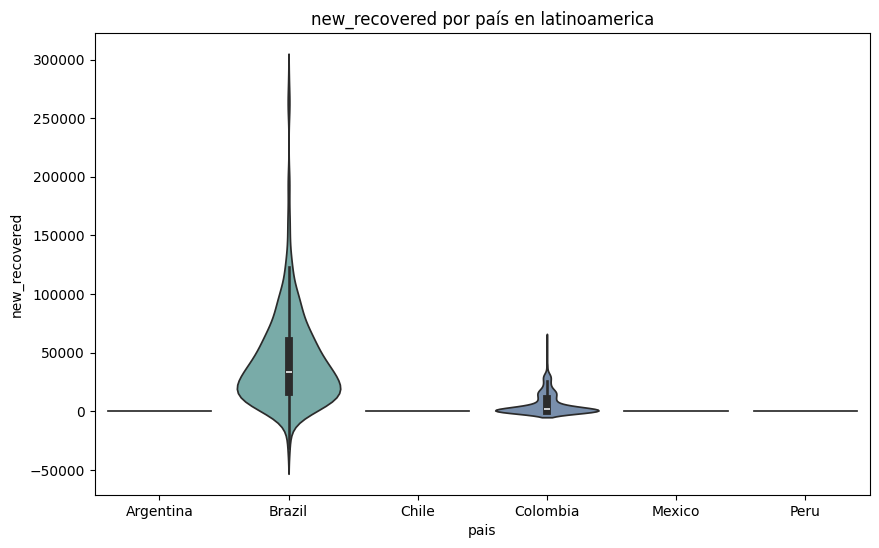

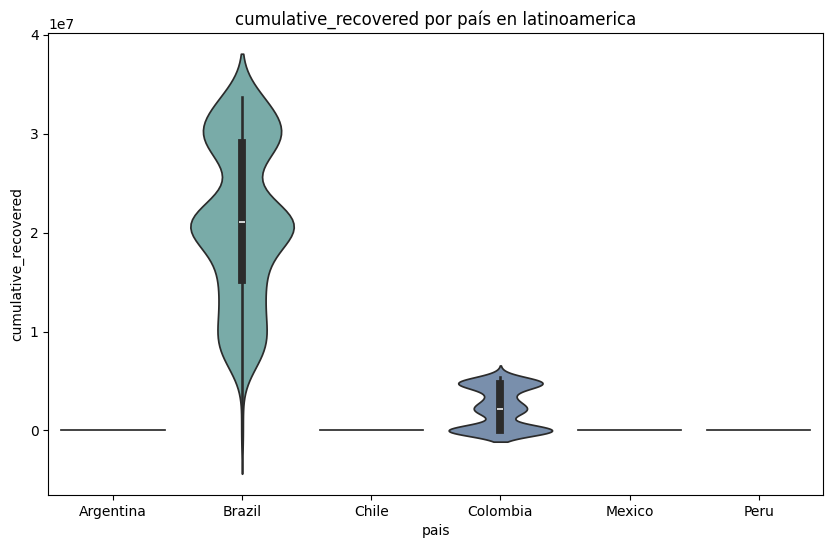

In [75]:
# Se crea un dataframe con las columnas mayores a 6 porque son las que tienen valores diferentes para cada país.
columnas_mayores_6=[]
for i in data_latinoamerica_fecha2.columns:
    if i not in ['location_key','date','country_code','latitude','longitude']:
        if data_latinoamerica_fecha2[i].nunique()>6:
            columnas_mayores_6.append(i)
#agregar a columnas_mayores_6 la columna country_name para poder hacer analisis por país.
columnas_mayores_6.append('country_name')

# Se crea un dataframe con las columnas mayores a 6
data_latinoamerica_paises_mayores_6=data_latinoamerica_fecha2[columnas_mayores_6]


# violinplot en todos los paises para variables numericas
for i in data_latinoamerica_paises_mayores_6.columns:
    if i not in ['location_key','date','country_code','latitude','longitude','country_name']:
        fig, ax = plt.subplots(figsize=(10, 6))
        sns.violinplot(x='country_name', y=i, data=data_latinoamerica_paises_mayores_6,hue='country_name')
        plt.title(f'{i} por país en latinoamerica')
        plt.xlabel('pais')
        plt.show()

### Distribucion poblacional por grupos de edad
Procedamos a analizar la distribución de la población por grupos de edad en los paises seleccionados, para tratar de entender como se comporta la población en cada país.

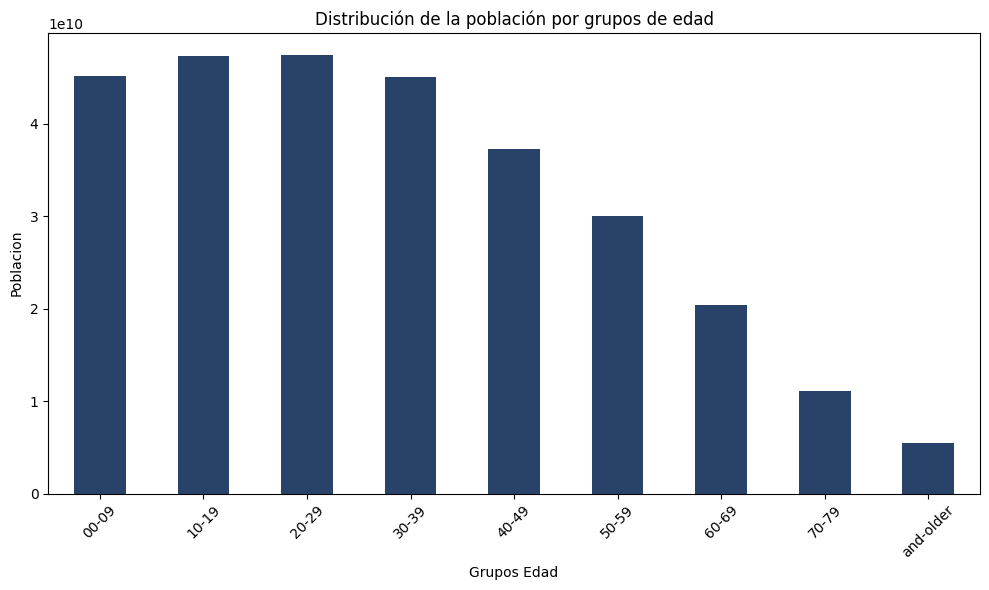

In [76]:
age_columns = ['population_age_00_09', 'population_age_10_19', 'population_age_20_29', 'population_age_30_39', 'population_age_40_49', 'population_age_50_59', 'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older']
age_distribution = data_latinoamerica_2[age_columns].sum()

plt.figure(figsize=(10, 6))
age_distribution.plot(kind='bar', stacked=True)
plt.xlabel('Grupos Edad')
plt.ylabel('Poblacion')
plt.title('Distribución de la población por grupos de edad')
plt.xticks(range(len(age_columns)), [col.split('_')[-2] + '-' + col.split('_')[-1] for col in age_columns], rotation=45)
plt.tight_layout()
plt.show()

se evidencia la población por grupos de edad en cada país, lo que nos puede ayudar a entender cómo se comporta la población y también nos genera la idea de que podríamos graficar la cantidad de vacunas por cada grupo etario. 
### Grupo Etario mas Vacunado

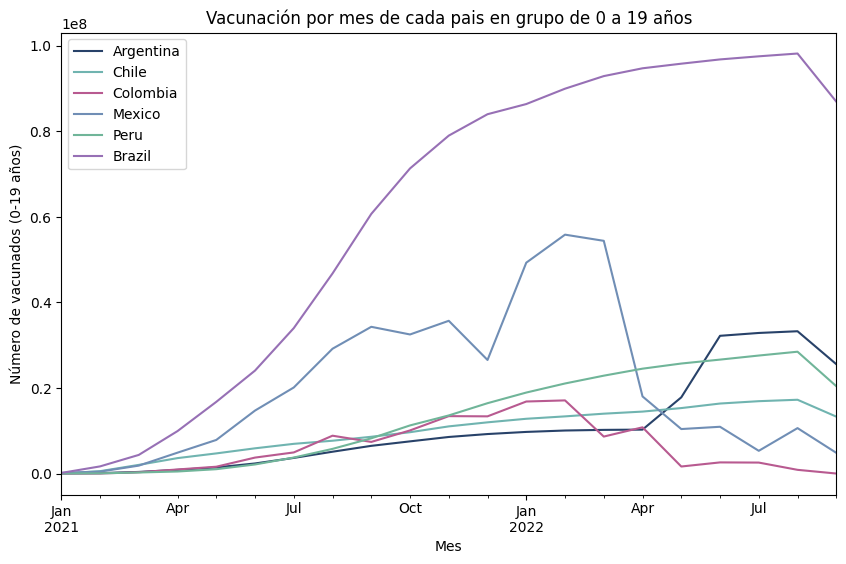

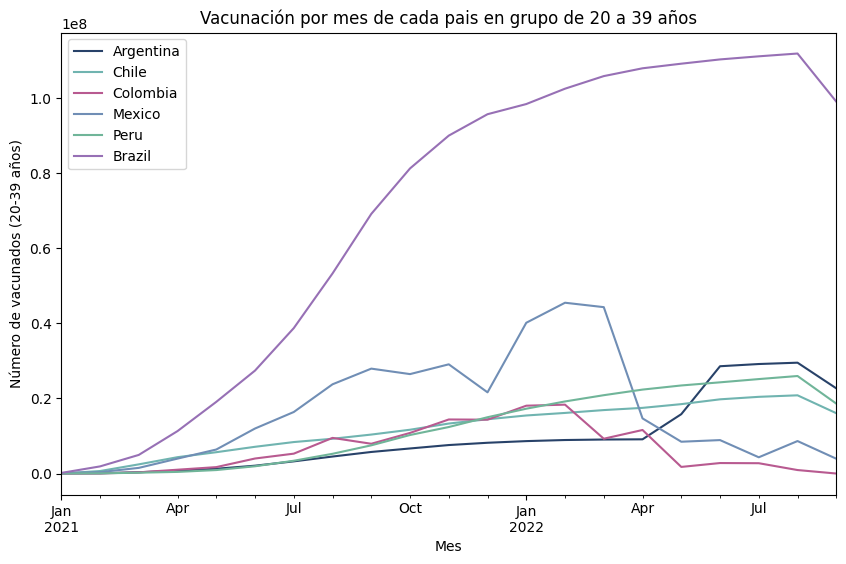

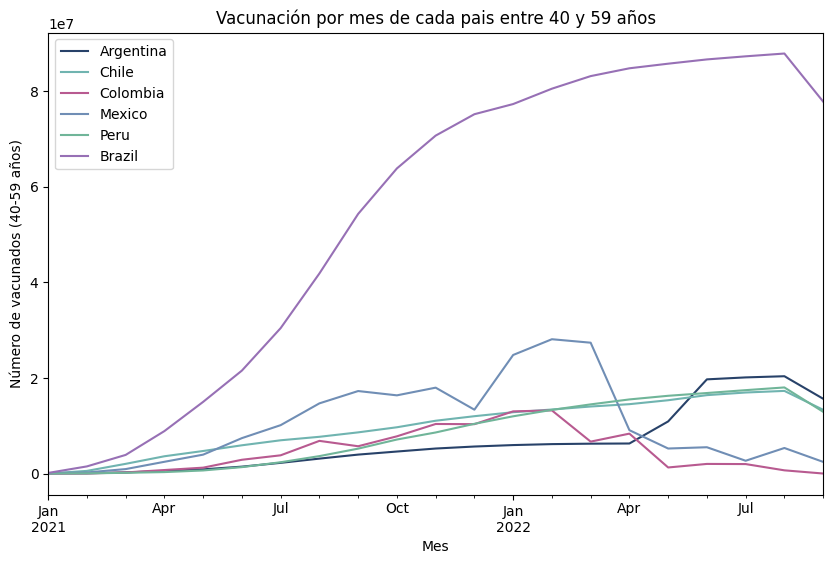

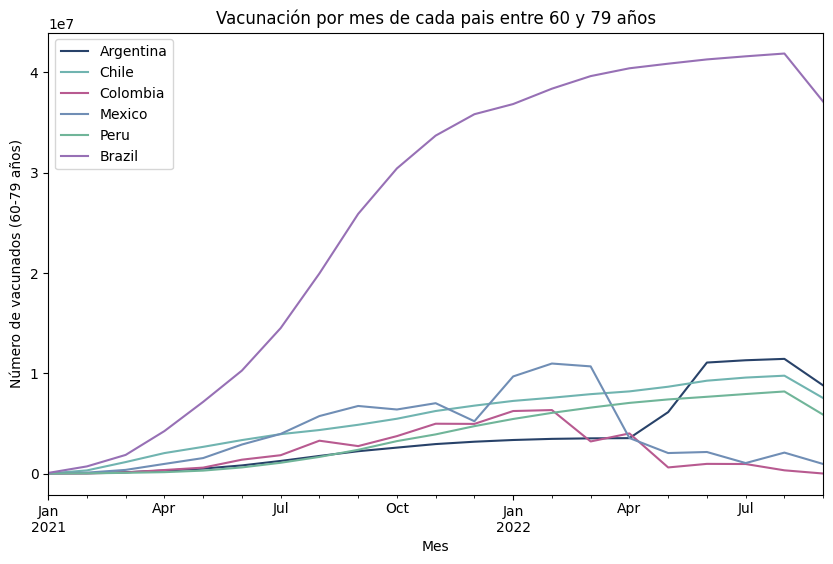

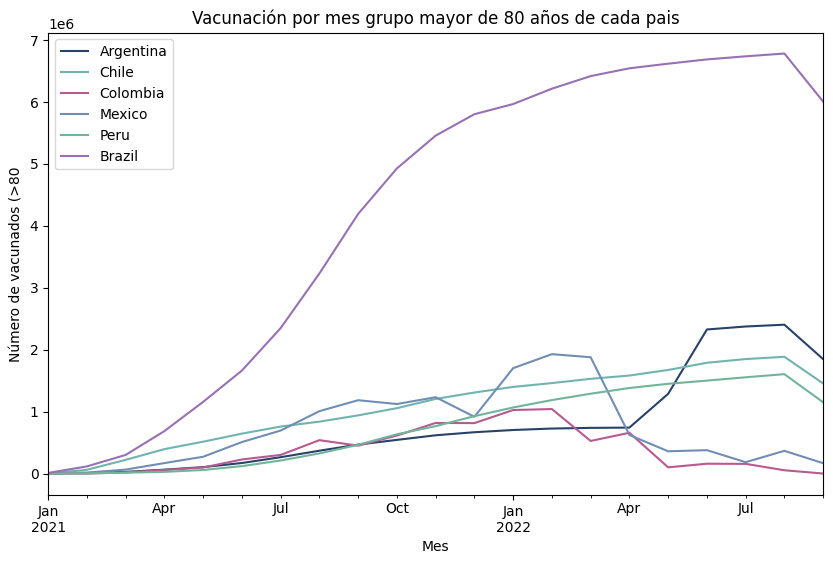

In [78]:
#grupo etareo mas vacunado
data_latinoamerica_fecha2['population_age_00_19']=data_latinoamerica_fecha2['population_age_00_09']+data_latinoamerica_fecha2['population_age_10_19']
data_latinoamerica_fecha2['population_age_20_39']=data_latinoamerica_fecha2['population_age_20_29']+data_latinoamerica_fecha2['population_age_30_39']
data_latinoamerica_fecha2['population_age_40_59']=data_latinoamerica_fecha2['population_age_40_49']+data_latinoamerica_fecha2['population_age_50_59']
data_latinoamerica_fecha2['population_age_60_79']=data_latinoamerica_fecha2['population_age_60_69']+data_latinoamerica_fecha2['population_age_70_79']
data_latinoamerica_fecha2['population_age_80_and_older']=data_latinoamerica_fecha2['population_age_80_and_older']

data_latinoamerica_fecha2['population_age_00_19_vacunados']=data_latinoamerica_fecha2['cumulative_vaccine_doses_administered']*data_latinoamerica_fecha2['population_age_00_19']/data_latinoamerica_fecha2['population']
data_latinoamerica_fecha2['population_age_20_39_vacunados']=data_latinoamerica_fecha2['cumulative_vaccine_doses_administered']*data_latinoamerica_fecha2['population_age_20_39']/data_latinoamerica_fecha2['population']
data_latinoamerica_fecha2['population_age_40_59_vacunados']=data_latinoamerica_fecha2['cumulative_vaccine_doses_administered']*data_latinoamerica_fecha2['population_age_40_59']/data_latinoamerica_fecha2['population']
data_latinoamerica_fecha2['population_age_60_79_vacunados']=data_latinoamerica_fecha2['cumulative_vaccine_doses_administered']*data_latinoamerica_fecha2['population_age_60_79']/data_latinoamerica_fecha2['population']
data_latinoamerica_fecha2['population_age_80_and_older_vacunados']=data_latinoamerica_fecha2['cumulative_vaccine_doses_administered']*data_latinoamerica_fecha2['population_age_80_and_older']/data_latinoamerica_fecha2['population']

data_latinoamerica_fecha2['population_age_00_19_vacunados']=data_latinoamerica_fecha2['population_age_00_19_vacunados'].fillna(0)
data_latinoamerica_fecha2['population_age_20_39_vacunados']=data_latinoamerica_fecha2['population_age_20_39_vacunados'].fillna(0)
data_latinoamerica_fecha2['population_age_40_59_vacunados']=data_latinoamerica_fecha2['population_age_40_59_vacunados'].fillna(0)
data_latinoamerica_fecha2['population_age_60_79_vacunados']=data_latinoamerica_fecha2['population_age_60_79_vacunados'].fillna(0)
data_latinoamerica_fecha2['population_age_80_and_older_vacunados']=data_latinoamerica_fecha2['population_age_80_and_older_vacunados'].fillna(0)

data_latinoamerica_fecha2['population_age_00_19_vacunados']=data_latinoamerica_fecha2['population_age_00_19_vacunados'].astype(int)
data_latinoamerica_fecha2['population_age_20_39_vacunados']=data_latinoamerica_fecha2['population_age_20_39_vacunados'].astype(int)
data_latinoamerica_fecha2['population_age_40_59_vacunados']=data_latinoamerica_fecha2['population_age_40_59_vacunados'].astype(int)
data_latinoamerica_fecha2['population_age_60_79_vacunados']=data_latinoamerica_fecha2['population_age_60_79_vacunados'].astype(int)
data_latinoamerica_fecha2['population_age_80_and_older_vacunados']=data_latinoamerica_fecha2['population_age_80_and_older_vacunados'].astype(int)

data_latinoamerica_fecha2['population_age_00_19_vacunados'].sum()
data_latinoamerica_fecha2['population_age_20_39_vacunados'].sum()
data_latinoamerica_fecha2['population_age_40_59_vacunados'].sum()
data_latinoamerica_fecha2['population_age_60_79_vacunados'].sum()
data_latinoamerica_fecha2['population_age_80_and_older_vacunados'].sum()

# Grafica de valores medios de todos los paises cumulative_vaccine_doses_administered
fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_seleccionados:
    data_latinoamerica_fecha2[data_latinoamerica_fecha2['country_name']==pais].resample('ME').mean(numeric_only=True)['population_age_00_19_vacunados'].plot()
plt.title('Vacunación por mes de cada pais en grupo de 0 a 19 años')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.xlabel('Mes')
plt.ylabel('Número de vacunados (0-19 años)')
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_seleccionados:
    data_latinoamerica_fecha2[data_latinoamerica_fecha2['country_name']==pais].resample('ME').mean(numeric_only=True)['population_age_20_39_vacunados'].plot()
plt.title('Vacunación por mes de cada pais en grupo de 20 a 39 años')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.xlabel('Mes')
plt.ylabel('Número de vacunados (20-39 años)')
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_seleccionados:
    data_latinoamerica_fecha2[data_latinoamerica_fecha2['country_name']==pais].resample('ME').mean(numeric_only=True)['population_age_40_59_vacunados'].plot()
plt.title('Vacunación por mes de cada pais entre 40 y 59 años')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.xlabel('Mes')
plt.ylabel('Número de vacunados (40-59 años)')
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_seleccionados:
    data_latinoamerica_fecha2[data_latinoamerica_fecha2['country_name']==pais].resample('ME').mean(numeric_only=True)['population_age_60_79_vacunados'].plot()
plt.title('Vacunación por mes de cada pais entre 60 y 79 años')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.xlabel('Mes')
plt.ylabel('Número de vacunados (60-79 años)')
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_seleccionados:
    data_latinoamerica_fecha2[data_latinoamerica_fecha2['country_name']==pais].resample('ME').mean(numeric_only=True)['population_age_80_and_older_vacunados'].plot()
plt.title('Vacunación por mes grupo mayor de 80 años de cada pais')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.xlabel('Mes')
plt.ylabel('Número de vacunados (>80')
plt.show()

### Mortalidad por Genero
Objetivo dentificar la población más vulnerable en cada país, con esto ya podriamos tener una idea de cuál serían la población a vacunar primero.

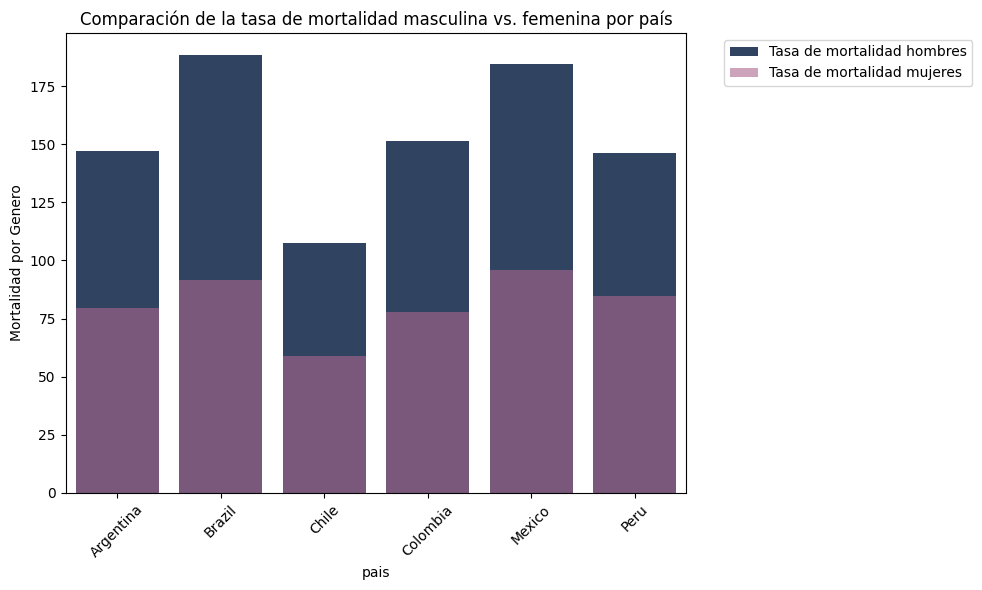

In [79]:
plt.figure(figsize=(10, 6))
sns.barplot(data=data_latinoamerica_2, x='country_name', y='adult_male_mortality_rate', color='#284269', label='Tasa de mortalidad hombres')
sns.barplot(data=data_latinoamerica_2, x='country_name', y='adult_female_mortality_rate', alpha=0.6, color='#b85a90', label='Tasa de mortalidad mujeres')
plt.xticks(rotation=45)
plt.ylabel('Mortalidad por Genero')
plt.xlabel('pais')
plt.title('Comparación de la tasa de mortalidad masculina vs. femenina por país')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

La gráfica de mortalidad nos muestra que en todos los paises la cantidad de muertes es mayor en los hombres que en las mujeres, lo cual nos da una ventana de analisis para evaluar que factores provocan estos reultados

#### Correlacion entre posibles variables que pueden afectar a la población
Se pretende establecer si existe una correlación entre las variables.

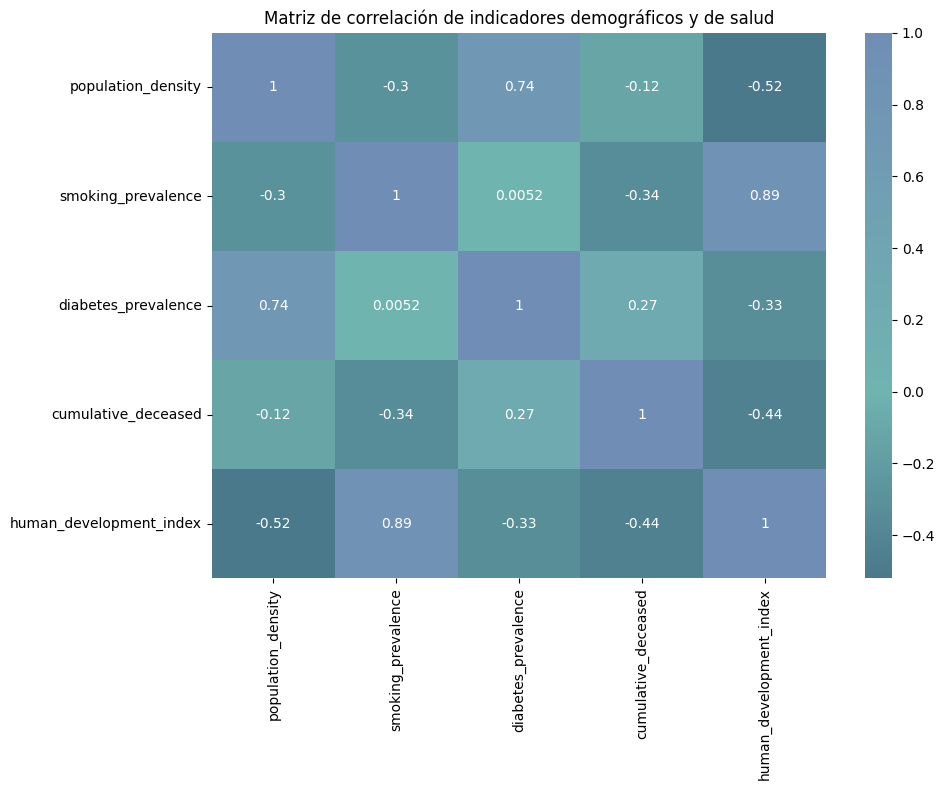

In [80]:
from matplotlib.colors import LinearSegmentedColormap
colors = ['#284269', '#70b4b0', '#708eb5']  
custom_cmap = LinearSegmentedColormap.from_list('custom_cmap', colors)
# Selección de columnas para el análisis de correlación
columns = ['population_density', 'smoking_prevalence', 'diabetes_prevalence', 'cumulative_deceased', 'human_development_index']
correlation_matrix = data_latinoamerica_2[columns].corr()

# Creación del heatmap con el colormap personalizado
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap=custom_cmap, center=0)
plt.title('Matriz de correlación de indicadores demográficos y de salud')
plt.tight_layout()

De esta matriz podemos observar que el fumar y tener diabetes son las enfermedades preexistentes que más afectan a la población en los paises seleccionados, por lo que se podría decir que estas enfermedades son las que más han causado muertes en los paises seleccionados, sin embargo esto no quiere decir que sean las únicas enfermedades que han causado muertes sino que son las más comúnes.
### Mortalidad por paises.
Analizaremos el comportamiento de la mortalidad en los paises seleccionados por enfermedades preexistentes o comorbilidades.

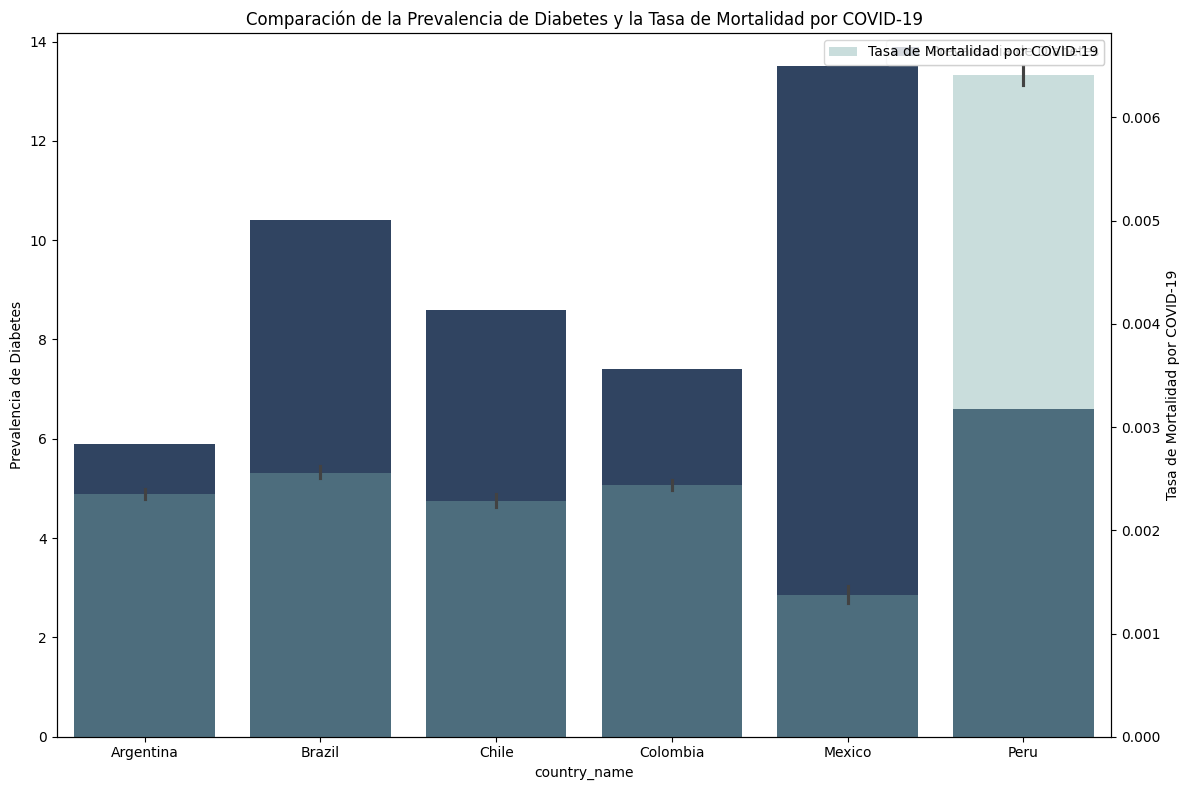

In [81]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
sns.barplot(data=data_latinoamerica_2, x= data_latinoamerica_2['country_name'], y= data_latinoamerica_2['diabetes_prevalence'], color='#284269', label='Prevalencia de Diabetes')
ax2 = ax.twinx()
sns.barplot(data=data_latinoamerica_2, x= data_latinoamerica_2['country_name'], y= data_latinoamerica_2['cumulative_deceased'] / data_latinoamerica_2['population'], color='#70b4b0', label='Tasa de Mortalidad por COVID-19', ax=ax2,
            alpha=0.4)
ax.set_ylabel('Prevalencia de Diabetes')
ax2.set_ylabel('Tasa de Mortalidad por COVID-19')
plt.title('Comparación de la Prevalencia de Diabetes y la Tasa de Mortalidad por COVID-19')
plt.tight_layout()
plt.show()

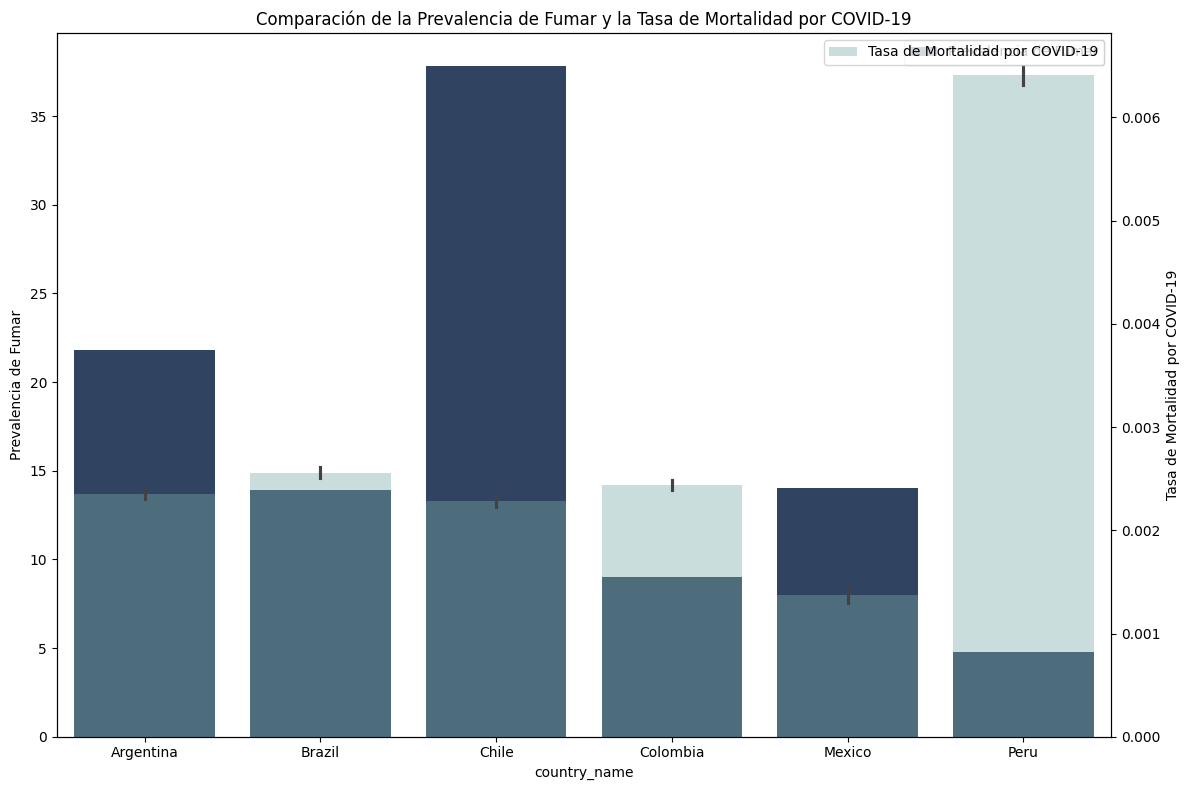

In [84]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
sns.barplot(data=data_latinoamerica_2, x= data_latinoamerica_2['country_name'], y= data_latinoamerica_2['smoking_prevalence'], color='#284269', label='Prevalencia de Fumar')
ax2 = ax.twinx()
sns.barplot(data=data_latinoamerica_2, x= data_latinoamerica_2['country_name'], y= data_latinoamerica_2['cumulative_deceased'] / data_latinoamerica_2['population'], color='#70b4b0', label='Tasa de Mortalidad por COVID-19', ax=ax2,
            alpha=0.4)
plt.xticks(rotation=90)
ax.set_ylabel('Prevalencia de Fumar')
ax2.set_ylabel('Tasa de Mortalidad por COVID-19')
plt.title('Comparación de la Prevalencia de Fumar y la Tasa de Mortalidad por COVID-19')
plt.tight_layout()
plt.show()

Las dos enfermedades muestran un comportamiento similar en los paises seleccionados, sin embargo se puede observar que la diabetes es la enfermedad que más ha causado muertes en los paises seleccionados, seguido del fumar.

Como conclusión de este avance podemos decir que los paises que más necesitan ayuda son Brasil, México y Colombia, ya que son los paises que más casos confirmados y muertes han tenido, además de ser los paises que menos vacunas han administrado.

Las enfermedades preexistentes que más han afectado a la población en los paises seleccionados son el fumar y la diabetes, por lo que se podría decir que estas enfermedades son las que más han causado muertes en los paises seleccionados (Al ser enfermedad de base la probabilidad que una persona que ya tiene al menos una de las dos enfermedades muera es mayor).

-----------------------------------------------
## **Avance 3**
En primera instancia se realizara un análisis del comportamiento los casos nuevos a lo largo del tiempo de manera semanal, mensual y anual.
### Comportamiento Semanal

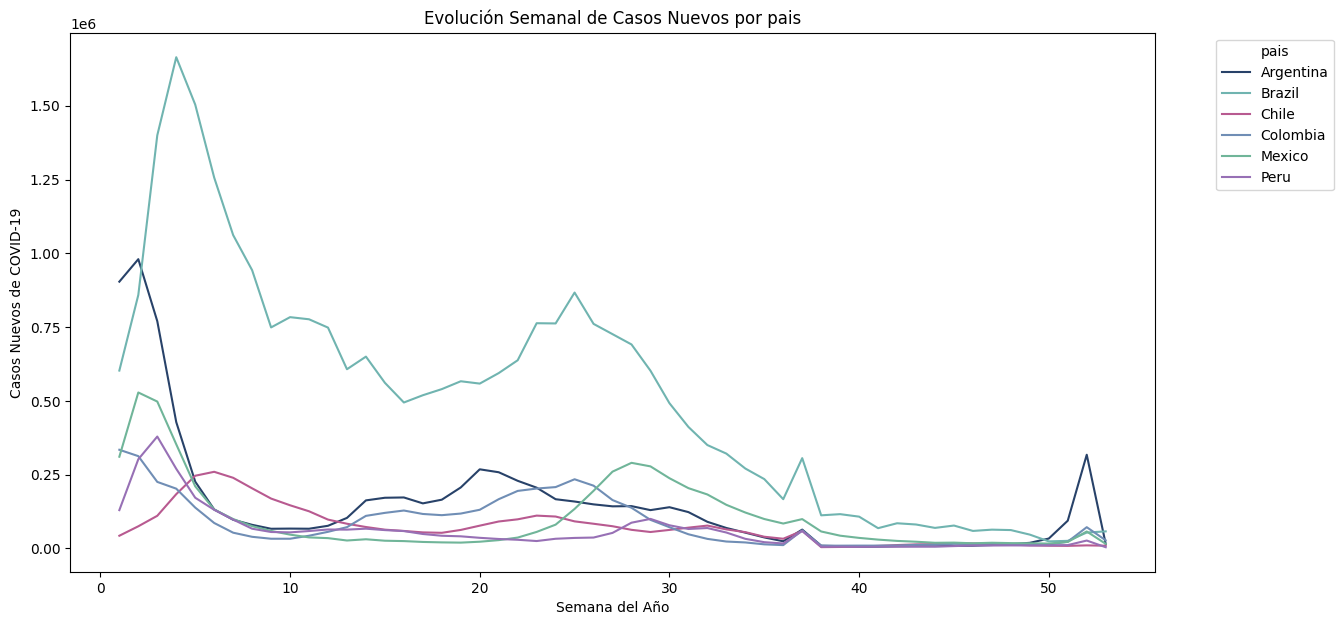

In [85]:
data_latinoamerica_fecha2['week'] = data_latinoamerica_fecha2.index.isocalendar().week
weekly_cases = data_latinoamerica_fecha2.groupby(['country_name', 'week'])['new_confirmed'].sum().reset_index()
plt.figure(figsize=(14, 7))
for country in weekly_cases['country_name'].unique():
    country_weekly_cases = weekly_cases[weekly_cases['country_name'] == country]
    plt.plot(country_weekly_cases['week'], country_weekly_cases['new_confirmed'], label=country)

plt.xlabel('Semana del Año')
plt.ylabel('Casos Nuevos de COVID-19')
plt.title('Evolución Semanal de Casos Nuevos por pais')
plt.legend(title= 'pais', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Comportamiento Mensual

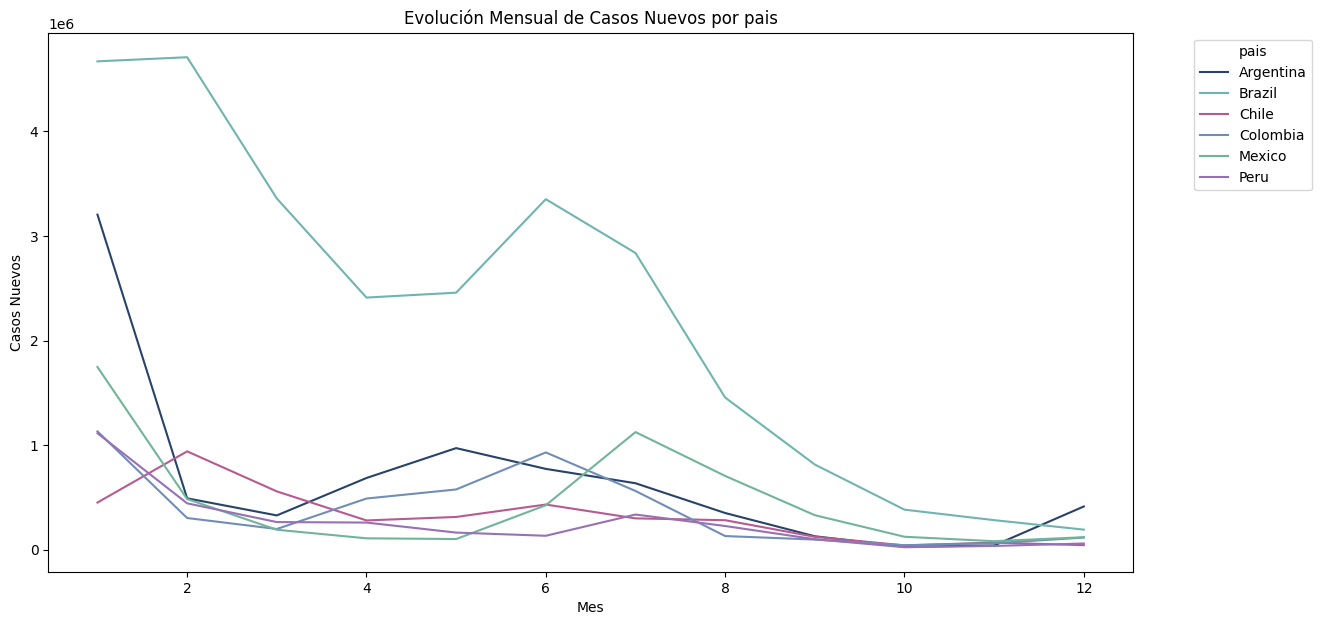

In [86]:
data_latinoamerica_fecha2['month'] = data_latinoamerica_fecha2.index.month
yearly_cases = data_latinoamerica_fecha2.groupby(['country_name', 'month'])['new_confirmed'].sum().reset_index()
plt.figure(figsize=(14, 7))
for country in yearly_cases['country_name'].unique():
    country_yearly_cases = yearly_cases[yearly_cases['country_name'] == country]
    plt.plot(country_yearly_cases['month'], country_yearly_cases['new_confirmed'], label=country)
plt.xlabel('Mes')
plt.ylabel('Casos Nuevos')
plt.title('Evolución Mensual de Casos Nuevos por pais')
plt.legend(title= 'pais', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Comportamiento Anual

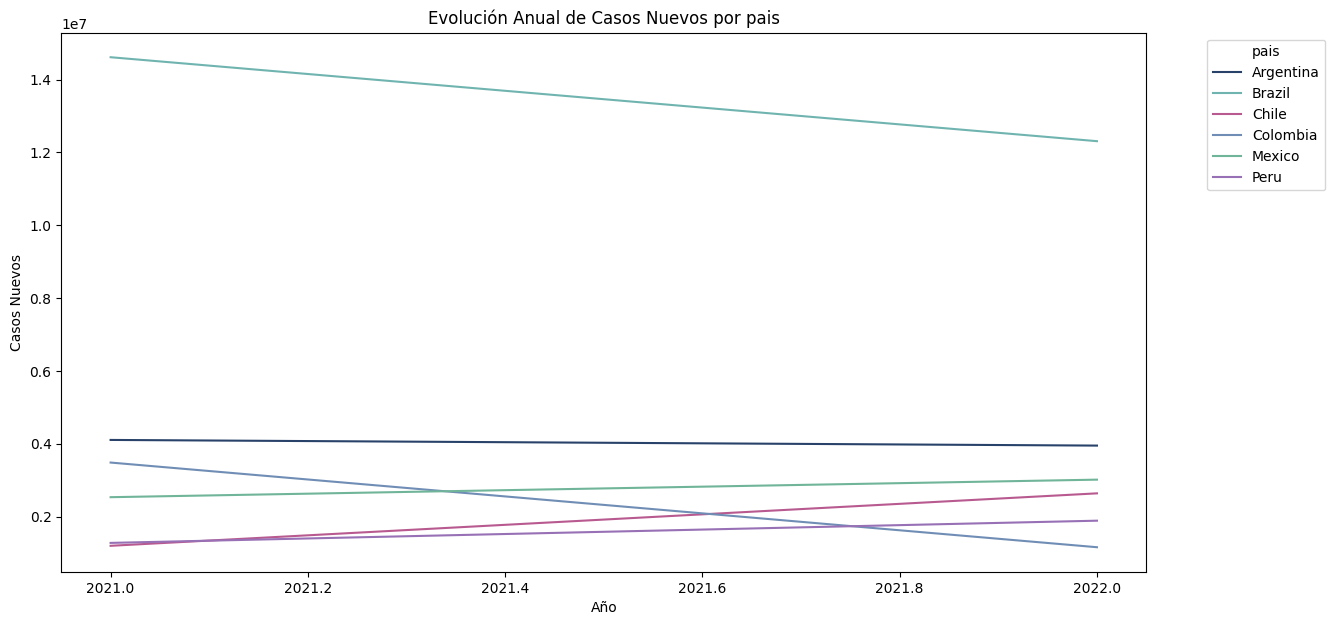

In [87]:
data_latinoamerica_fecha2['year'] = data_latinoamerica_fecha2.index.year
yearly_cases = data_latinoamerica_fecha2.groupby(['country_name', 'year'])['new_confirmed'].sum().reset_index()
plt.figure(figsize=(14, 7))
for country in yearly_cases['country_name'].unique():
    country_yearly_cases = yearly_cases[yearly_cases['country_name'] == country]
    plt.plot(country_yearly_cases['year'], country_yearly_cases['new_confirmed'], label=country)
plt.xlabel('Año')
plt.ylabel('Casos Nuevos')
plt.title('Evolución Anual de Casos Nuevos por pais')
plt.legend(title= 'pais', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Se evidencia que a lo largo del tiempo han ido disminuyendo los nuevos casos, es pertinente hacer un analisis mas detallados para determinar que causas han propicioso dicha disminución y no llegar a conclusiones presipo¿itadas como por ejemplo que la pandemia se este acabando.

Es por ello que queremos ver si la vacunación se asocia con la dismunucion de casos nuevos

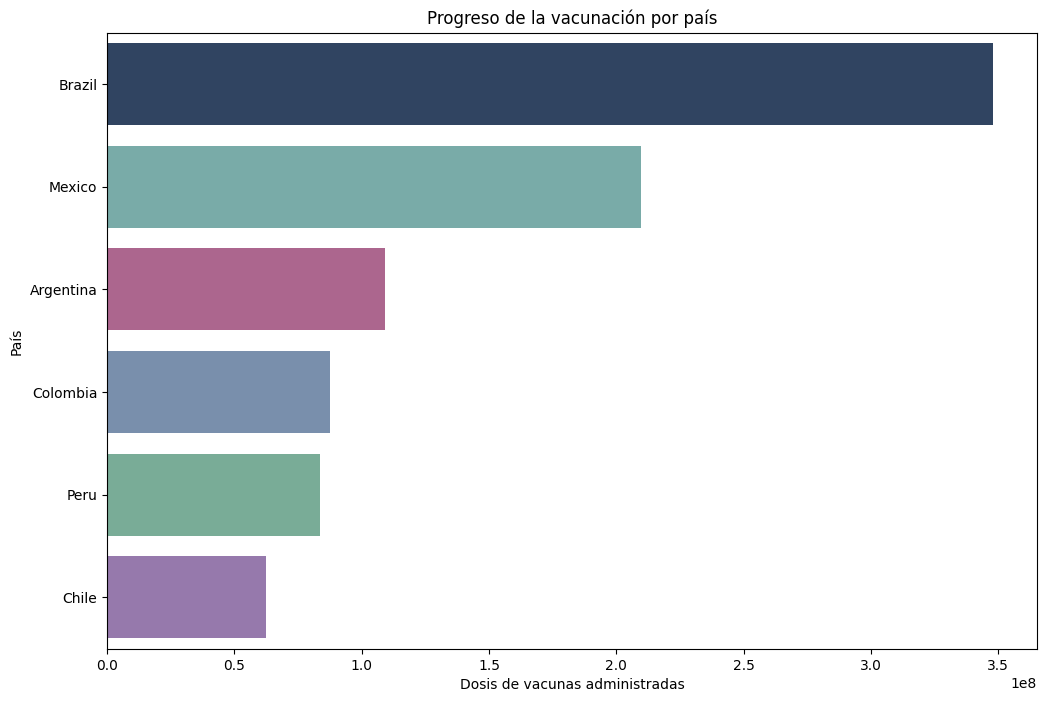

In [88]:
from matplotlib.colors import LinearSegmentedColormap
custom_palette=['#284269', '#70b4b0', '#b85a90', '#708eb5', '#70b599', '#9770b5']
sns.set_palette(custom_palette)

vaccination_data = data_latinoamerica_2.groupby('country_name')['cumulative_vaccine_doses_administered'].max().sort_values(ascending=False).reset_index()

# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(x='cumulative_vaccine_doses_administered', y='country_name', data=vaccination_data, hue='country_name', palette=custom_palette, dodge=False)
plt.xlabel('Dosis de vacunas administradas')
plt.ylabel('País')
plt.title('Progreso de la vacunación por país')
plt.show()

El país con mayor dosis administradas es Brasil, seguido de México, Argentina, Colombia, Perú y Chile. Se contradice con los hallazgos anteriores sin embargo recordemos que se debe tener en cuenta la población de cada país y la cantidad de vacunas disponibles.
### Comportamiento de la temperatura respecto a los nuevos casos por pais 


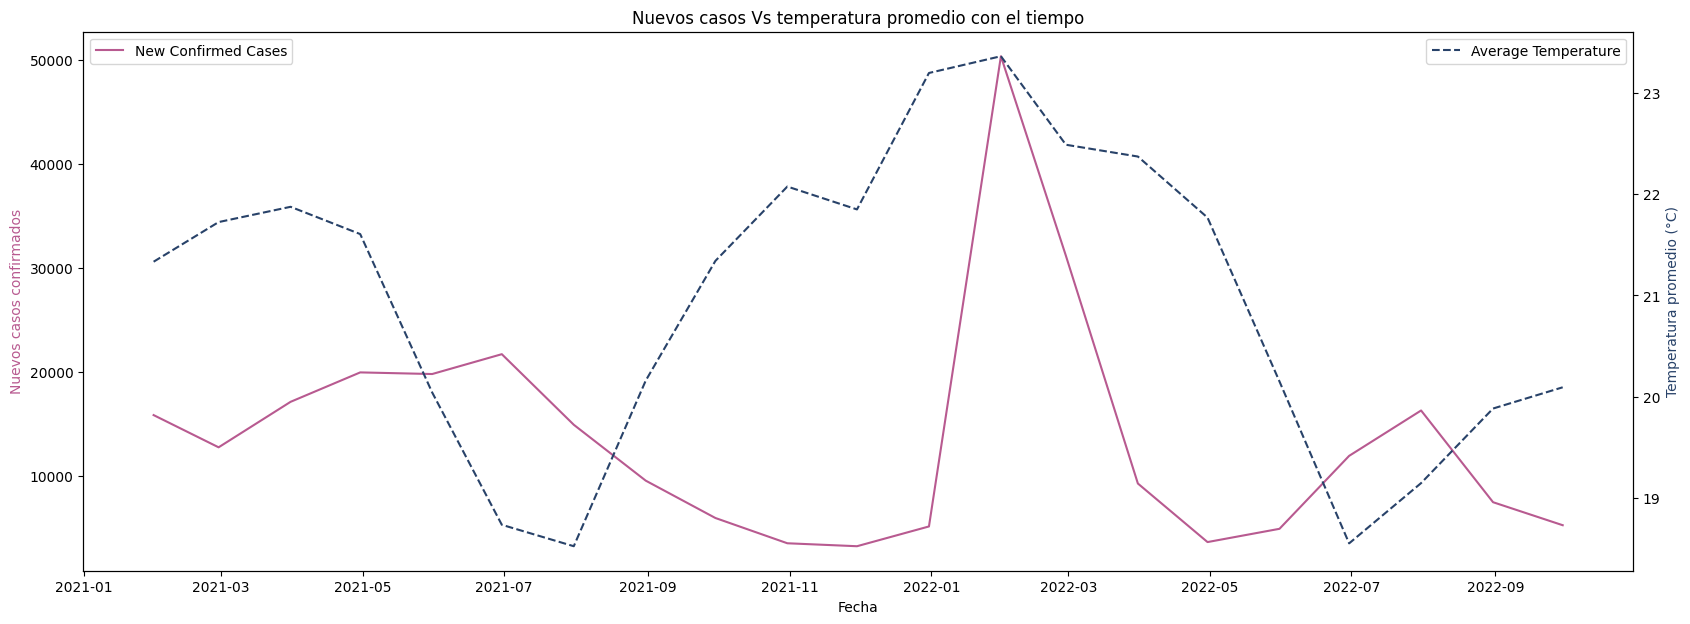

In [89]:
plt.figure(figsize=(20, 7))
ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.plot(data_latinoamerica_fecha2.resample('ME').mean(numeric_only=True).index, data_latinoamerica_fecha2.resample('ME').mean(numeric_only=True)['new_confirmed'], color='#B85A90', label='New Confirmed Cases')
ax2.plot(data_latinoamerica_fecha2.resample('ME').mean(numeric_only=True).index, data_latinoamerica_fecha2.resample('ME').mean(numeric_only=True)['average_temperature_celsius'], color='#284269', label='Average Temperature', linestyle='--')

ax1.set_xlabel('Fecha')
ax1.set_ylabel('Nuevos casos confirmados', c='#B85A90')
ax2.set_ylabel('Temperatura promedio (°C)', c='#284269')
plt.title('Nuevos casos Vs temperatura promedio con el tiempo')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

Podemos observar que la temperatura promedio ha ido aumentando y los casos confirmados han ido disminuyendo sin embargo hubo un pico antes del mes de marzo pero disminuyó rápidamente, esto puede ser por la cantidad de vacunas administradas o por la cantidad de personas que se han vacunado.
### Densidad poblacional
Cada país tiene un impacto debido a la urbanización y la densidad de población, por lo que vamos a analizar la densidad de población en cada país.

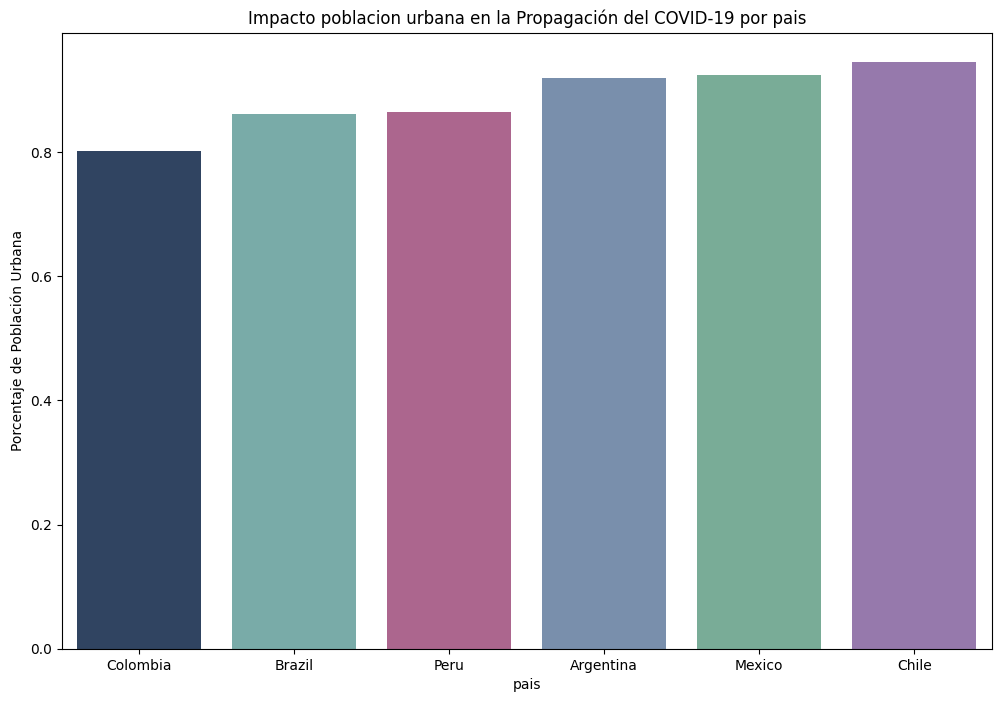

In [90]:
from matplotlib.colors import LinearSegmentedColormap
custom_palette=['#284269', '#70b4b0', '#b85a90', '#708eb5', '#70b599', '#9770b5']
sns.set_palette(custom_palette)

data_latinoamerica_2['urban_population_percentage'] = data_latinoamerica_2['population_urban'] / data_latinoamerica_2['population']
urban_cases = data_latinoamerica_2.groupby('country_name').last().sort_values(by='urban_population_percentage')

plt.figure(figsize=(12, 8))

sns.barplot(y=urban_cases['urban_population_percentage'], x='country_name', data=urban_cases, hue='country_name', palette=custom_palette, dodge=False)
plt.xlabel('pais')
plt.ylabel('Porcentaje de Población Urbana')
plt.title('Impacto poblacion urbana en la Propagación del COVID-19 por pais')
plt.show()

El pais con mayor impacto en la propagación fue chile, sin embargo esto puede ser debido a la densidad de población en chile.

### Densidad de población por grupos de edad

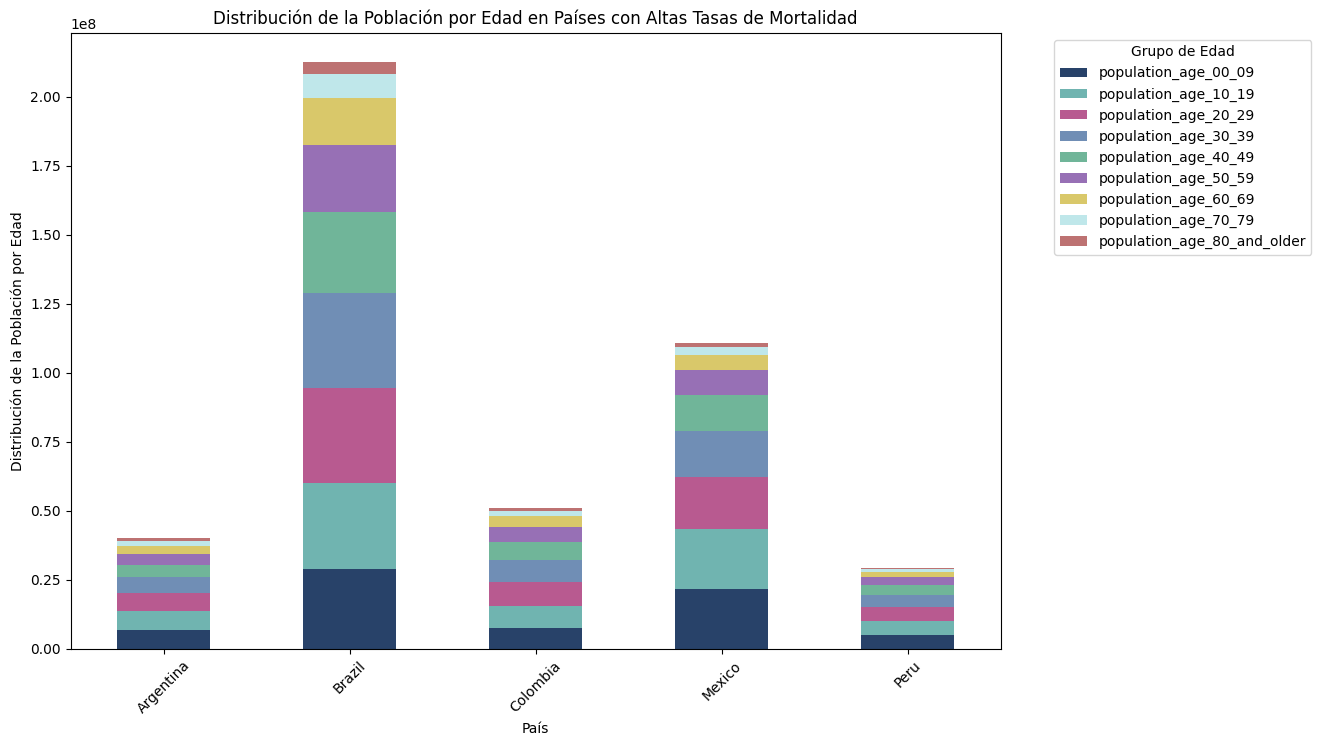

In [91]:
custom_palette=['#284269', '#70b4b0', '#b85a90', '#708eb5', '#70b599', '#9770b5', '#d9c86a', '#bfe7ea', '#bd7272']
sns.set_palette(custom_palette)

high_mortality_countries = data_latinoamerica_2.groupby('country_name')['cumulative_deceased'].max().sort_values(ascending=False).head(5).index
age_groups = ['population_age_00_09', 'population_age_10_19', 'population_age_20_29', 'population_age_30_39', 'population_age_40_49', 'population_age_50_59', 'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older']
age_distribution = data_latinoamerica_2[data_latinoamerica_2['country_name'].isin(high_mortality_countries)].groupby('country_name')[age_groups].mean()

age_distribution.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.xlabel('País')
plt.ylabel('Distribución de la Población por Edad')
plt.title('Distribución de la Población por Edad en Países con Altas Tasas de Mortalidad')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',title='Grupo de Edad')
plt.xticks(rotation=45)
plt.show()

El gráfico muestra claramente la desigualdad en cantidades de población por grupos de edad en los paises seleccionados.
### Vacunacion
Analisis de las estrategias de vacunación empleadas para mitigar la mortalidad y los casos confirmados.

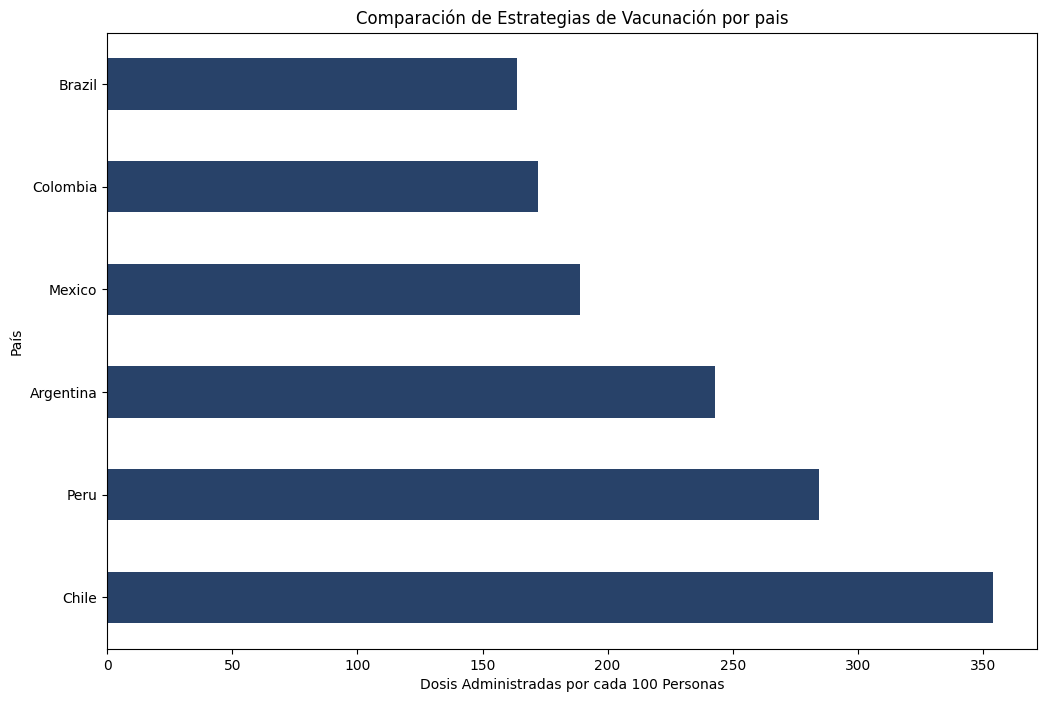

In [92]:
vaccination_strategy = data_latinoamerica_2.groupby('country_name')['cumulative_vaccine_doses_administered'].max() / data_latinoamerica_2.groupby('country_name')['population'].mean() * 100
vaccination_strategy.sort_values(ascending=False).plot(kind='barh', figsize=(12, 8), color='#284269')
plt.ylabel('País')
plt.xlabel('Dosis Administradas por cada 100 Personas')
plt.title('Comparación de Estrategias de Vacunación por pais')
plt.show()

Chile es el pais que mejor emplea estrategias para el cumplimiento de metas para la administracion de vacunas, Brazil, Colombia y Mexico deben evaluar la baja dosificación, ya sea si es por negacion a la aplicacion de vacunas o por la falta de laboratorios y centros de vacunación para mejorar el acceso a las vacunas. 
### Condiciones Preexistentes
Prevalencia de Condiciones Preexistentes en Países con Altas y Bajas Tasas de Mortalidad por COVID-19

#### Prevalencia de diabetes y Fumar por pais

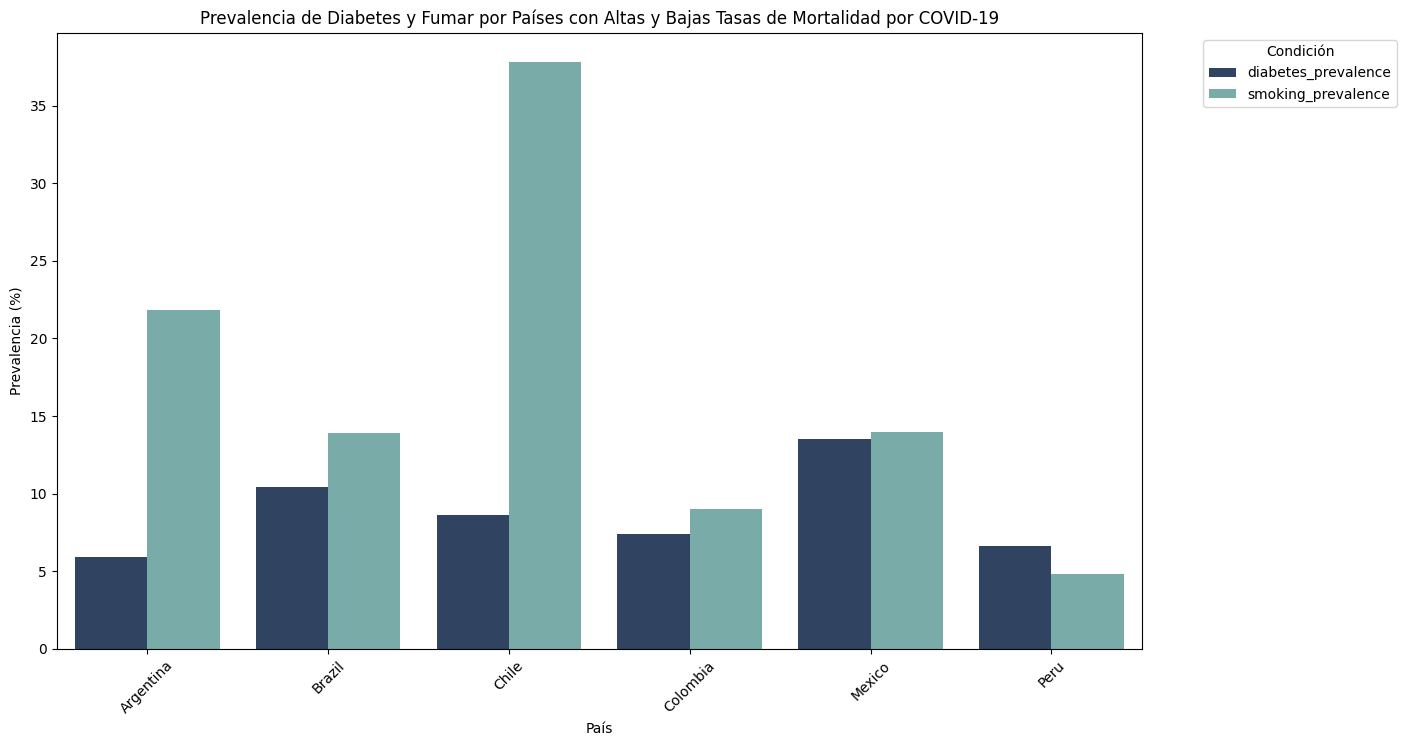

In [93]:
top_countries = data_latinoamerica_2.groupby('country_name')['cumulative_deceased'].max().nlargest(5).index
bottom_countries = data_latinoamerica_2.groupby('country_name')['cumulative_deceased'].max().nsmallest(5).index
conditions_data = data_latinoamerica_2[data_latinoamerica_2['country_name'].isin(top_countries.union(bottom_countries))]

# Transformar los datos para gráficos agrupados
melted_data = conditions_data.melt(id_vars=['country_name'], value_vars=['diabetes_prevalence', 'smoking_prevalence'], 
                                   var_name='Condition', value_name='Prevalence')

# Crear el gráfico de barras agrupadas
plt.figure(figsize=(14, 8))
sns.barplot(data=melted_data, x='country_name', y='Prevalence', hue='Condition')
plt.xlabel('País')
plt.ylabel('Prevalencia (%)')
plt.title('Prevalencia de Diabetes y Fumar por Países con Altas y Bajas Tasas de Mortalidad por COVID-19')
plt.legend(title='Condición', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

en casi todos los paises exceptuando Peri la prevalencia de fumar es mas alta por ende tiene uan mayor tasa de mortalidad Ahora identificamos que la diabetes afecta mucho mas a México y Brasil, por lo que se podría decir que estos paises son los que más han sufrido decesos por la diabetes. Respecto a fumar se puede observar que afecta más a Chile y Argentina, por lo que se podría decir que estos paises an tenido mayores decesos asociados a fumar.

### Fatalidad por país

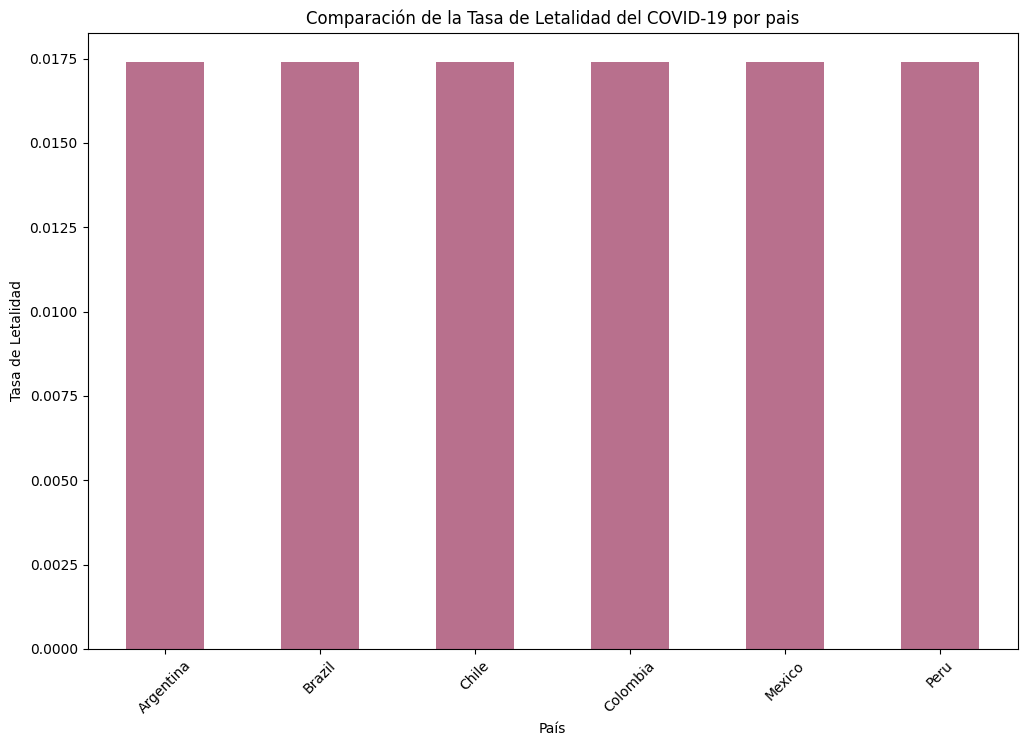

In [94]:
data_latinoamerica_2['case_fatality_rate'] = data_latinoamerica_2['cumulative_deceased'] / data_latinoamerica_2['cumulative_confirmed']
fatality_rates = data_latinoamerica_2.groupby('country_name')['case_fatality_rate'].last().sort_values()

plt.figure(figsize=(12, 8))
fatality_rates.plot(kind='bar', color='#b8708d')
plt.xlabel('País')
plt.ylabel('Tasa de Letalidad')
plt.title('Comparación de la Tasa de Letalidad del COVID-19 por pais')
plt.xticks(rotation=45)
plt.show()

Todos los países han tenido un comportamiento similar en cuanto a la fatalidad, sin embargo apoyandose con las otras gráficas se puede observar que ha disminuido.
### Relación entre la Cobertura de Vacunación y la Reducción de Casos por pais
 Como evoluciona la vacunación por pais vs la reducción de casos de COVID-19

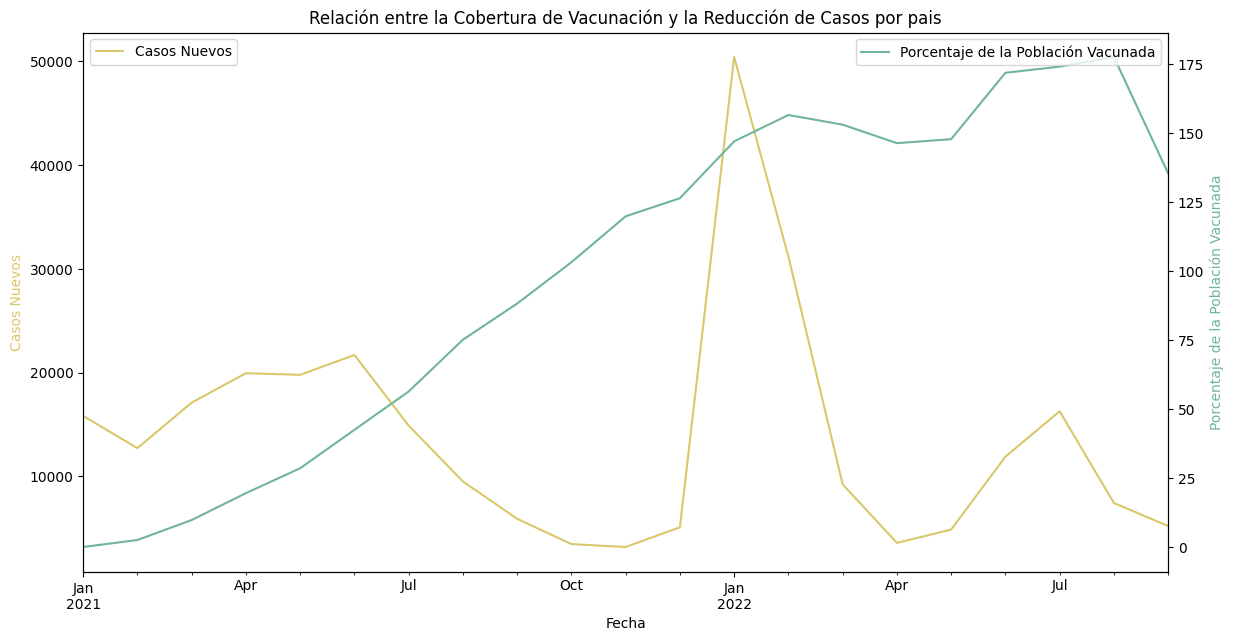

In [95]:
plt.figure(figsize=(14, 7))
ax1 = plt.gca()
ax2 = ax1.twinx()

#crea percentajes de vacunacion
data_latinoamerica_fecha2['percentage_vaccinated'] = data_latinoamerica_fecha2['cumulative_vaccine_doses_administered'] / data_latinoamerica_fecha2['population'] * 100
data_latinoamerica_fecha2.resample('ME').mean(numeric_only=True)['new_confirmed'].plot(ax=ax1, color='#d9c86a', label='Casos Nuevos')
data_latinoamerica_fecha2.resample('ME').mean(numeric_only=True)['percentage_vaccinated'].plot(ax=ax2, color='#70b599', label='Porcentaje de la Población Vacunada')


ax1.set_xlabel('Fecha')
ax1.set_ylabel('Casos Nuevos', color='#d9c86a')
ax2.set_ylabel('Porcentaje de la Población Vacunada', color='#70b599')
ax1.set_title('Relación entre la Cobertura de Vacunación y la Reducción de Casos por pais')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

Los casos nuevos y las muestes nuevas ha variado debido a la vacucación y a las medidas tomadas por los paises, ademas de que se ha disminuido la cantidad de personas que se han contagiado y fallecido.
### Análisis Temporal de la Mortalidad por COVID-19 por pais

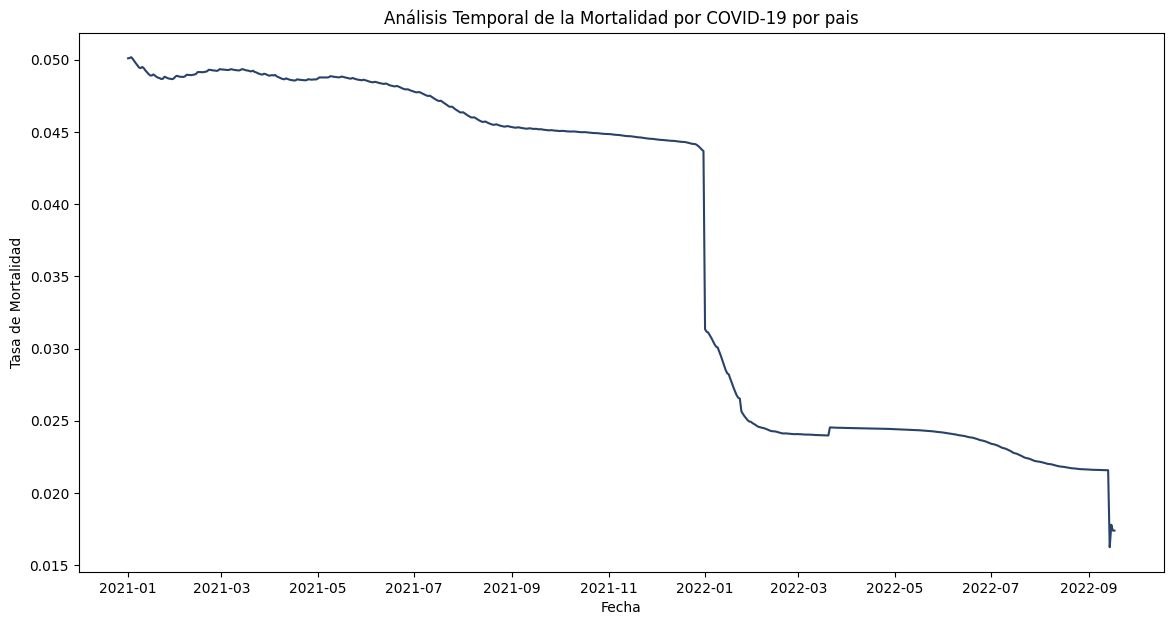

In [96]:
data_latinoamerica_2['mortality_rate'] = data_latinoamerica_2['cumulative_deceased'] / data_latinoamerica_2['cumulative_confirmed']

plt.figure(figsize=(14, 7))
sns.lineplot(data=data_latinoamerica_2, x='date', y='mortality_rate', estimator='mean', errorbar=None)
plt.title('Análisis Temporal de la Mortalidad por COVID-19 por pais')
plt.xlabel('Fecha')
plt.ylabel('Tasa de Mortalidad')
plt.show()

### Evolucion de los casos activos y recuperados por pais

C:\Users\ASUS\AppData\Local\Temp\ipykernel_9888\2225480833.py:16: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sns.lineplot(data=data_latinoamerica_2.resample('M').mean(numeric_only=True), x='date', y='active_cases', color='#b85a90', label='Casos Activos')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_9888\2225480833.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sns.lineplot(data=data_latinoamerica_2.resample('M').mean(numeric_only=True), x='date', y='cumulative_recovered', color='#284269', label='Casos Recuperados')


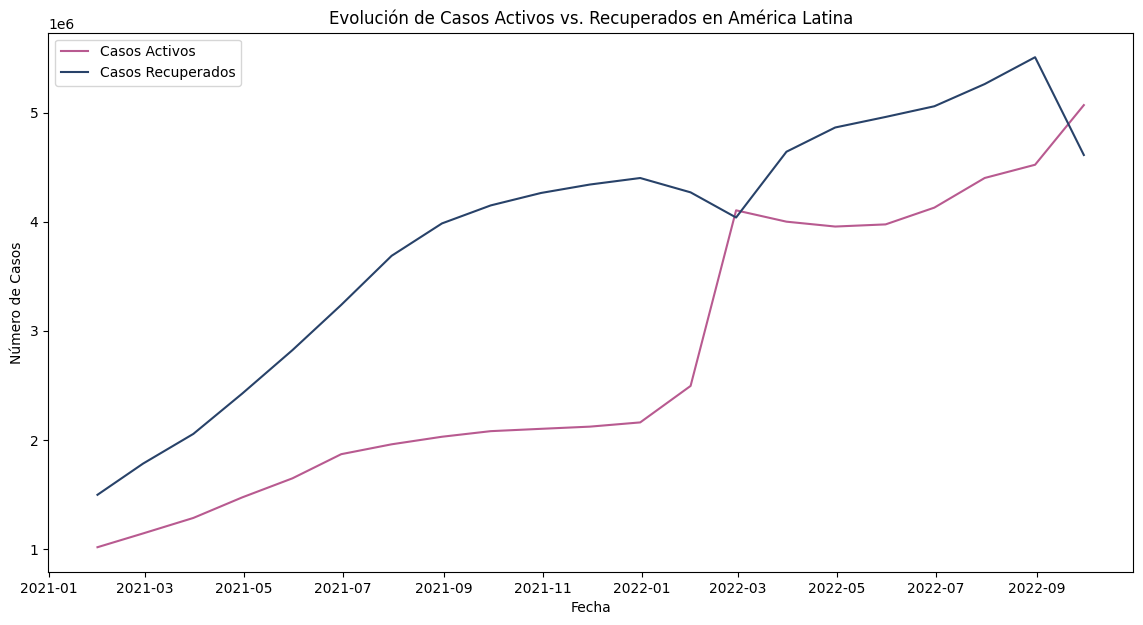

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Asegúrate de que la columna 'date' esté en el formato correcto
data_latinoamerica_2['date'] = pd.to_datetime(data_latinoamerica_2['date'])

# Establece 'date' como el índice
data_latinoamerica_2.set_index('date', inplace=True)

# Calcula 'active_cases'
data_latinoamerica_2['active_cases'] = data_latinoamerica_2['cumulative_confirmed'] - data_latinoamerica_2['cumulative_deceased'] - data_latinoamerica_2['cumulative_recovered']

# Genera el gráfico
plt.figure(figsize=(14, 7))
sns.lineplot(data=data_latinoamerica_2.resample('M').mean(numeric_only=True), x='date', y='active_cases', color='#b85a90', label='Casos Activos')
sns.lineplot(data=data_latinoamerica_2.resample('M').mean(numeric_only=True), x='date', y='cumulative_recovered', color='#284269', label='Casos Recuperados')
plt.xlabel('Fecha')
plt.ylabel('Número de Casos')
plt.title('Evolución de Casos Activos vs. Recuperados en América Latina')
plt.legend()
plt.show()

### Comparación de la Situación Actual de COVID-19 entre Países
- Casos Activos
- Recuperados
- Muertes

<Figure size 1400x800 with 0 Axes>

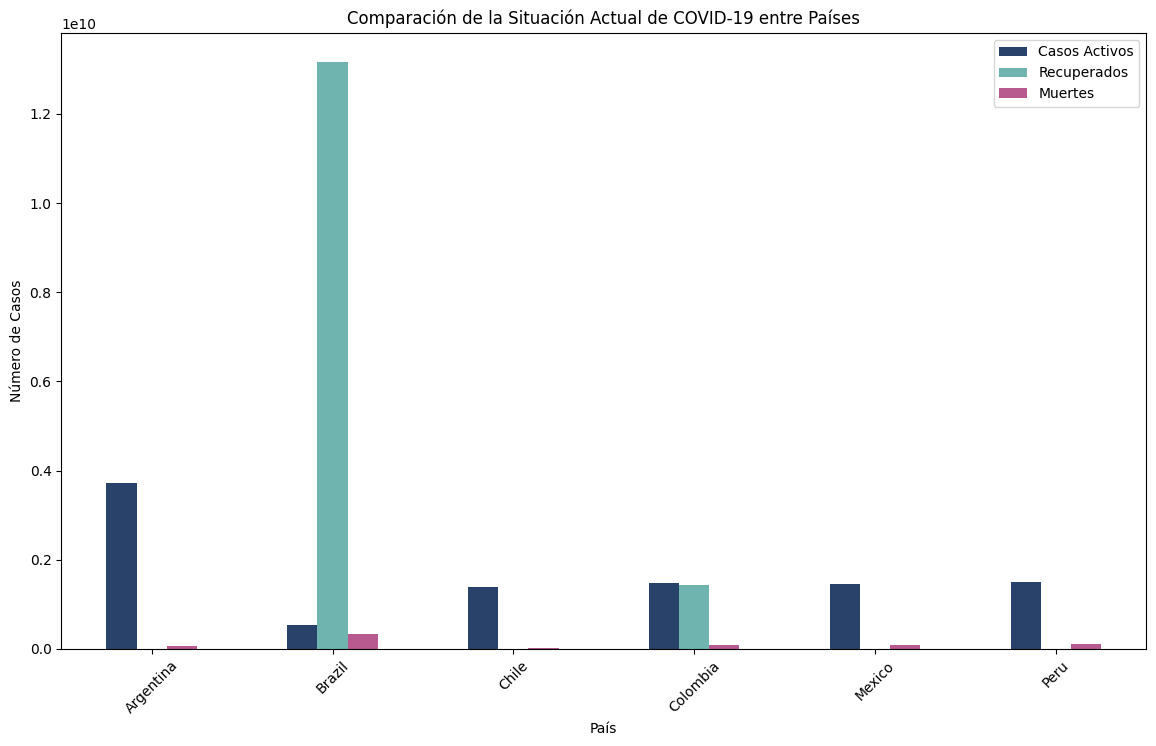

In [99]:
#Seleccionar solo las columnas relevantes
selected_columns = ['country_name', 'active_cases', 'cumulative_recovered', 'cumulative_deceased']
data_subset = data_latinoamerica_2[selected_columns]

# Calcular la situación actual por país
current_situation = data_subset.groupby('country_name').sum()[['active_cases', 'cumulative_recovered', 'cumulative_deceased']]

plt.figure(figsize=(14, 8))
current_situation.plot(kind='bar', stacked=False, figsize=(14, 8))
plt.title('Comparación de la Situación Actual de COVID-19 entre Países')
plt.xlabel('País')
plt.ylabel('Número de Casos')
plt.legend(['Casos Activos', 'Recuperados', 'Muertes'])
plt.xticks(rotation=45)
plt.show()

#### Expancion de la empresa farmacéutica BIOGENESYS 
Los  paises a expandirse son:
*Brasil
*México
*Colombia
ya que son los paises que más casos confirmados y muertes han tenido, además de ser los paises que menos vacunas han administrado, tal vez las politicas de vacunación no han sido las mejores o no han tenido la cantidad de vacunas necesarias, esto sin tener en cuenta la densidad de población, el pib percapita, la cantidad de habitantes de cada país y problemas socieconómicos que puedan afectar la cantidad de casos confirmados y muertes.
### EXTRA CREDIT
Para un analisis mas detallado graficaremos (mapas): 
+ Casos confirmados 
+ Cantidad de vacunas administradas
+ Muertes 
+ Recuperados

In [102]:
# mapa para ver la distribución de casos confirmado, muertes, vacuna y recuperados
!pip install folium
import folium
from folium.plugins import HeatMap

# Seleccionamos las columnas que vamos a utilizar
columns = ['latitude', 'longitude', 'cumulative_confirmed', 'cumulative_deceased', 'cumulative_vaccine_doses_administered', 'cumulative_recovered']
data_map = data_latinoamerica_2[columns].dropna()

# Creamos un mapa centrado en América Latina
map = folium.Map(location=[-14.235004, -51.92528], zoom_start=3)

# Creamos un mapa de calor para los casos confirmados
heat_map_confirmed = HeatMap(data=data_map[['latitude', 'longitude', 'cumulative_confirmed']], radius=15)
map.add_child(heat_map_confirmed)

# Creamos un mapa de calor para las muertes
heat_map_deceased = HeatMap(data=data_map[['latitude', 'longitude', 'cumulative_deceased']], radius=15)
map.add_child(heat_map_deceased)

# Creamos un mapa de calor para las vacunas administradas
heat_map_vaccine = HeatMap(data=data_map[['latitude', 'longitude', 'cumulative_vaccine_doses_administered']], radius=15)
map.add_child(heat_map_vaccine)

# Creamos un mapa de calor para los recuperados
heat_map_recovered = HeatMap(data=data_map[['latitude', 'longitude', 'cumulative_recovered']], radius=15)
map.add_child(heat_map_recovered)

map.save('mapa.html')

map

 ### Distribución de casos confirmados por país

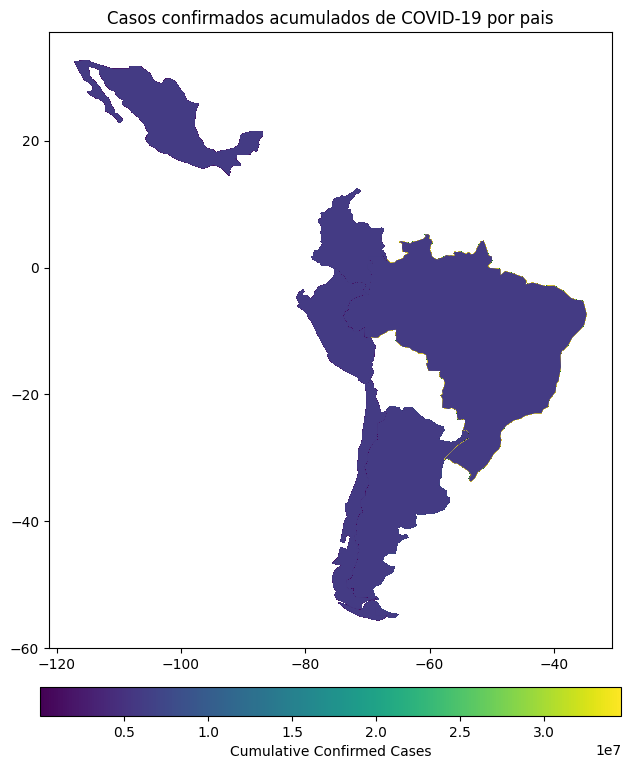

In [103]:
import geopandas as gpd
world = gpd.read_file(r"C:\Users\ASUS\Downloads\ne_110m_admin_0_countries.zip")
marged = world.merge(data_latinoamerica_2, left_on='SOVEREIGNT', right_on= "country_name")

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
marged.plot(column='cumulative_confirmed', ax=ax, legend=True, legend_kwds={'label': "Cumulative Confirmed Cases", 'orientation': "horizontal", 'shrink': 0.5, 'pad': 0.05, 'aspect': 20})
plt.title('Casos confirmados acumulados de COVID-19 por pais')
plt.show()

 ### Distribución de Dosis de vacunas administradas por país

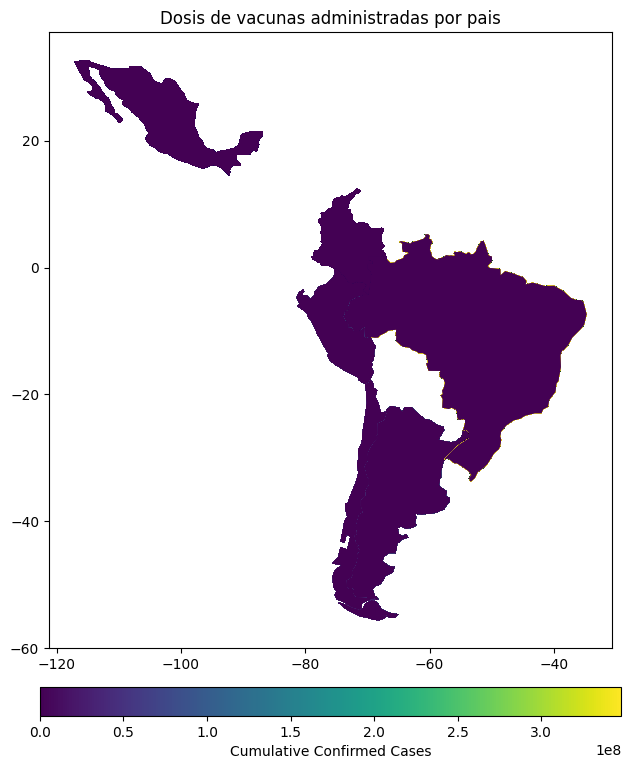

In [104]:
world = gpd.read_file(r"C:\Users\ASUS\Downloads\ne_110m_admin_0_countries.zip")
marged = world.merge(data_latinoamerica_2, left_on='SOVEREIGNT', right_on= "country_name")

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
marged.plot(column='cumulative_vaccine_doses_administered', ax=ax, legend=True, legend_kwds={'label': "Cumulative Confirmed Cases", 'orientation': "horizontal", 'shrink': 0.5, 'pad': 0.05, 'aspect': 20})
plt.title('Dosis de vacunas administradas por pais')
plt.show()

 ### Distribución de Decesos Acumulaods por país

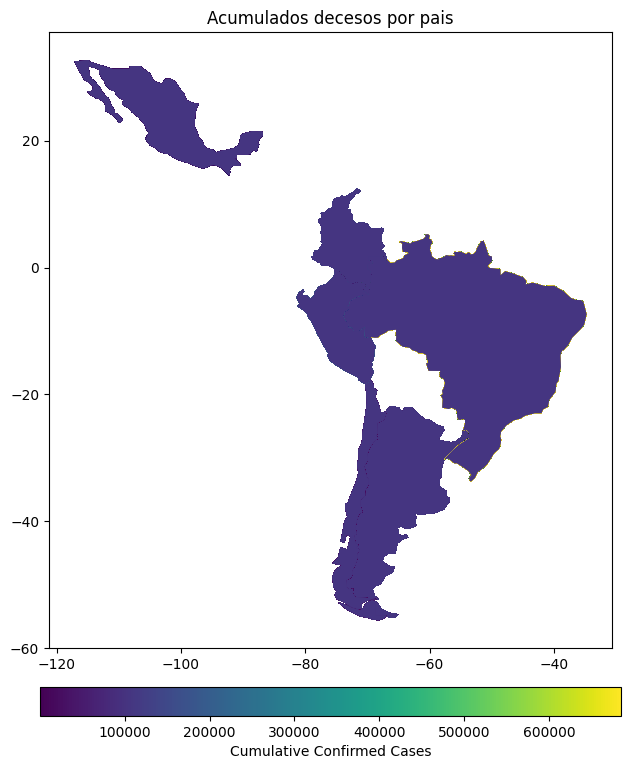

In [105]:
world = gpd.read_file(r"C:\Users\ASUS\Downloads\ne_110m_admin_0_countries.zip")
marged = world.merge(data_latinoamerica_2, left_on='SOVEREIGNT', right_on= "country_name")

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
marged.plot(column='cumulative_deceased', ax=ax, legend=True, legend_kwds={'label': "Cumulative Confirmed Cases", 'orientation': "horizontal", 'shrink': 0.5, 'pad': 0.05, 'aspect': 20})
plt.title('Acumulados decesos por pais')
plt.show()

 ### Distribución de Acumula de recuperados por país

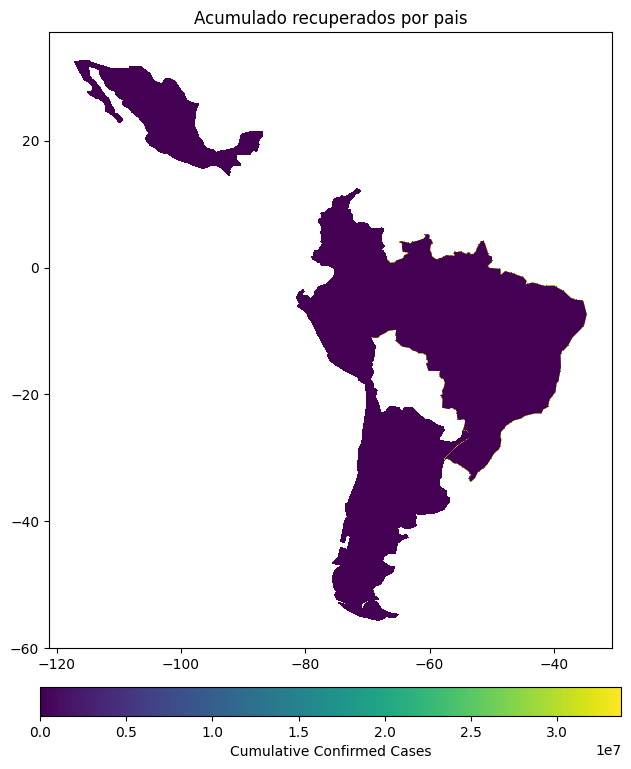

In [106]:
world = gpd.read_file(r"C:\Users\ASUS\Downloads\ne_110m_admin_0_countries.zip")
marged = world.merge(data_latinoamerica_2, left_on='SOVEREIGNT', right_on= "country_name")

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
marged.plot(column='cumulative_recovered', ax=ax, legend=True, legend_kwds={'label': "Cumulative Confirmed Cases", 'orientation': "horizontal", 'shrink': 0.5, 'pad': 0.05, 'aspect': 20})
plt.title('Acumulado recuperados por pais')
plt.show()